# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Google Play Store App EDA & Data Visualization</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

![](https://www.akademiportal.com/wp-content/uploads/2015/05/Google-Play-Logo-Before-and-After.png.webp)

<b> Bu not notebook ile google play store uygulama veri kümesi için EDA ve veri görselleştirmenin nasıl yapılacağı anlatılacaktır.

<b>İçindekiler:</b>
<ul>
<li><a href="#load">Loading the dataset (Veri setini yükleme)</a></li>
    
<li><a href="#understanding">Understanding the dataset(Veri setini anlama)</a></li>
    
<li><a href="#missing">Handling missing data (Kayıp verilerin ele alınması)</a></li>
    
<li><a href="#preprocessing">Data preprocessing (Veri ön işleme)</a></li>
    
<li><a href="#visualization">Data visualization (Veri görselleştirme)</a></li>
    
</ul>

**Faydalı olması temennisiyle**

<a id='load'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Loading The Dataset (Veri Setini Yükleme)</b></p>

**Apps dataset nedir?**

Bu data seti Google Play'deki uygulamaların ayrıntılarını içermektadir. Bu ayrıntılar 13 tane feature (column) tarafından açıklanmaktadır.
<ul>
    <li><b>App:</b> Uygulamanın adı</li>
    <li><b>Category:</b> Uygulamanın kategorisi. Örnek kategoriler: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY vb.</li>
    <li><b>Rating:</b> Kullanıcılar tarafından verilen ortalama puan (5 üzerinden)</li>
    <li><b>Reviews:</b> Kullanıcılar tarafından uygulamanın aldığı toplam yorum sayısı.</li>
    <li><b>Size:</b> Uygulamanın boyutu megabayt (MB) cinsinden</li>
    <li><b>Installs:</b> Uygulamanın Google Play'den kaç kez indirildiği bilgisi</li>
    <li><b>Type:</b> Uygulamanın ücretsiz mi yoksa ücretli mi olduğu bilgisi</li>
    <li><b>Price:</b> Uygulamanın fiyatı, Amerikan Doları (USD) cinsinden 0 ücretsiz demek</li>
    <li><b>Content Rating:</b> Uygulamanın içerik derecelendirmesi. Örneğin, "Everyone" herkes için uygun olduğunu gösterir.</li>
    <li><b>Genres:</b> Uygulamanın türü veya alt kategorileri. Örneğin, "Art-Design;Pretend Play" iki farklı türü gösterir.</li>
    <li><b>Last Updated:</b> Uygulamanın en son ne zaman güncellendiği. Örneğin, "January 7, 2018</li>
    <li><b>Current Ver:</b> Uygulamanın mevcut versiyonu. Örneğin, "1.0.0"</li>
    <li><b>Android Ver:</b> Uygulamanın çalıştırılabilmesi için gereken minimum Android versiyonu. Örneğin, "4.0.3 and up"</li>
</ul> 

<a id='understanding'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Import Library(Kütüphaneleri Yükleme)</b></p>

**Kodu İnceleme**

1. **from matplotlib.widgets import Slider**: Matplotlib kütüphanesinden `Slider` sınıfını içe aktarır. Bu, grafiklere etkileşimli kaydıraçlar eklemek için kullanılır.

2. **%matplotlib notebook**: Jupyter Notebook için etkileşimli grafikler oluşturmayı sağlar. `%matplotlib inline` kullanırsanız, grafikler statik olacaktır. Yani, grafikler üzerinde zoom yapma, kaydırma gibi etkileşimli işlemler yapılamayacaktır.

3. **plt.rcParams["figure.figsize"] = (8,5)**: Matplotlib'in varsayılan figür boyutunu 8x5 inç olarak ayarlar. Bu, oluşturulan grafiklerin boyutunu etkiler.

4. **import warnings**: Python'un `warnings` kütüphanesini içe aktarır. Bu kütüphane, uyarı mesajlarını kontrol etmek için kullanılır.

5. **warnings.filterwarnings("ignore")**: Uyarı mesajlarını görmezden gelmeyi sağlar. Yani, kod çalıştırılırken uyarı mesajları ekrana yazdırılmaz.

6. **warnings.warn("this will not show")**: Bu satır, normalde bir uyarı mesajı üretir ("this will not show"). Ancak, bir önceki satırda tüm uyarıların görmezden gelinmesi ayarlandığı için, bu uyarı mesajı ekrana yazdırılmaz.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import folium
from folium import plugins
# from matplotlib.widgets import Slider

# %matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (6,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

<a id='understanding'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Understanding the dataset(Veri setini anlama)</b></p>

**df.columns**, sütun adlarını döndüren bir özelliktir. Bu özellik kullanıldığında, veri çerçevesindeki sütunların isimlerini içeren bir liste elde edilir.

Column isimlerinde boşluk istenmez bu kapsamda bu boşlukları hep kullandığımız underscore (_) ile değiştirmeyi düşünmek uygun olur.

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**.str.replace(" ", "_"):** Sütun adları içindeki boşlukları alt çizgi ile değiştirerek sütun adlarını yeniden biçimlendirir.

Daha kullanışlı ve işlenebilir sütun adları elde etmenize yardımcı olur. Bu, sütun adlarını tek bir düzende tutmak ve sütunlara daha kolay erişim sağlamak için yaygın bir uygulamadır.

In [4]:
df.columns = df.columns.str.replace(" ","_")

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

**info() metodu,** DataFrame hakkında temel bilgileri sağlar. Bu metod, DataFrame'in yapısını hızlı bir şekilde anlamak için kullanışlıdır. 

- **Index Aralığı:** İndeksleme hakkında bilgi, örneğin başlangıç, bitiş ve adım boyutu.
- **Sütun Bilgisi:** Tüm sütunların adları, kaç tane non-null (boş olmayan) değer olduğu ve veri tipi (dtype).
- **Memory Usage:** DataFrame'in hafızada ne kadar yer kapladığı.
- **Data Types:** Farklı veri tiplerinin (örneğin, integer, float, object vb.) kaç tane olduğu.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**df.shape,** boyut bilgilerini (satır ve sütun sayısı) döndüren bir özelliktir. 

Bu özellik kullanıldığında, dataframe in  kaç satır ve kaç sütundan oluştuğunu gösteren bir tuple elde edilir.

In [7]:
df.shape

(10841, 13)

**dtypes özelliği** her bir sütunun veri tipini (dtype) gösterir. 

Bu özellik, DataFrame'inizde hangi türde verilerin olduğunu hızlı bir şekilde anlamanıza yardımcı olur.

In [8]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

**df.isnull().sum()** kodu, bir pandas DataFrame'de (df olarak adlandırılmış) her bir sütun için eksik (NaN veya None) değerlerin sayısını döndürür.

Bu kod, veri temizliği ve önişleme aşamalarında çok kullanışlıdır, çünkü eksik verilerin hangi sütunlarda olduğunu hızlı bir şekilde görmemizi sağlar.

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

**sns.set_theme():** Seaborn'un varsayılan tema ayarlarını kullanır. Bu, oluşturulan tüm grafiklerin bir tutarlı görünüme sahip olmasını sağlar.

**sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)}):** Bu satır, oluşturulan grafiklerin çözünürlüğünü ve boyutunu ayarlar.

**"figure.dpi": 300:** DPI (dots per inch) ayarını 300 olarak belirler, bu da grafiklerin daha yüksek çözünürlüklü olmasını sağlar.

**"figure.figsize": (12, 9):** Oluşturulan grafiklerin boyutunu 12x9 inç olarak ayarlar.

In [10]:
sns.set_theme()

sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

**sns.heatmap(df.isnull(), cbar=False)** kodu, bir DataFrame'de eksik verilerin (NaN veya None) nerede olduğunu görselleştirmek için bir heatmap oluşturur. 

cbar=False parametresi, renk çubuğunun (color bar) gösterilmemesini sağlar.

**Bu ısı haritasında:**

Eksik değerler, beyaz veya açık bir renkle gösterilir.

Diğer değerler, genellikle siyah veya koyu bir renkle gösterilir.

Bu görselleştirme, hangi sütunlarda ve satırlarda eksik verilerin yoğunlaştığını hızlıca görmek için oldukça kullanışlıdır. 

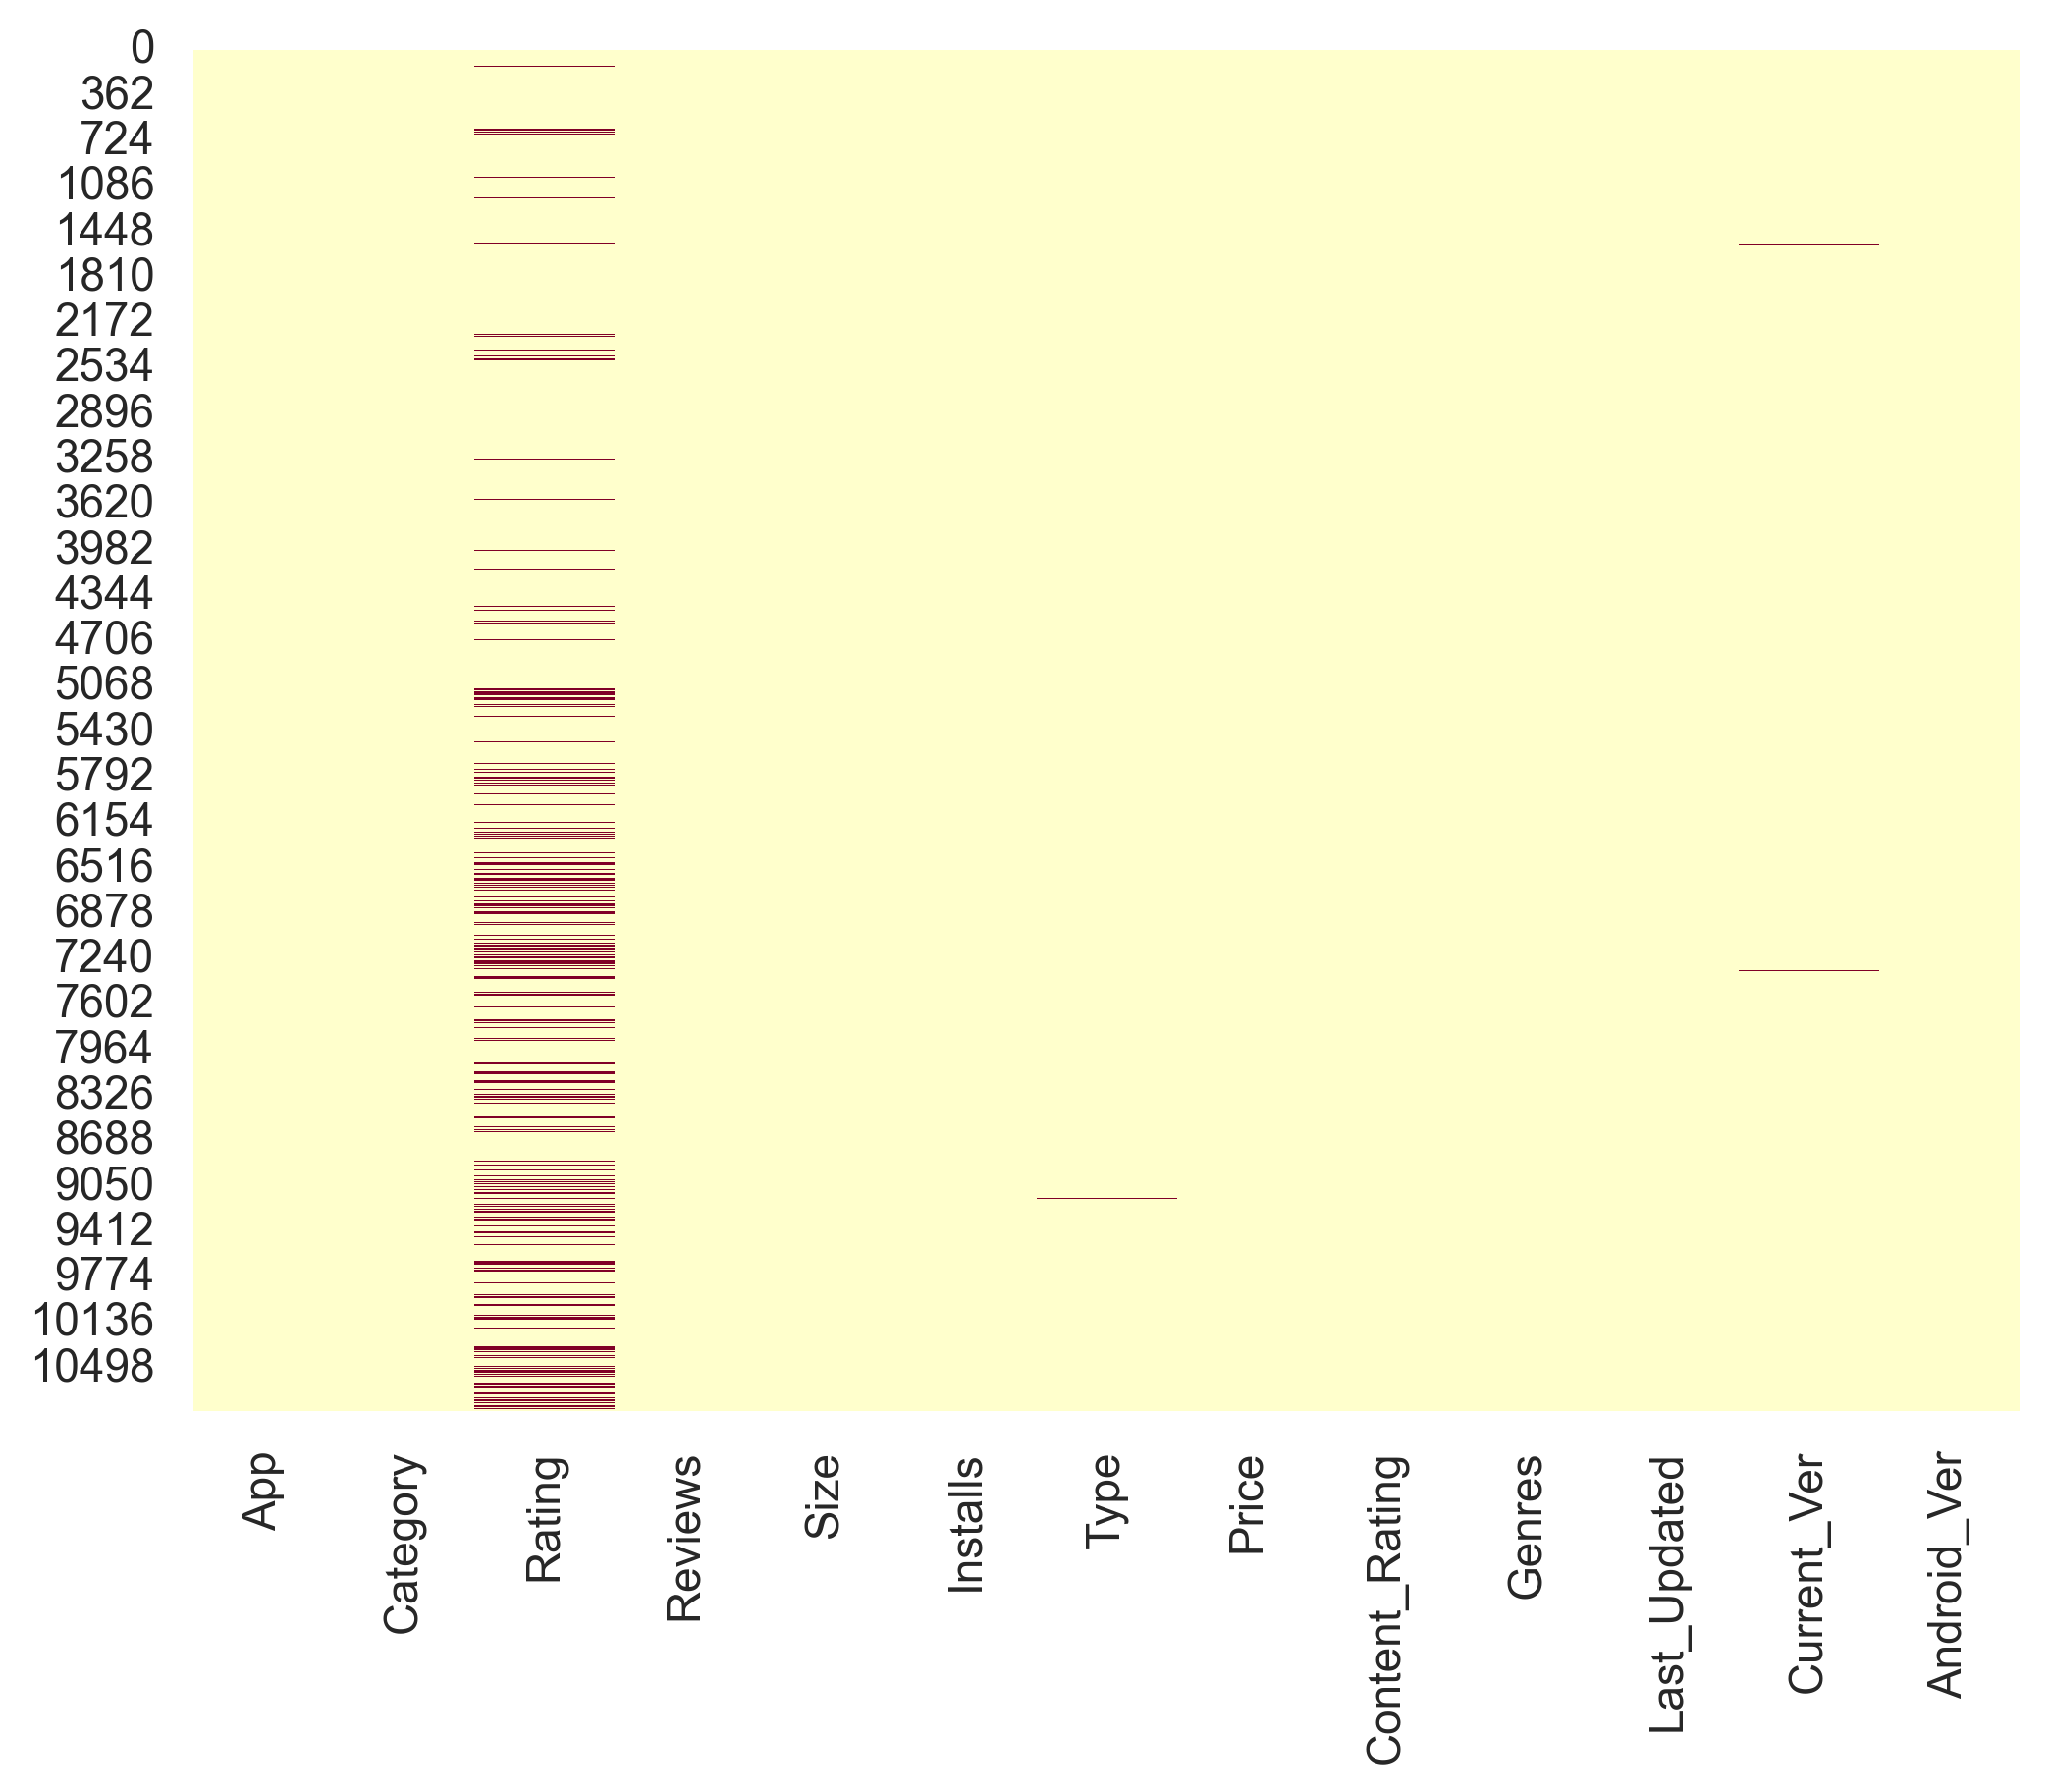

In [11]:
plt.figure(figsize=(8, 6))  # 8x6 inç boyutunda bir figure oluştur
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd');

**msno.bar(df);** kodu, missingno kütüphanesini (genellikle msno olarak kısaltılır) kullanarak veri setindeki eksik değerleri bar grafik şeklinde gösterir. 

Her bir bar, bir sütunu temsil eder ve barın yüksekliği, o sütundaki eksik olmayan değerlerin sayısını gösterir.

Bu tür bir görselleştirme, eksik verilerin hangi sütunlarda yoğunlaştığını hızlı bir şekilde anlamanıza yardımcı olabilir. 

Eksik verilerin olduğu sütunlar, veri temizleme veya önişleme aşamalarında özel dikkat gerektirebilir.

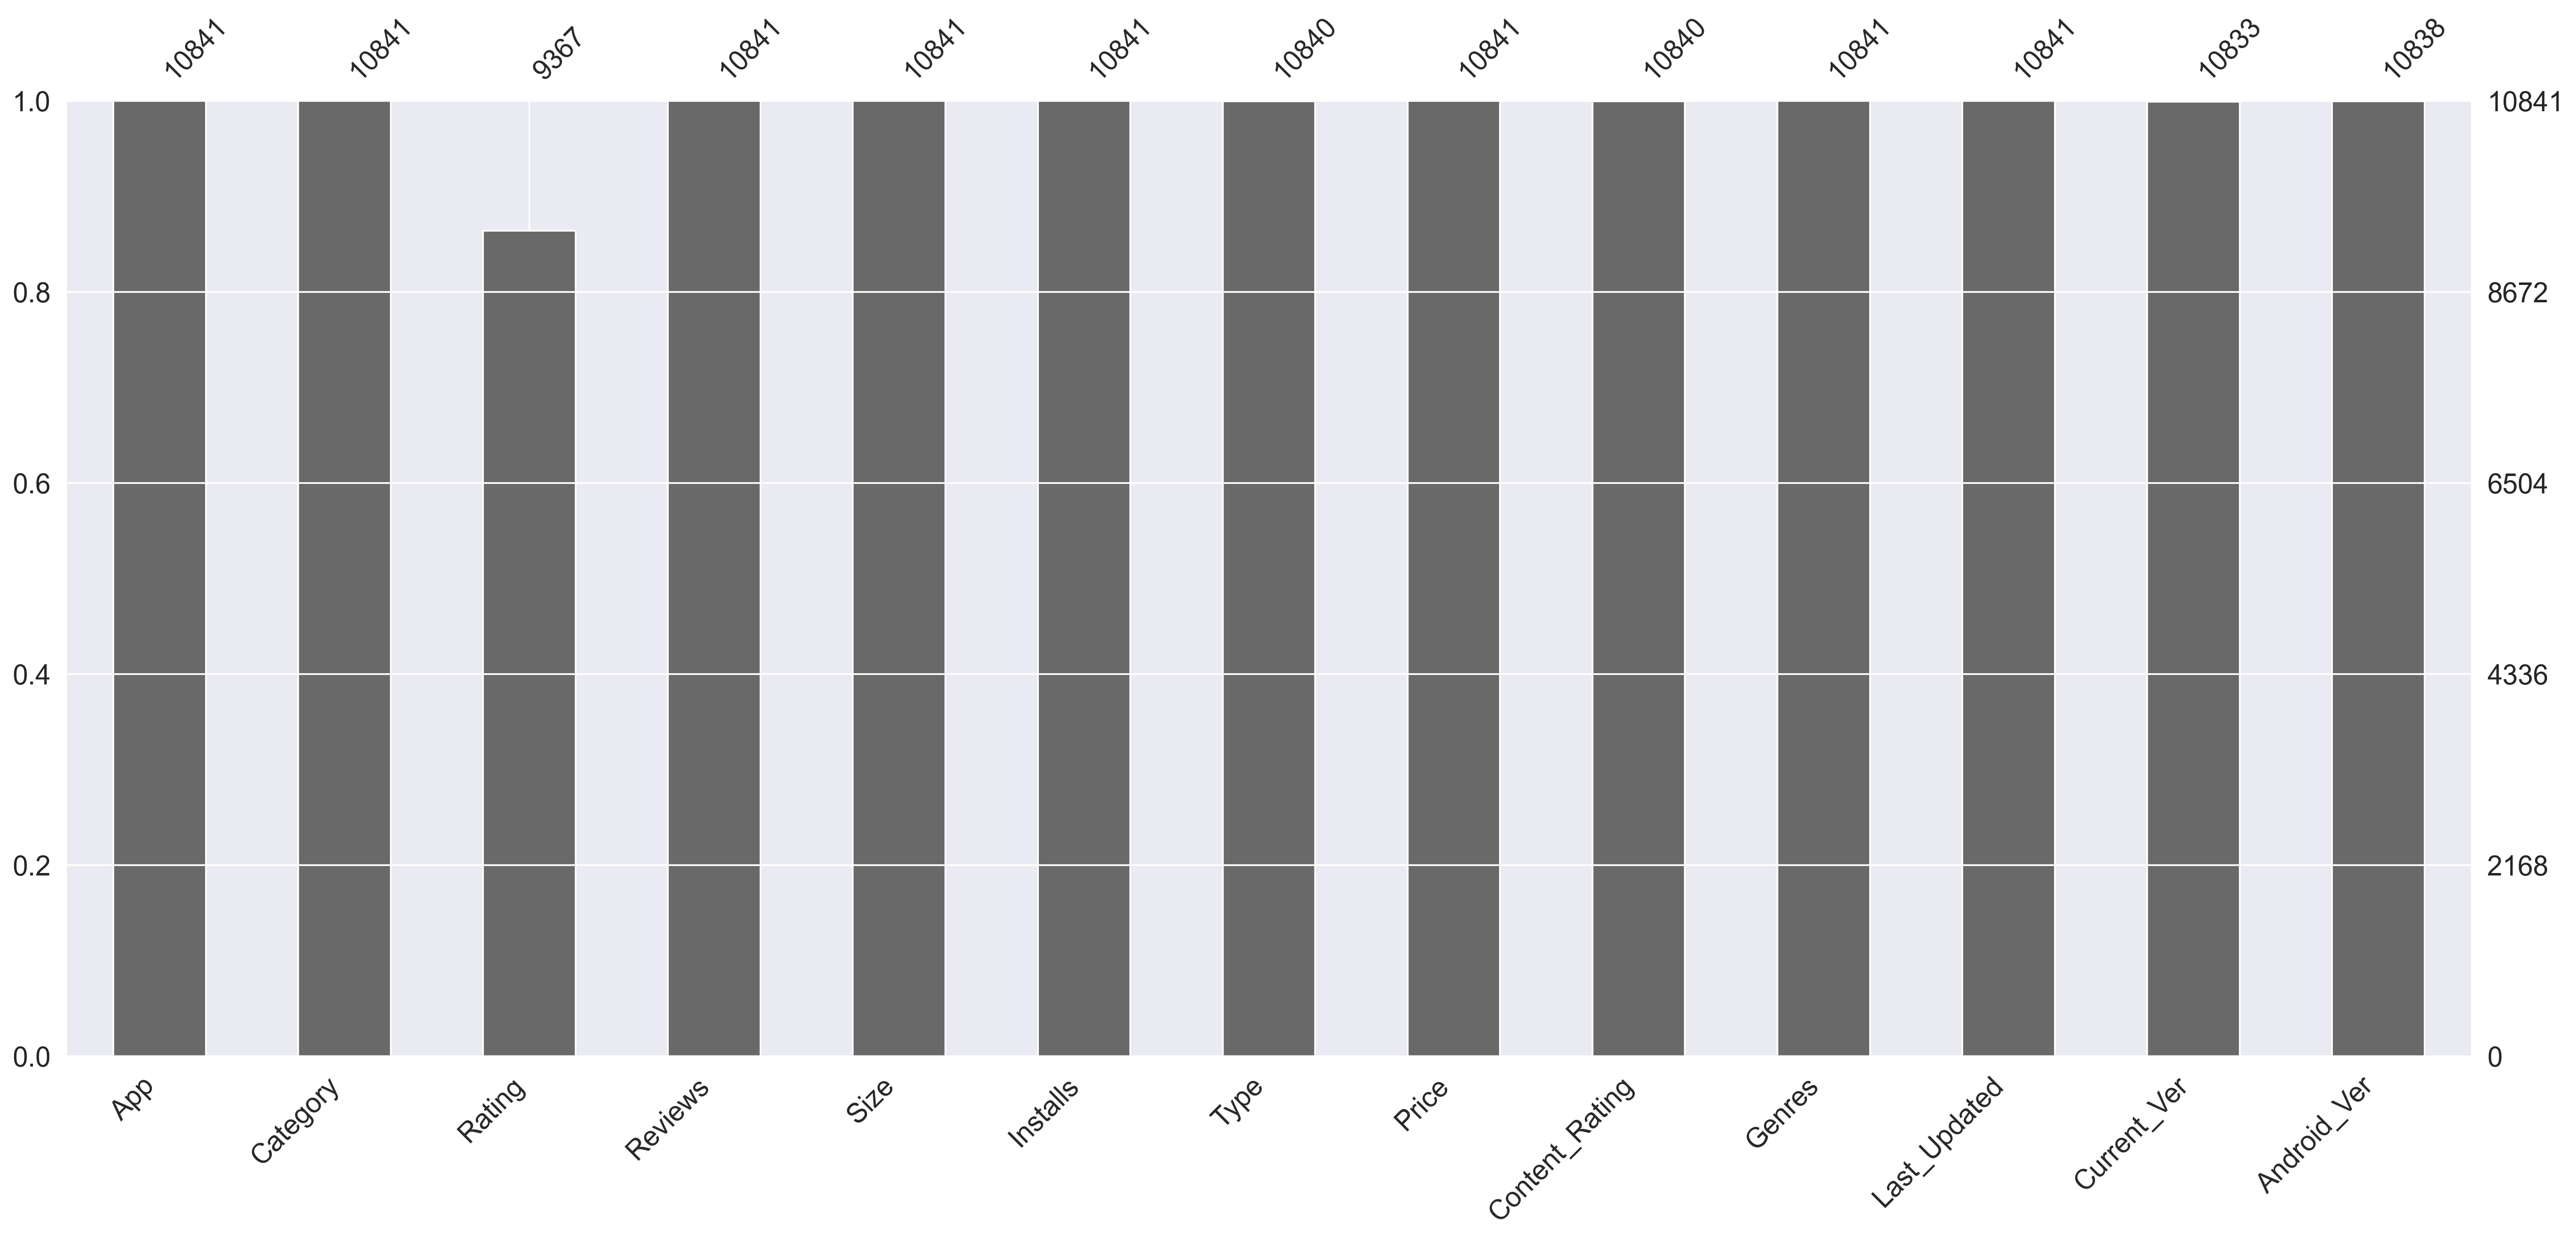

In [12]:
#bar chart olarak görmek için

msno.bar(df);

**Output Açıklaması**

**Yatay Eksen (X Ekseni):** Bu eksen, veri setindeki sütun isimlerini gösterir. Her bir sütun, bir bar ile temsil edilir.

**Dikey Eksen (Y Ekseni):** Bu eksen, her bir sütundaki eksik olmayan değerlerin sayısını gösterir. Eğer bir bar tamamen doluysa, bu o sütunda hiç eksik değer olmadığı anlamına gelir. Eğer bir bar tamamen dolu değilse, eksik değerler olduğu anlamına gelir.

**Barlar:** Her bir bar, bir sütunu temsil eder. Barın yüksekliği, o sütundaki eksik olmayan değerlerin sayısını gösterir. Barın rengi genellikle eksik olmayan değerlerin sayısını görselleştirmek için kullanılır. Tamamen dolu bir bar, o sütunda hiç eksik değer olmadığını gösterir.

**Barlar Üzerindeki Sayılar:** Her bir sütundaki eksik olmayan değerlerin tam sayısını gösterir.

**Grafiğin sağ dış tarafında yer alan sayılar:** Bu sayılar gözlem sayılarını rakamsal olarak göstermektedir.

**Grafiğin sol dış tarafında yer alan sayılar:** Bu sayılar gözlem sayılarını oransal olarak göstermektedir.

**msno.matrix(df);** missingno kütüphanesini kullanarak veri setindeki eksik değerleri bir matris grafiği şeklinde gösterir. 

Bu görselleştirme, veri setindeki eksik değerlerin yapısını anlamak için oldukça yararlıdır.

Bu tür bir görselleştirme, eksik değerlerin hangi sütunlarda ve satırlarda yoğunlaştığını, ayrıca eksik değerlerin veri seti boyunca nasıl dağıldığını görmek için oldukça yararlıdır.

Örneğin, eğer belirli bir sütunda çok fazla eksik değer varsa veya eksik değerler belirli bir desen gösteriyorsa, bu sütun veya desen üzerinde daha fazla çalışma yapmanız gerekebilir.

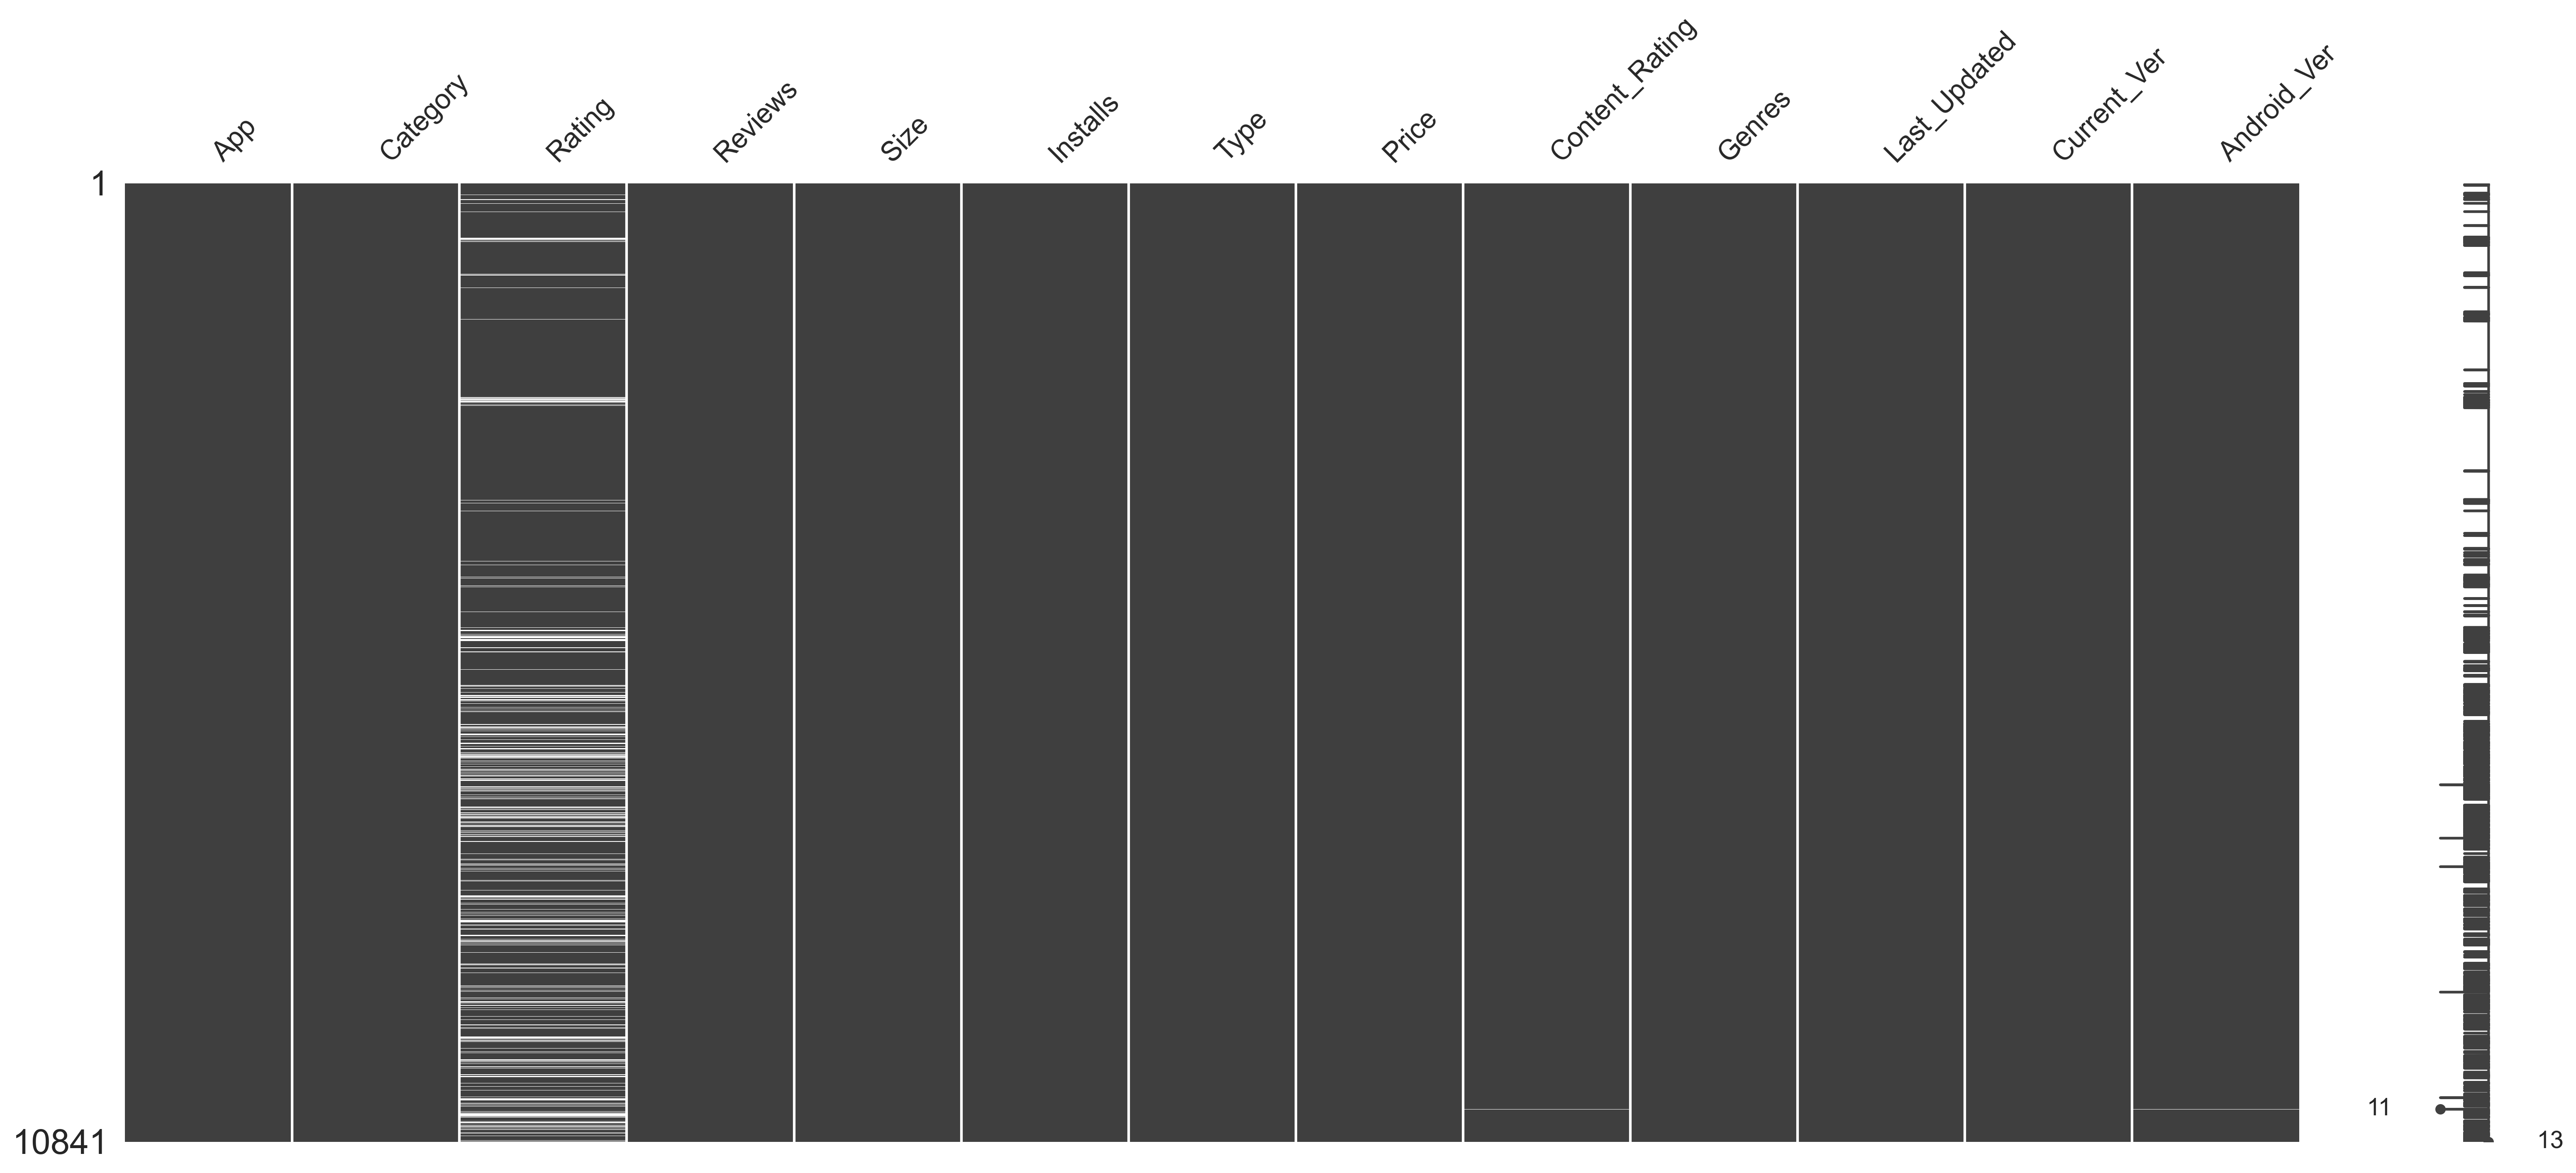

In [13]:
#Matrix chart olarak görmek için

msno.matrix(df);

**Yatay Eksen (X Ekseni):** Bu eksen, veri setindeki sütun isimlerini gösterir. Her bir sütun, bir dizi nokta veya çizgi ile temsil edilir.

**Dikey Eksen (Y Ekseni):** Bu eksen, veri setindeki satır indekslerini gösterir. Her bir satır, yatay eksende belirtilen sütunlardaki değerlerin var olup olmadığına göre bir dizi nokta veya çizgi ile temsil edilir.

**Noktalar ve Çizgiler:** Eğer bir değer eksikse, o nokta beyaz olarak gösterilir; eğer değer eksik değilse, o nokta gri veya siyah olarak gösterilir. Bu sayede, hangi sütunlarda ve satırlarda eksik değerlerin olduğunu görebilirsiniz.

**Sağ Taraftaki Bar (nullity bar):** Bu bar, her bir satırdaki eksik olmayan değerlerin sayısını gösterir. Bu, eksik değerlerin veri seti boyunca nasıl dağıldığını anlamanıza yardımcı olabilir (11 dolu-2 null, 13 dolu).

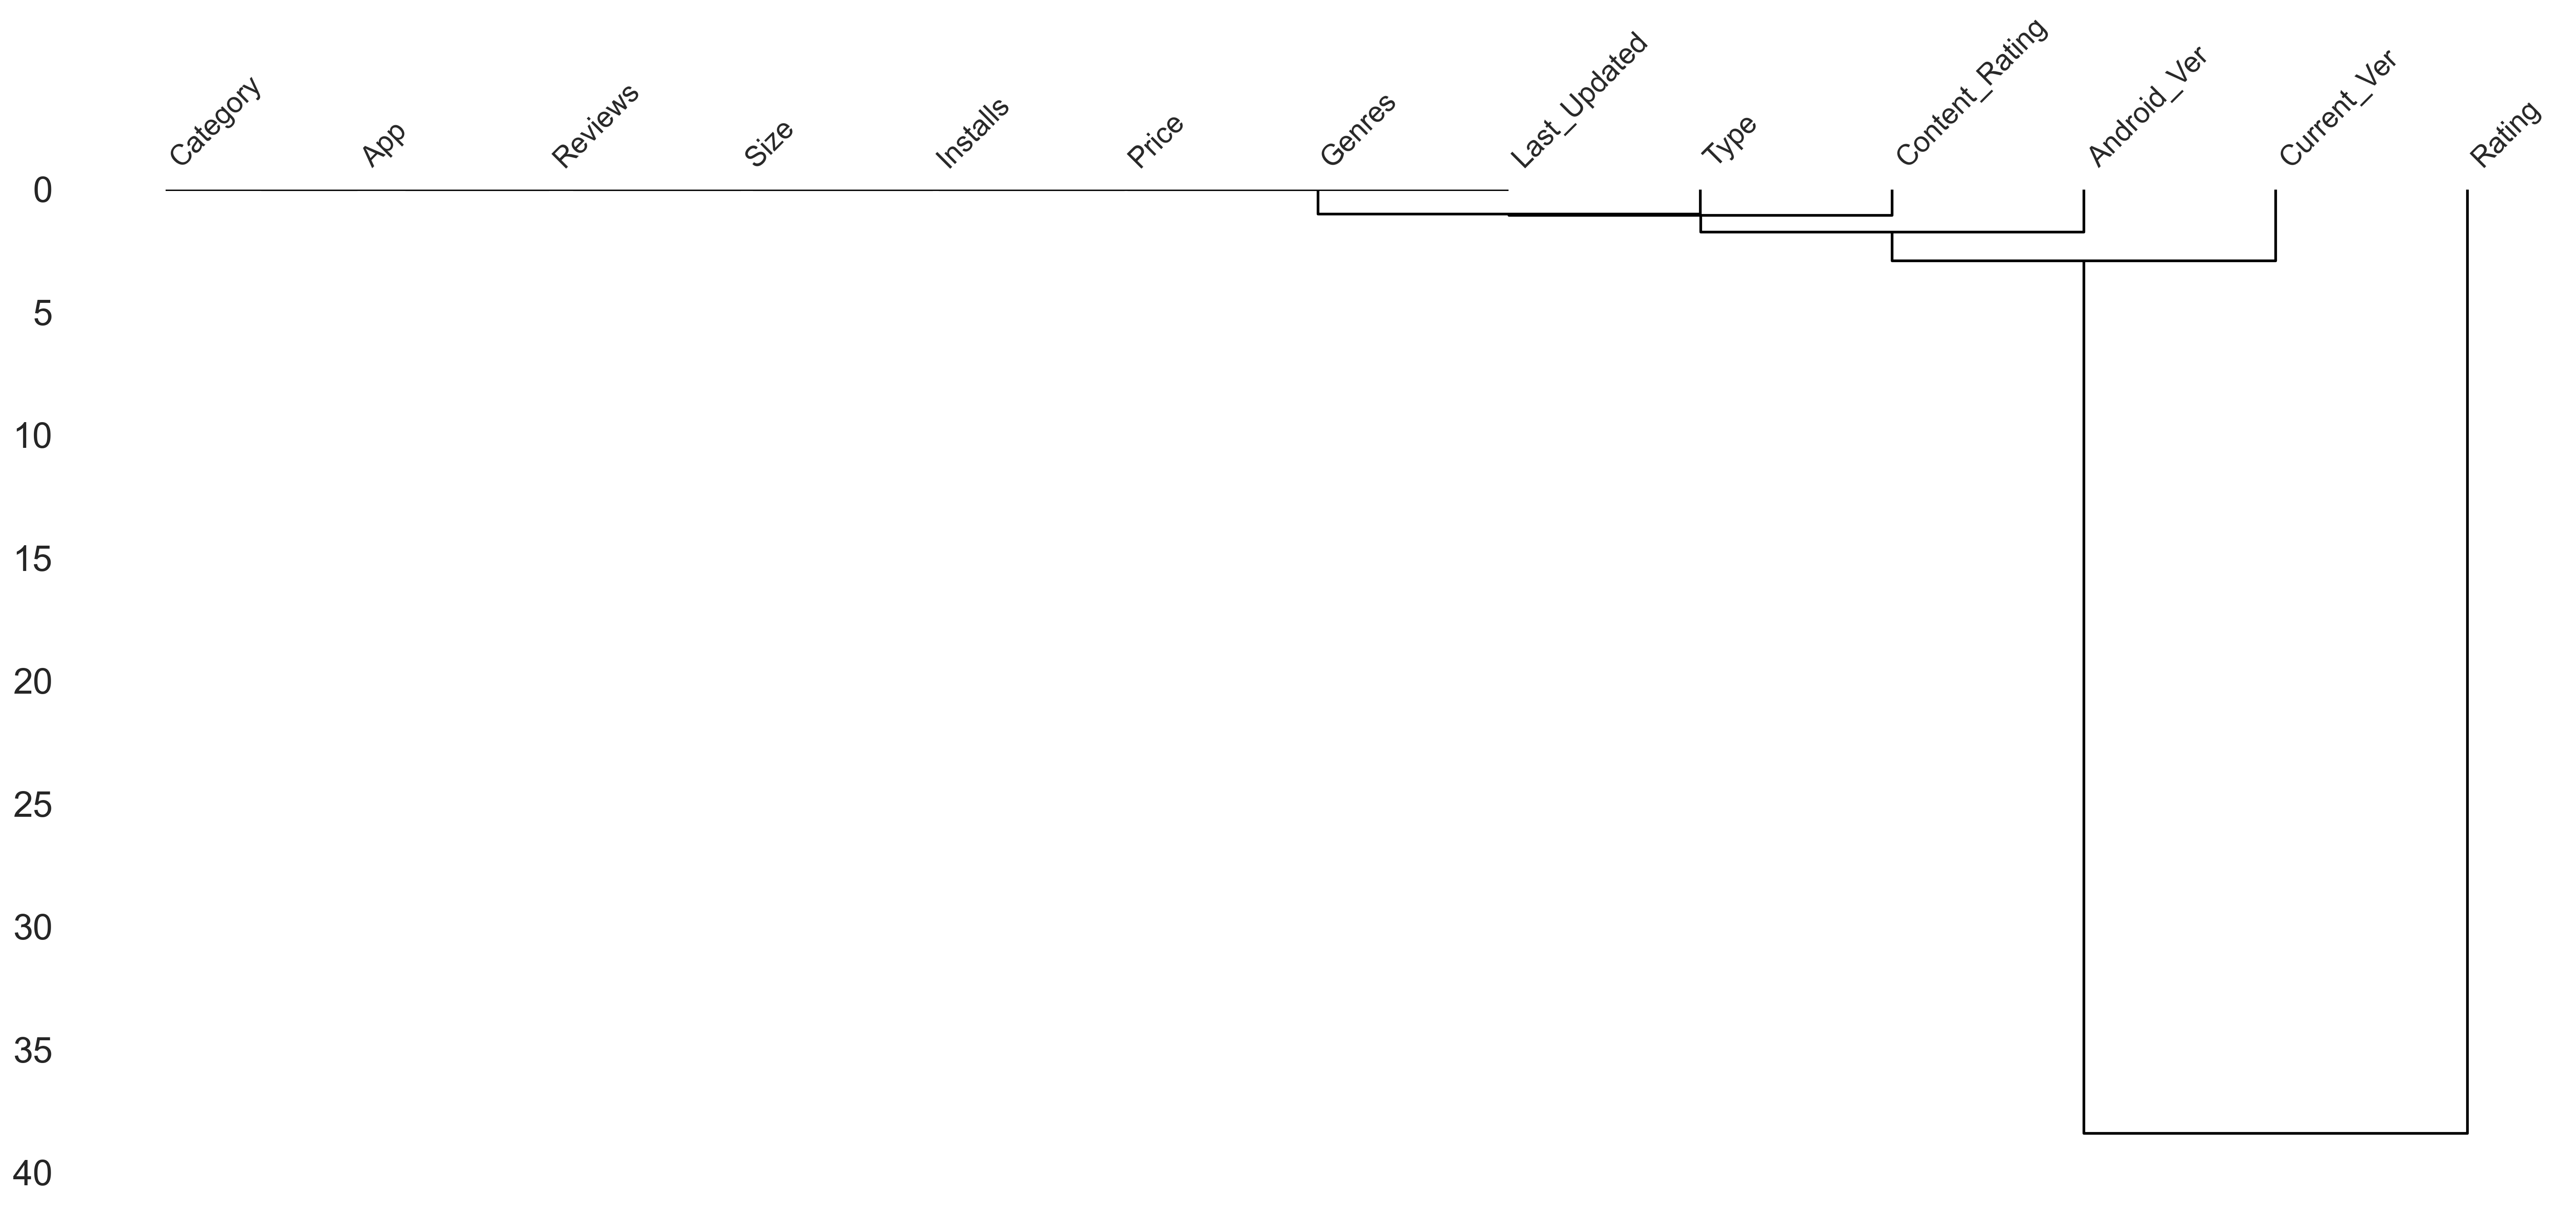

In [14]:
msno.dendrogram(df);

**msno.dendrogram() fonksiyonu,** bir DataFrame'deki eksik veri korelasyonlarını görselleştirmek için bir dendrogram oluşturur. 

Dendrogram, sütunlar arasındaki eksik veri korelasyonlarını hiyerarşik bir yapıda gösterir. 

**Sütunlar Arası Mesafe**
Sütunlar arası mesafe, iki sütun arasındaki eksik veri korelasyonunu gösterir. Mesafe ne kadar küçükse, korelasyon o kadar yüksektir. Yani, bir sütunda eksik veri olduğunda diğer sütunda da eksik veri olma olasılığı daha yüksektir.

**Dallanma Yüksekliği**
Dendrogramda görünen yatay çizgilerin yüksekliği, o dallanmanın "mesafesini" gösterir. Bu mesafe, birleştirilen iki grubun veya sütunun ne kadar "farklı" olduğunu ifade eder. Yükseklik ne kadar düşükse, o iki sütun veya grup arasında daha yüksek bir korelasyon vardır.

**Dallanma Sırası**
Dendrogramdaki dallanma sırası, yani hangi sütunların önce birleştiği, hangi sütunların daha sonra birleştiği, eksik veri korelasyonunun gücüne göre belirlenir.

**Pratik Yorum**
- Sütunlar arasında düşük mesafe ve düşük dallanma yüksekliği olanlar, birlikte eksik veriye sahip olma eğilimindedir. Bu sütunlar, veri temizleme veya imputasyon (eksik veri doldurma) işlemleri için birlikte ele alınabilir.
- Dendrogramdaki dallanma sırası, eksik verilerin hangi sütunlarla başladığını ve sona erdiğini gösterebilir. Bu, eksik verilerin neden olabileceği problemleri anlamak için faydalı olabilir.

Bu tür bir görselleştirme, genellikle büyük veri setlerinde veya birçok sütunu olan veri setlerinde eksik veri yapısını anlamak için çok kullanışlıdır.

**NOT**
**msno.dendrogram() fonksiyonu,** sadece eksik veriler arasındaki korelasyonu göstermez; aynı zamanda eksik olmayan verilerin korelasyonunu da gösterebilir. 

"genres" sütununuzda eksik değer yok fakat bu sütun "content_rating" ile birleşiyor; bu genellikle iki sütun arasında yüksek bir korelasyon olduğunu gösterir. 

Diğer bir deyişle, "genres" sütununda bir değer eksik olduğunda, "content_rating" sütununda da eksik bir değer olma olasılığı yüksektir, veya tam tersi.

Eğer iki sütun arasında böyle bir korelasyon gözlemliyorsanız, bu durum şunlara işaret edebilir:

1. **Veri Toplama Süreci**: İki sütunun aynı kaynaktan geldiği veya birbiriyle bağlantılı olduğu.
2. **Veri Temizleme veya İmputasyon Stratejisi**: İki sütunu birlikte ele almanız gerekebilir.
  
Ancak, dendrogramın sunduğu bu tür bilgiler genellikle yüksek seviyeli ve keşif amaçlıdır. İki sütun arasındaki kesin ilişkiyi anlamak için daha detaylı bir analiz yapmanız gerekebilir.

In [15]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

**msno.nullity_filter() fonksiyonu,** bir DataFrame'deki sütunları eksik verilerin sayısına göre filtreler. 

Belirli sayıda en fazla veya en az eksik veriye sahip sütunları görmek için kullanışlıdır. 

In [16]:
msno.nullity_filter(df, filter='top', n=5)  # bottom

# En fazla eksik veriye sahip 5 sütunu gösterir.

Size     Installs Price                     Genres  \
0                     19M      10,000+     0               Art & Design   
1                     14M     500,000+     0  Art & Design;Pretend Play   
2                    8.7M   5,000,000+     0               Art & Design   
3                     25M  50,000,000+     0               Art & Design   
4                    2.8M     100,000+     0    Art & Design;Creativity   
...                   ...          ...   ...                        ...   
10836                 53M       5,000+     0                  Education   
10837                3.6M         100+     0                  Education   
10838                9.5M       1,000+     0                    Medical   
10839  Varies with device       1,000+     0          Books & Reference   
10840                 19M  10,000,000+     0                  Lifestyle   

           Last_Updated  
0       January 7, 2018  
1      January 15, 2018  
2        August 1, 2018  
3          June 8, 2018  
4         June 20, 2018  
...                 ...  
10836     July 25, 2017  
10837      July 6, 2018  
10838  January 20, 2017  
10839  January 19, 2015  
10840     July 25, 2018  

[10841 rows x 5 columns]

**msno.nullity_sort() fonksiyonu,** bir DataFrame'deki sütunları eksik veri sayısına göre sıralar.

Eksik veri analizi sırasında hangi sütunların daha fazla veya daha az eksik veriye sahip olduğunu hızlı bir şekilde görmek için kullanışlıdır. 

In [17]:
msno.nullity_sort(df, sort='ascending')  

# Eksik veri oranına göre sütunları sıralar.

App             Category  \
7407                                 Calculate My IQ               FAMILY   
6803                                       BT Master               FAMILY   
10472        Life Made WI-Fi Touchscreen Photo Frame                  1.9   
10342                                 La Fe de Jesus  BOOKS_AND_REFERENCE   
7730                                          UFO-CQ                TOOLS   
...                                              ...                  ...   
3659                                    AEMET's time              WEATHER   
3660                   New 2018 Weather App & Widget              WEATHER   
3661                                       Météociel              WEATHER   
3663       Climatempo Lite - 15 day weather forecast              WEATHER   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type     Price  \
7407      NaN      44                7.2M      10,000+  Free         0   
6803      NaN       0                222k         100+  Free         0   
10472    19.0    3.0M              1,000+         Free     0  Everyone   
10342     NaN       8                658k       1,000+  Free         0   
7730      NaN       1                237k          10+  Paid     $0.99   
...       ...     ...                 ...          ...   ...       ...   
3659      3.8   15966                9.2M   1,000,000+  Free         0   
3660      4.5    2332                 20M     500,000+  Free         0   
3661      4.5   29344                 22M     500,000+  Free         0   
3663      4.0     634  Varies with device     100,000+  Free         0   
10840     4.5  398307                 19M  10,000,000+  Free         0   

      Content_Rating             Genres      Last_Updated         Current_Ver  \
7407        Everyone      Entertainment     April 3, 2017                 NaN   
6803        Everyone          Education  November 6, 2016                 NaN   
10472            NaN  February 11, 2018            1.0.19          4.0 and up   
10342       Everyone  Books & Reference  January 31, 2017                 NaN   
7730        Everyone              Tools      July 4, 2016                 NaN   
...              ...                ...               ...                 ...   
3659        Everyone            Weather     July 17, 2017                 2.0   
3660            Teen            Weather    August 3, 2018         12.2.7.3671   
3661        Everyone            Weather     July 25, 2018      4.1.11 - Hegoa   
3663        Everyone            Weather     June 15, 2018              1.0.34   
10840       Everyone          Lifestyle     July 25, 2018  Varies with device   

              Android_Ver  
7407           2.3 and up  
6803           1.6 and up  
10472                 NaN  
10342          3.0 and up  
7730           2.0 and up  
...                   ...  
3659           2.3 and up  
3660           4.1 and up  
3661           4.1 and up  
3663           4.1 and up  
10840  Varies with device  

[10841 rows x 13 columns]

- Yukardaki görseller ile Rating sütununda çok fazla eksik veri var olduğunu gördük.

- Eksik değerler, genellikle "NaN" (Not a Number) olarak temsil edilir ve veri çerçevesindeki bu eksik değerlere sahip satırlar, analiz veya model eğitimi sırasında istenmeyen sonuçlara neden olabilir. 

- Bu nedenle eksik değerlere sahip satırları kaldırmak, veri setinin temizlenmesine yardımcı olabilir.

- Bu eksik verilerle mücadele etmenin bir çok yolu var hatta bu makine öğrenmesi için önemli bir alan. Bu alan ayrı bir iş alanı olarak bilinmektedir. 

- Bu sütun için missing value yani eksik veriler için sık kullanılan bir yöntem olan median ile doldurma seçeneğini kullanacağım. Median değeri, veri setinin ortasında yer alan değerdir ve aykırı değerlerden genellikle etkilenmez.

- Eksik verileri doldururken ortalama kullanmadan önce datada mevcut aykırı değerleri her zaman akılda bulundurmak gerekir. 

- Aykırı değerlerin fazla olduğu data setinde ortalama tercihi yanlış olabilir. Ortalama değeri, veri setindeki aykırı değerlerden kolaylıkla etkilenebilir. 

- Bu nedenle, eğer veri setinizde aykırı değerler varsa ve bu değerlerin eksik verilerin doldurulmasında etkili olmasını istemiyorsanız, medyan kullanmak daha iyi bir seçenek olabilir. 

- Medyan, aykırı değerlere karşı daha "dirençli" olduğu için, bu tür durumlar için genellikle daha uygun bir seçenektir.

**rating_median = df["Rating"].median():** Bu satır, "Rating" adlı sütundaki verilerin ortanca (median) değerini hesaplar ve bu değeri "rating_median" adlı bir değişkene atar. Ortanca, veri setinin sıralandığında ortada bulunan değerdir ve veri setindeki değerlerin yarıdan fazlasını temsil eder.

In [18]:
rating_median = df["Rating"].median()
rating_median

4.3

**df["Rating"].fillna(rating_median, inplace=True):** Bu satır, "Rating" sütunundaki eksik değerleri ("NaN" olarak temsil edilir) "rating_median" değeri ile doldurur. fillna işlevi, belirtilen sütundaki eksik değerleri doldurmak için kullanılır. inplace=True parametresi, bu değişikliğin veri çerçevesine doğrudan uygulanmasını sağlar, yani yeni bir veri çerçevesi oluşturmak yerine mevcut veri üzerinde değişikliği sabit kılar.

In [19]:
df["Rating"].fillna(rating_median, inplace=True)

Diğer sütunlarda daha az sayıda eksiklik olduğundan bunları düşürmekte sakınca görmüyorum.

**dropna():** Eksik değerlere sahip olan satırları (gözlemleri) kaldırmak için kullanılır.

**inplace=True:** "True" olarak ayarlandığında, işlem data frame üzerinde yaptığımız değişiklikleri kalıcı hale getirir.

In [20]:
df.dropna(inplace=True)

**sum():** Bu, "True" değerlerin sayısını toplar. Yani, her sütun için eksik değerlerin sayısını hesaplar.

**İkinci sum():** İlk sum() işlemi sonucunda hesaplanan her sütun için eksik değerlerin sayısını toplar. Böylece, veri çerçevesindeki tüm eksik değerlerin toplam sayısını verir.

In [21]:
df.isnull().sum().sum()

0

<a id='preprocessing'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Data preprocessing (Veri ön işleme)</b></p>

**Hedef değişken hariç, veri setimizde yalnızca sayısal değişkenler istiyoruz: Bu amaç doğrultusunda veri ön işleme adımlarını gerçekleştireceğiz.**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


## <font color='green'> <b>Reviews column'unu ele alalım </b><font color='black'>

- **count:** 10,829 eksik olmayan değer var.
- **unique:** Bu 10,829 değerden 5,999 tanesi benzersiz.
- **top:** En sık rastlanan değer "0".
- **freq:** "0" değeri 594 kez tekrar ediyor.

Bu istatistikler, "Reviews" sütununun bir **kategorik** veya **metin** verisi olarak algılandığını gösteriyor. Eğer bu sütun sayısal bir veri türüne sahipse (yani, yorum sayıları), bu sütunu bir sayısal veri türüne (örneğin, int veya float) dönüştürmeniz faydalı olabilir. Bu dönüşüm, daha sonra bu sütun üzerinde sayısal analizler yapmayı kolaylaştırır.

"0" değerinin yüksek frekansı, bu sütunda birçok uygulamanın hiç yorum almadığını veya bu verinin eksik olduğunu gösteriyor olabilir. Bu tür durumlar, veri setini analiz ederken veya model oluştururken dikkate alınmalıdır.

Bu istatistikler ayrıca, "Reviews" sütununun veri setinde nasıl bir dağılım gösterdiği hakkında genel bir fikir verir. Örneğin, en sık rastlanan değer ve frekansı, veri setinin ne kadar çeşitli olduğu veya belirli bir değerin ne kadar yaygın olduğu hakkında bilgi sağlar.

In [23]:
df["Reviews"].describe()

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

**df["Reviews"] = df["Reviews"].astype("int64")** kodu, pandas DataFrame'de "Reviews" sütununun veri tipini int64 olarak değiştirir.

Eğer "Reviews" sütunu sayısal değerler içeriyorsa fakat bu değerler bir sayısal veri tipine sahip değilse (örneğin, object veya string olarak saklanıyorsa) kullanılır.

Bu dönüşüm, "Reviews" sütunu üzerinde sayısal analizler yapmayı ve bu sütunu sayısal bir modelde kullanmayı mümkün kılar. Örneğin, şimdi bu sütunun ortalamasını, medyanını, standart sapmasını vb. hesaplayabilirsiniz.

Ancak, bu kodu çalıştırmadan önce "Reviews" sütununda hiç eksik (NaN) veya metinsel değer olmadığından emin olmalısınız. Eğer varsa, astype("int64") dönüşümü hata verecektir. Eksik veya metinsel değerler varsa, bu değerleri uygun bir şekilde doldurmanız veya çıkartmanız gerekecektir.

In [24]:
df["Reviews"] = df["Reviews"].astype("int64")

- **count:** Eksik olmayan değerlerin sayısı.
- **mean:**  Ortalama değer.
- **std:**  Standart sapma.
- **min:**  Minimum değer.
- **25%:**  Birinci çeyreklik (Q1), yani veri setinin alt %25'lik diliminin üst sınırı.
- **50%:**  Medyan (Q2), yani veri setinin ortanca değeri.
- **75%:**  Üçüncü çeyreklik (Q3), yani veri setinin üst %25'lik diliminin alt sınırı.
- **max:**  Maksimum değer.

In [25]:
df["Reviews"].describe().round()

count       10829.0
mean       444602.0
std       2929213.0
min             0.0
25%            38.0
50%          2100.0
75%         54815.0
max      78158306.0
Name: Reviews, dtype: float64

## <font color='green'> <b>Size column'unu ele alalım </b><font color='black'>   

**print(len(df["Size"].unique())):** "Size" sütununda kaç farklı benzersiz değer olduğunu ekrana yazdırır. 

**df["Size"].unique():** "Size" sütununda yer alan benzersiz değerleri döndürür.

Bu kodlar, "Size" sütununun ne kadar çeşitli olduğunu anlamak için yararlıdır. Örneğin, eğer çok fazla benzersiz değer varsa, bu sütunu modellemede kullanırken bazı önişleme adımları yapmanız gerekebilir (örneğin, kategorik bir değişken olarak kodlama veya sayısal bir değişken olarak dönüştürme).

Ayrıca, bu benzersiz değerlerin ne olduğunu görmek, veri temizliği veya dönüşümü için hangi adımların gerekebileceği konusunda fikir verebilir. Örneğin, eğer "Size" sütunu hem "M" (Megabyte) hem de "K" (Kilobyte) gibi farklı birimler içeriyorsa, bu değerleri aynı birime dönüştürmek gerekebilir.

In [26]:
print(len(df["Size"].unique()))
df["Size"].unique()

457


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Bu fonksiyonun amacı, verilen bir boyut değerini ("size") megabayt (M) cinsine dönüştürmektir.

1. **if isinstance(size, str):**: Fonksiyon, ilk olarak size parametresinin bir dize (string) olup olmadığını kontrol eder. Eğer dize ise, içeriğe göre dönüşüm yapılacaktır.

2. **if 'k' in size:**: Eğer size içinde 'k' karakteri varsa, bu kilobayt (K) cinsinden bir değer olduğunu gösterir. Dönüşümü megabayt cinsine yapabilmek için kilobayt değerini 1024'e böler. Sonuçta çıkan ondalık sayıyı yuvarlar (round) ve 2 ondalık basamağa kadar gösterir.

3. **elif 'M' in size:**: Eğer size içinde 'M' karakteri varsa, zaten megabayt (M) cinsindendir. 'M' karakterini kaldırır ve sayısal değeri döndürür.

4. **else:**: Eğer 'k' veya 'M' içermiyorsa (örneğin, "Varies with device" gibi), None döndürülür. Bu, değerin bilinmediğini gösterir.

5. **return None**: Eğer size parametresi string değilse (örneğin None veya NaN), fonksiyon None döndürür.

In [27]:
# 'Size' sütununu dönüştüren fonksiyon
def convert_to_megabytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return round(float(size.replace('k', '')) / 1024, 2)
        elif 'M' in size:
            return float(size.replace('M', ''))
        else:
            return None  # 'Varies with device' veya sayıya dönüştürülemeyen diğer değerler için
    return None  # None veya NaN için

In [28]:
# 'Size' sütununu dönüştürüyoruz
df['Converted_Size'] = df['Size'].apply(convert_to_megabytes)

In [29]:
# Dönüştürülen 'Converted_Size' sütunu ile orijinal 'Size' sütununu karşılaştıralım
sample_data = df[df['Size'].str.contains('k|M', na=False)]
sample_data[['Size', 'Converted_Size']].sample(20)

Size  Converted_Size
5866   18M           18.00
5025  5.1M            5.10
6731  3.3M            3.30
1852   70M           70.00
9336   61M           61.00
9671   92M           92.00
349    15M           15.00
3615   38M           38.00
6974   27k            0.03
9641   15M           15.00
4562   28M           28.00
1934   82M           82.00
3031   84M           84.00
2102   48M           48.00
2526   20M           20.00
9429   15M           15.00
7389   10M           10.00
4041   62M           62.00
7422   11M           11.00
501    21M           21.00

In [30]:
# df["Size"].replace("M","", regex=True, inplace = True)
# df["Size"].replace("k","", regex=True, inplace = True)

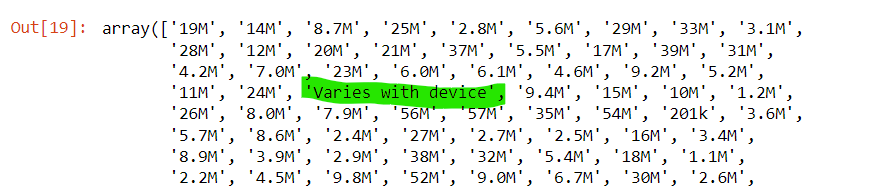

Şimdi "Size" column unda "Varies with device" olarak belirtilmiş değerlerin, bu column un medyanı (ortanca değeri) ile değişitirlmesini sağlayacağız. Bunun için öncelikle "Size" sütununun medyanını hesaplayalayacağız. Sonrada bu değer ile Varies with device değerlerini değiştireceğiz. Bu sayede "Size" sütununda "Varies with device" olarak belirtilmiş değerlerin ne olduğu belirsiz olduğu için, bu değerleri bu sütunun medyanı ile doldurarak aslında bir feature engineering yapıyoruz.

Medyan, genellikle aykırı değerlerin etkisinden daha az etkilenir, bu yüzden eksik veya belirsiz verileri doldurmak için iyi bir seçenek olarak düşünülebilir.

Bu işlemi yapmak için, öncelikle "Varies with device" olmayan satırların medyanını hesaplayabilir ve ardından bu medyan değeri ile "Varies with device" olan satırları değiştirebilirsiniz. 

**df[df["Size"]!="Varies with device"]:** DataFrame'den ("df"), "Size" sütunu "Varies with device" olmayan satırları seçer.

**["Size"].astype(float):** Seçilen satırların "Size" sütununu float türüne dönüştürür. Bu, medyanı hesaplamak için gereklidir çünkü medyan, sayısal bir ölçüdür.

**.median():** Dönüştürülen "Size" sütununun medyanını hesaplar.

Sonuç olarak, size_median değişkeni bu medyan değerini saklar. Bu değer, "Size" sütununda "Varies with device" olarak belirtilmiş veya eksik olan değerleri doldurmak için kullanılabilir. Medyan, veri setindeki aykırı değerlerden daha az etkilendiği için, genellikle eksik verileri doldurmak için iyi bir seçenektir.

In [31]:
size_median = df[df["Converted_Size"]!="Varies with device"]["Converted_Size"].astype(float).median()
size_median

13.0

**Kod Açıklaması**

Bu kod parçası, "Size" sütununda "Varies with device" olarak belirtilmiş değerleri, daha önce hesaplanmış olan size_median (medyan) değeri ile değiştirir.

**df["Size"].replace("Varies with device", size_median, inplace=True):** "Size" sütununda "Varies with device" olarak belirtilmiş tüm değerleri size_median ile değiştirir. inplace=True parametresi, değişikliklerin aynı DataFrame üzerinde yapılmasını sağlar.

Bu işlem, "Size" sütununda belirsiz olan değerleri bir sayısal değerle doldurur, böylece bu sütun daha sonra sayısal analizler veya makine öğrenimi modelleri için kullanılabilir hale gelir. Bu tür bir değişiklik, genellikle öznitelik mühendisliği olarak kabul edilir, çünkü modelin bu öznitelikten (sütundan) daha etkili bir şekilde yararlanabilmesi için veriyi dönüştürmeyi amaçlar.

In [32]:
df["Converted_Size"].replace("Varies with device", size_median, inplace=True)

**pd.to_numeric(df.Converted_Size):** Pandas'ın to_numeric fonksiyonu, "Converted_Size" sütunundaki değerleri sayısal bir formata dönüştürür. Eğer dönüşüm sırasında bir hata olursa (örneğin, sayısal olmayan bir değer varsa), bir hata mesajı döndürecektir.

Bu işlem, "Converted_Size" sütununun sayısal analizler veya makine öğrenimi modelleri için kullanılabilir hale gelmesini sağlar. 

In [33]:
df.Converted_Size = pd.to_numeric(df.Converted_Size)

In [34]:
df.Converted_Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Converted_Size, dtype: float64

**df.Size.describe().round()** kodu, "Converted_Size" sütununun temel istatistiklerini hesaplar ve bu değerleri en yakın tam sayıya yuvarlar.

In [35]:
df.Converted_Size.describe().round()

count    9135.0
mean       22.0
std        23.0
min         0.0
25%         5.0
50%        13.0
75%        30.0
max       100.0
Name: Converted_Size, dtype: float64

In [36]:
df.drop("Size", axis=1, inplace=True)

In [37]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Converted_Size'],
      dtype='object')

## <font color='green'> <b>Installs column'unu ele alalım</b> <font color='black'>   

In [38]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

**df.Installs = df.Installs.apply(lambda x:x.replace("+","")):** Bu kod, "Installs" sütunundaki her bir değerde "+" karakterini kaldırır. Örneğin, "10,000+" değeri "10,000" olarak değiştirilir.

**df.Installs = df.Installs.apply(lambda x:x.replace(",","")):** Bu kod, "Installs" sütunundaki her bir değerde virgül (",") karakterini kaldırır. Örneğin, "10,000" değeri "10000" olarak değiştirilir.

**df.Installs = df.Installs.apply(lambda x:int(x)):** Bu kod, "Installs" sütunundaki her bir değeri bir tam sayıya (int) dönüştürür. Örneğin, "10000" değeri 10000 olarak değiştirilir (string değil, tam sayı).

Bu işlemler, "Installs" sütununu sayısal analizler veya makine öğrenimi modelleri için uygun bir forma getirir. Bu tür bir dönüşüm genellikle öznitelik mühendisliği olarak kabul edilir, çünkü modelin bu öznitelikten daha etkili bir şekilde yararlanabilmesi için veriyi dönüştürmeyi amaçlar.

In [39]:
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

In [40]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

Bu benzersiz değerler, uygulamaların ne kadar indirildiğini gösterir. Örneğin:

10,000: Uygulamanın 10,000 kez indirildiğini gösterir.

500,000: Uygulamanın 500,000 kez indirildiğini gösterir.

1,000,000: Uygulamanın 1,000,000 kez indirildiğini gösterir.

... ve benzeri.

Bu değerlerin tam sayı olarak saklanması, sayısal analizler ve makine öğrenimi modelleri için bu sütunu daha kullanışlı hale getirir.

Örneğin, bu sayısal değerleri bir regresyon modelinde bağımlı veya bağımsız değişken olarak kullanabilirsiniz.

## <font color='green'><b>Price column'unu ele alalım</b> <font color='black'>   

Bu bilgi, "Price" sütununu nasıl önişleyeceğinizi (preprocess) veya dönüştüreceğinizi (transform) belirlemeniz için önemli olabilir. Örneğin, eğer bu sütun sayısal değerler içeriyorsa fakat bu değerler bir string formatında saklanıyorsa (örneğin, "$1.99" gibi), bu değerleri sayısal bir formata dönüştürmek gerekebilir.

Bu tür bir analiz, veri setinin genel bir anlayışını kazanmak ve özellikle bu sütunun modelleme aşamasına geçmeden önce nasıl bir dağılım gösterdiğini anlamak için yararlıdır.

In [41]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

**df.Price = df.Price.apply(lambda x:x.replace("$","")):** Bu satır, "Price" sütunundaki değerlerin başındaki `\$` işaretini kaldırır. apply yöntemi, her bir sütun değerine belirli bir işlem uygulamanıza olanak tanır. Bu durumda, lambda fonksiyonu kullanılarak her bir değerdeki `\$` işareti boş bir dizeyle değiştirilir.

**df.Price = df.Price.apply(lambda x:float(x)):** Bu satır, "Price" sütunundaki değerleri ondalık (float) bir sayıya dönüştürür. apply yöntemi, her bir sütun değerine dönüşüm işlemi uygulamak için kullanılır. Bu durumda, float() fonksiyonu ile her bir değer ondalık bir sayıya dönüştürülür.

Sonuç olarak, bu kod parçacığı "Price" sütunundaki değerleri temizler ve ondalık sayı veri türüne dönüştürür. Bu işlem, sütundaki fiyatları sayısal veriler olarak kullanmanız gerektiğinde oldukça yararlıdır.

In [42]:
df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x))

In [43]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

## <font color='green'> <b>Genres column'unu ele alalım</b><font color='black'>  

In [44]:
df["Genres"].nunique()

119

In [45]:
df["Genres"].head(10)

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
7                 Art & Design
8                 Art & Design
9      Art & Design;Creativity
Name: Genres, dtype: object

Bu çıktı, "Genres" sütununun ilk 10 satırını göstermektedir. Gördüğümüz gibi, bu sütun genellikle bir veya birden fazla tür veya kategori içermektedir. Türler ve kategoriler arasında bir noktalı virgül **(";")** ile ayrım yapılmış.

**Örneğin:**

"Art & Design": Bu, uygulamanın "Art & Design" kategorisine ait olduğunu gösterir.
"Art & Design;Pretend Play": Bu, uygulamanın hem "Art & Design" hem de "Pretend Play" kategorilerine ait olduğunu gösterir.
"Art & Design;Creativity": Bu, uygulamanın hem "Art & Design" hem de "Creativity" kategorilerine ait olduğunu gösterir.
Bu tür bir sütun, genellikle kategorik bir öznitelik olarak kabul edilir ve bu tür öznitelikler genellikle makine öğrenimi modelleri için önişleme gerektirir. Örneğin, bu tür bir sütunu modelinize dahil etmek istiyorsanız, "One-Hot Encoding" gibi bir yöntem kullanarak bu kategorik değişkeni sayısal bir forma dönüştürebilirsiniz.

Bu çıktı ayrıca, veri setinin ne tür uygulamaları kapsadığı hakkında da fikir verir. Örneğin, bu örnek veri seti, ilk 10 satırda yalnızca "Art & Design" kategorisine ait uygulamaları içermektedir. Ancak bu, tüm veri setinin de bu şekilde olduğu anlamına gelmez; bu yalnızca ilk 10 satır için geçerlidir.

119 unique olan column u ben burada biraz azaltacağım bu sebeple özellikle noktalı virgülle ayrılan türlerin olduğu satıra bakalım burada alt türleri almak istemiyorum. Ana tür ile yürümek istiyorum. Bu kapsamda buna yönelik bir kod yazacağım.

**Kod Açıklaması**

Bu kod parçası, "Genres" sütunundaki değerleri noktalı virgül (";") ile ayırır ve ardından ilk öğeyi (index 0) alır. Yani eğer bir satırda birden fazla tür veya kategori varsa (örneğin, "Art & Design;Pretend Play"), bu kod sadece ilk türü veya kategoriyi alır ("Art & Design").


**df["Genres"].str.split(";"):** Bu kısım, "Genres" sütunundaki her bir değeri noktalı virgül (";") ile ayırır. Sonuç olarak her bir satır için bir liste döner.

**.str[0]:** Bu kısım, oluşturulan listenin ilk öğesini alır (Python'da indexler 0'dan başlar).

Bu işlem, "Genres" sütununu daha basit bir forma dönüştürmeyi amaçlar. Örneğin, eğer bir uygulama birden fazla türe sahipse, bu kod sadece ilk türü alır. Bu, özellikle makine öğrenimi modelleri için veri setini daha yönetilebilir hale getirebilir, ancak bu yaklaşımın bir uygulamanın birden fazla türü veya kategorisi olduğu durumda bazı bilgileri kaybedebileceğini unutmamak önemlidir.

In [46]:
df["Genres"] = df["Genres"].str.split(";").str[0]

**Kod açıklaması**

**len(df["Genres"].unique())** kodu, "Genres" sütununda kaç farklı benzersiz değer olduğunu sayar.

Bu kod, "Genres" sütununun ne kadar çeşitli olduğu hakkında bir fikir verir. Örneğin, eğer bu sayı çok yüksekse, bu sütunun çok fazla farklı kategori veya tür içerdiğini gösterir. Eğer sayı düşükse, bu genellikle sütunun daha az çeşitlilik gösterdiği anlamına gelir.

Bu tür bir analiz, veri setinin genel bir anlayışını kazanmak ve özellikle bu sütunun modelleme aşamasına geçmeden önce nasıl bir dağılım gösterdiğini anlamak için yararlıdır.

In [47]:
df["Genres"].nunique()

48

In [48]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [49]:
df["Genres"].value_counts()

Genres
Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
H

Bu output ile Music ve Music & Audio nun aynı anlamda kullanıldığı izlenimini veriyor bu sebeple hepsini Music olarak düzeltmem doğru olacaktır.

In [50]:
df["Genres"].replace("Music & Audio", "Music", inplace =True)

## <font color='Green'> <b>Last_Updated column'unu ele alalım</b><font color='black'> 

"Last_Updated" sütunu, uygulamanın en son ne zaman güncellendiğini gösteren tarihleri içerir. Bu sütun genellikle tarih formatında olur (örneğin, "January 7, 2018").

Bu kodun çıktısı, bu sütunun genel yapısını ve tarihlerin nasıl saklandığını gösterir. Eğer bu sütunu modelinizde kullanmayı planlıyorsanız, tarihleri sayısal bir forma dönüştürmek veya tarihler arasında geçen gün sayısını hesaplamak gibi önişleme adımları gerekebilir.

Bu tür bir analiz, veri setinin genel bir anlayışını kazanmak ve özellikle bu sütunun modelleme aşamasına geçmeden önce nasıl bir dağılım gösterdiğini anlamak için yararlıdır.

In [51]:
df["Last_Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

**pd.to_datetime(df["Last_Updated"]):** Pandas kütüphanesinin to_datetime fonksiyonu, bir dizi, serisi veya tek bir tarih değerini datetime nesnesine dönüştürebilir. Bu kod parçası, "Last_Updated" sütunundaki tüm değerleri datetime nesnesine dönüştürür.

Bu dönüştürme işlemi, tarihlerle daha kolay çalışabilmek için yararlıdır. Örneğin, şimdi bu sütunu kullanarak uygulamanın en son ne zaman güncellendiğinden bu yana geçen gün sayısını hesaplayabilir, veya yıllara, aylara veya günler gibi belirli bir zaman dilimine göre gruplayabilirsiniz. 

In [52]:
# Tarih-saat dizisini oluştur

df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

In [53]:
# Yıl, Ay ve Gün'ü ayrı sütunlara ayır

df['Year'] = df['Last_Updated'].dt.year
df['Month'] = df['Last_Updated'].dt.month
df['Day'] = df['Last_Updated'].dt.day

In [54]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Installs  Type  Price Content_Rating        Genres Last_Updated  \
0      159     10000  Free    0.0       Everyone  Art & Design   2018-01-07   
1      967    500000  Free    0.0       Everyone  Art & Design   2018-01-15   
2    87510   5000000  Free    0.0       Everyone  Art & Design   2018-08-01   
3   215644  50000000  Free    0.0           Teen  Art & Design   2018-06-08   
4      967    100000  Free    0.0       Everyone  Art & Design   2018-06-20   

          Current_Ver   Android_Ver  Converted_Size  Year  Month  Day  
0               1.0.0  4.0.3 and up            19.0  2018      1    7  
1               2.0.0  4.0.3 and up            14.0  2018      1   15  
2               1.2.4  4.0.3 and up             8.7  2018      8    1  
3  Varies with device    4.2 and up            25.0  2018      6    8  
4                 1.1    4.4 and up             2.8  2018      6   20

In [55]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Installs                   int64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
Converted_Size           float64
Year                       int32
Month                      int32
Day                        int32
dtype: object

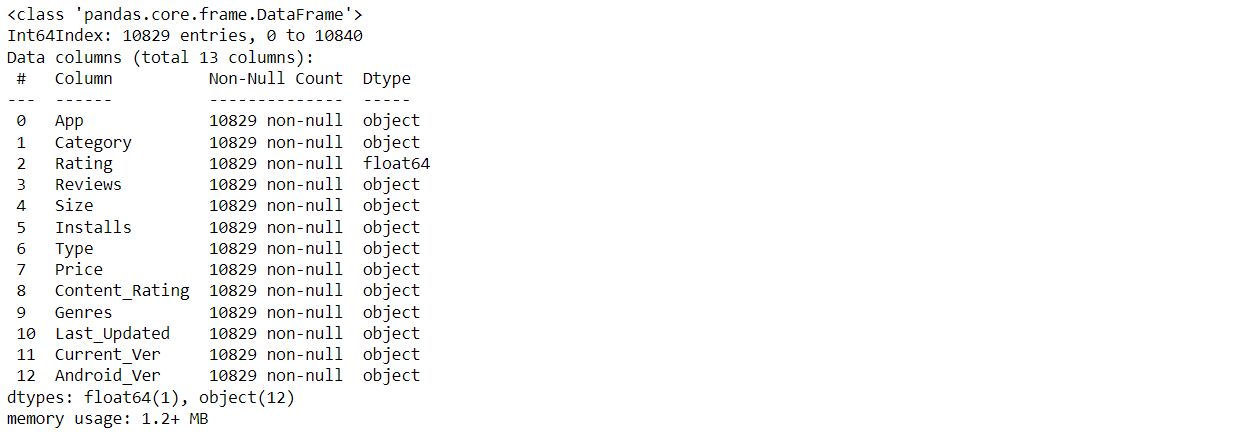

# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Data Visualization</b></p>
![](https://neilpatel.com/wp-content/uploads/2021/03/Data-Visualization_Featured-Image-1.png)

## <font color='green'><b> Type göre bir bar grafik çizimi</b><font color='black'> 

Type sütunundaki değerlerin frekansını gösteren bir bar grafiği oluşturuyoruz.

**type_counts = df['Type'].value_counts():** Bu satır, Type sütunundaki her bir benzersiz değerin kaç kez tekrar ettiğini hesaplar ve bu bilgiyi type_counts değişkenine kaydeder.

**plt.figure(figsize=(15, 10)):** Bu satır, oluşturulacak grafik için boyutu 15x10 olarak ayarlar.

**plt.bar(type_counts.index, type_counts.values, color=['blue', 'orange']):** Bu satır, bar grafiğini çizer. type_counts.index x ekseninde gösterilecek değerlerdir ("Free" ve "Paid"), type_counts.values ise y ekseninde gösterilecek değerlerdir (her bir tür için uygulama sayısı).

**plt.xlabel('Uygulama Türü'), plt.ylabel('Uygulama Sayısı'), plt.title('Uygulama Türüne Göre Uygulama Sayısı'):** Bu satırlar, x ve y eksenlerine etiket ekler ve grafiğe bir başlık verir.

**plt.show():** Bu satır, grafiği gösterir.

In [56]:
# 'Type' sütunundaki değerlerin sayısını al

type_counts = df['Type'].value_counts()
type_counts

Type
Free    10032
Paid      797
Name: count, dtype: int64

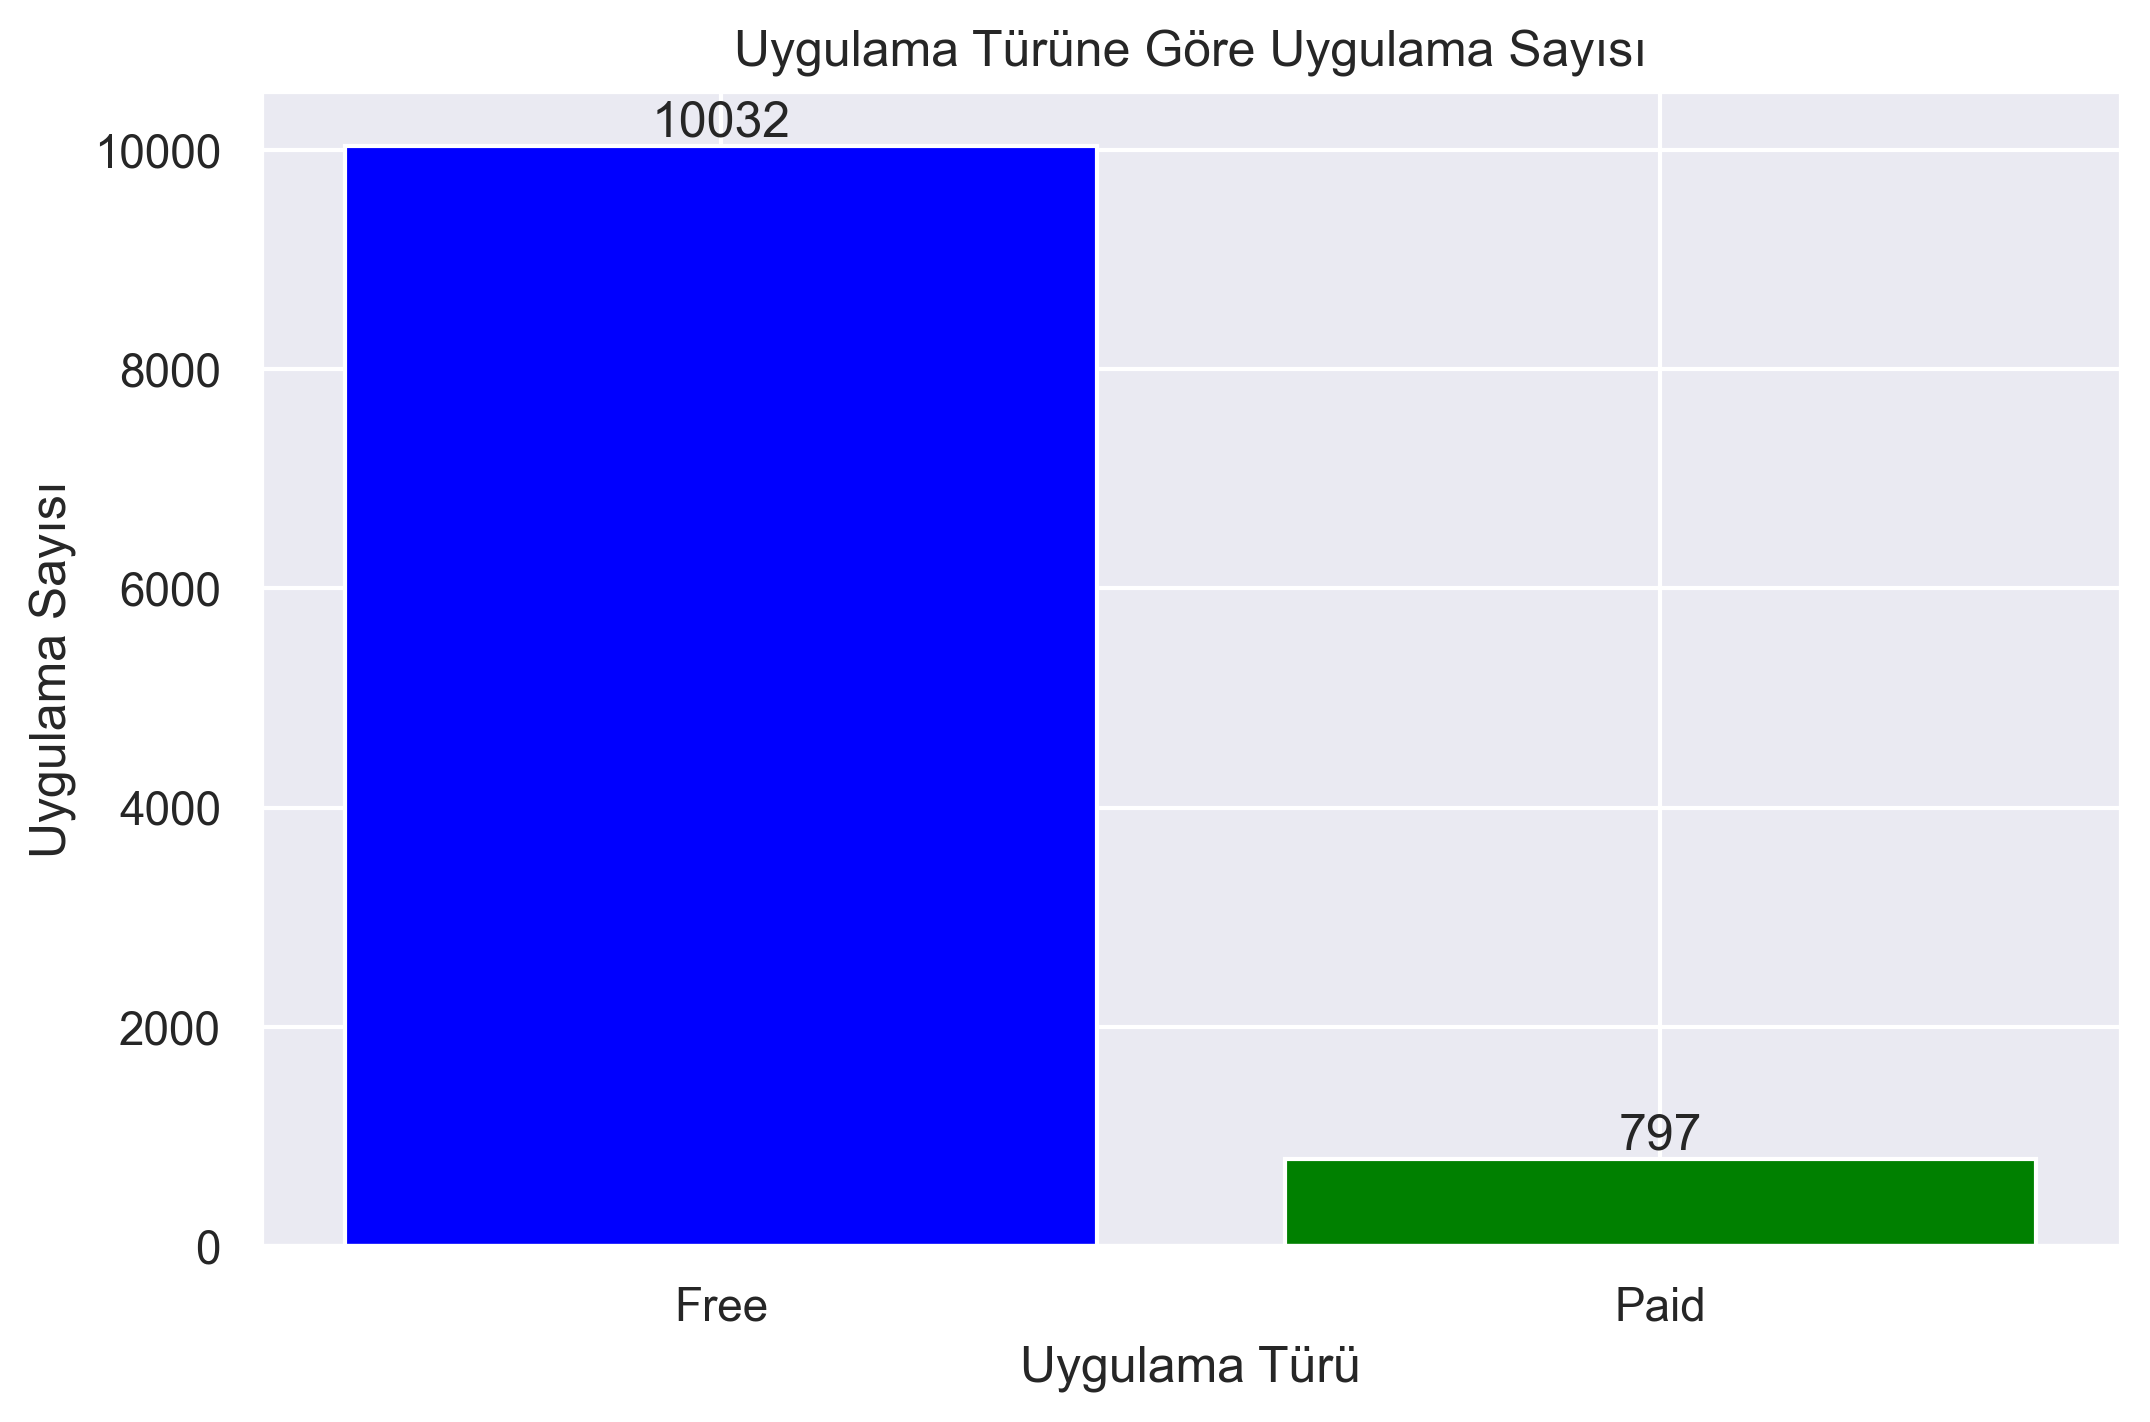

In [57]:
plt.figure(figsize=(8, 5))  # Grafik boyutunu ayarla
bars = plt.bar(type_counts.index, type_counts.values, color=['blue', 'green'])  # "bars" değişkenine atama yap

# Eksen etiketleri ve başlık
plt.xlabel('Uygulama Türü')
plt.ylabel('Uygulama Sayısı')
plt.title('Uygulama Türüne Göre Uygulama Sayısı')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
    
plt.show()

## <font color='green'> <b>Box plot for the rating column</b><font color='black'> 

Type sütunundaki her bir benzersiz değer ("Free" ve "Paid") için Rating değerlerinin bir box plot'ını çiziyoruz.

**plt.figure(figsize=(15, 10)):** Bu satır, oluşturulacak grafik için boyutu 15x10 olarak ayarlar.

**sns.boxplot(...):** Bu satır, seaborn kütüphanesini kullanarak box plot'u çizer. palette parametresi ile "Free" için mavi ("blue") ve "Paid" için yeşil ("green") renkler ayarlanmıştır.

**plt.xlabel('Uygulama Türü'), plt.ylabel('Rating'), plt.title('Uygulama Türüne Göre Rating Dağılımı'):** Bu satırlar, x ve y eksenlerine etiket ekler ve grafiğe bir başlık verir.

**plt.show():** Bu satır, grafiği gösterir.

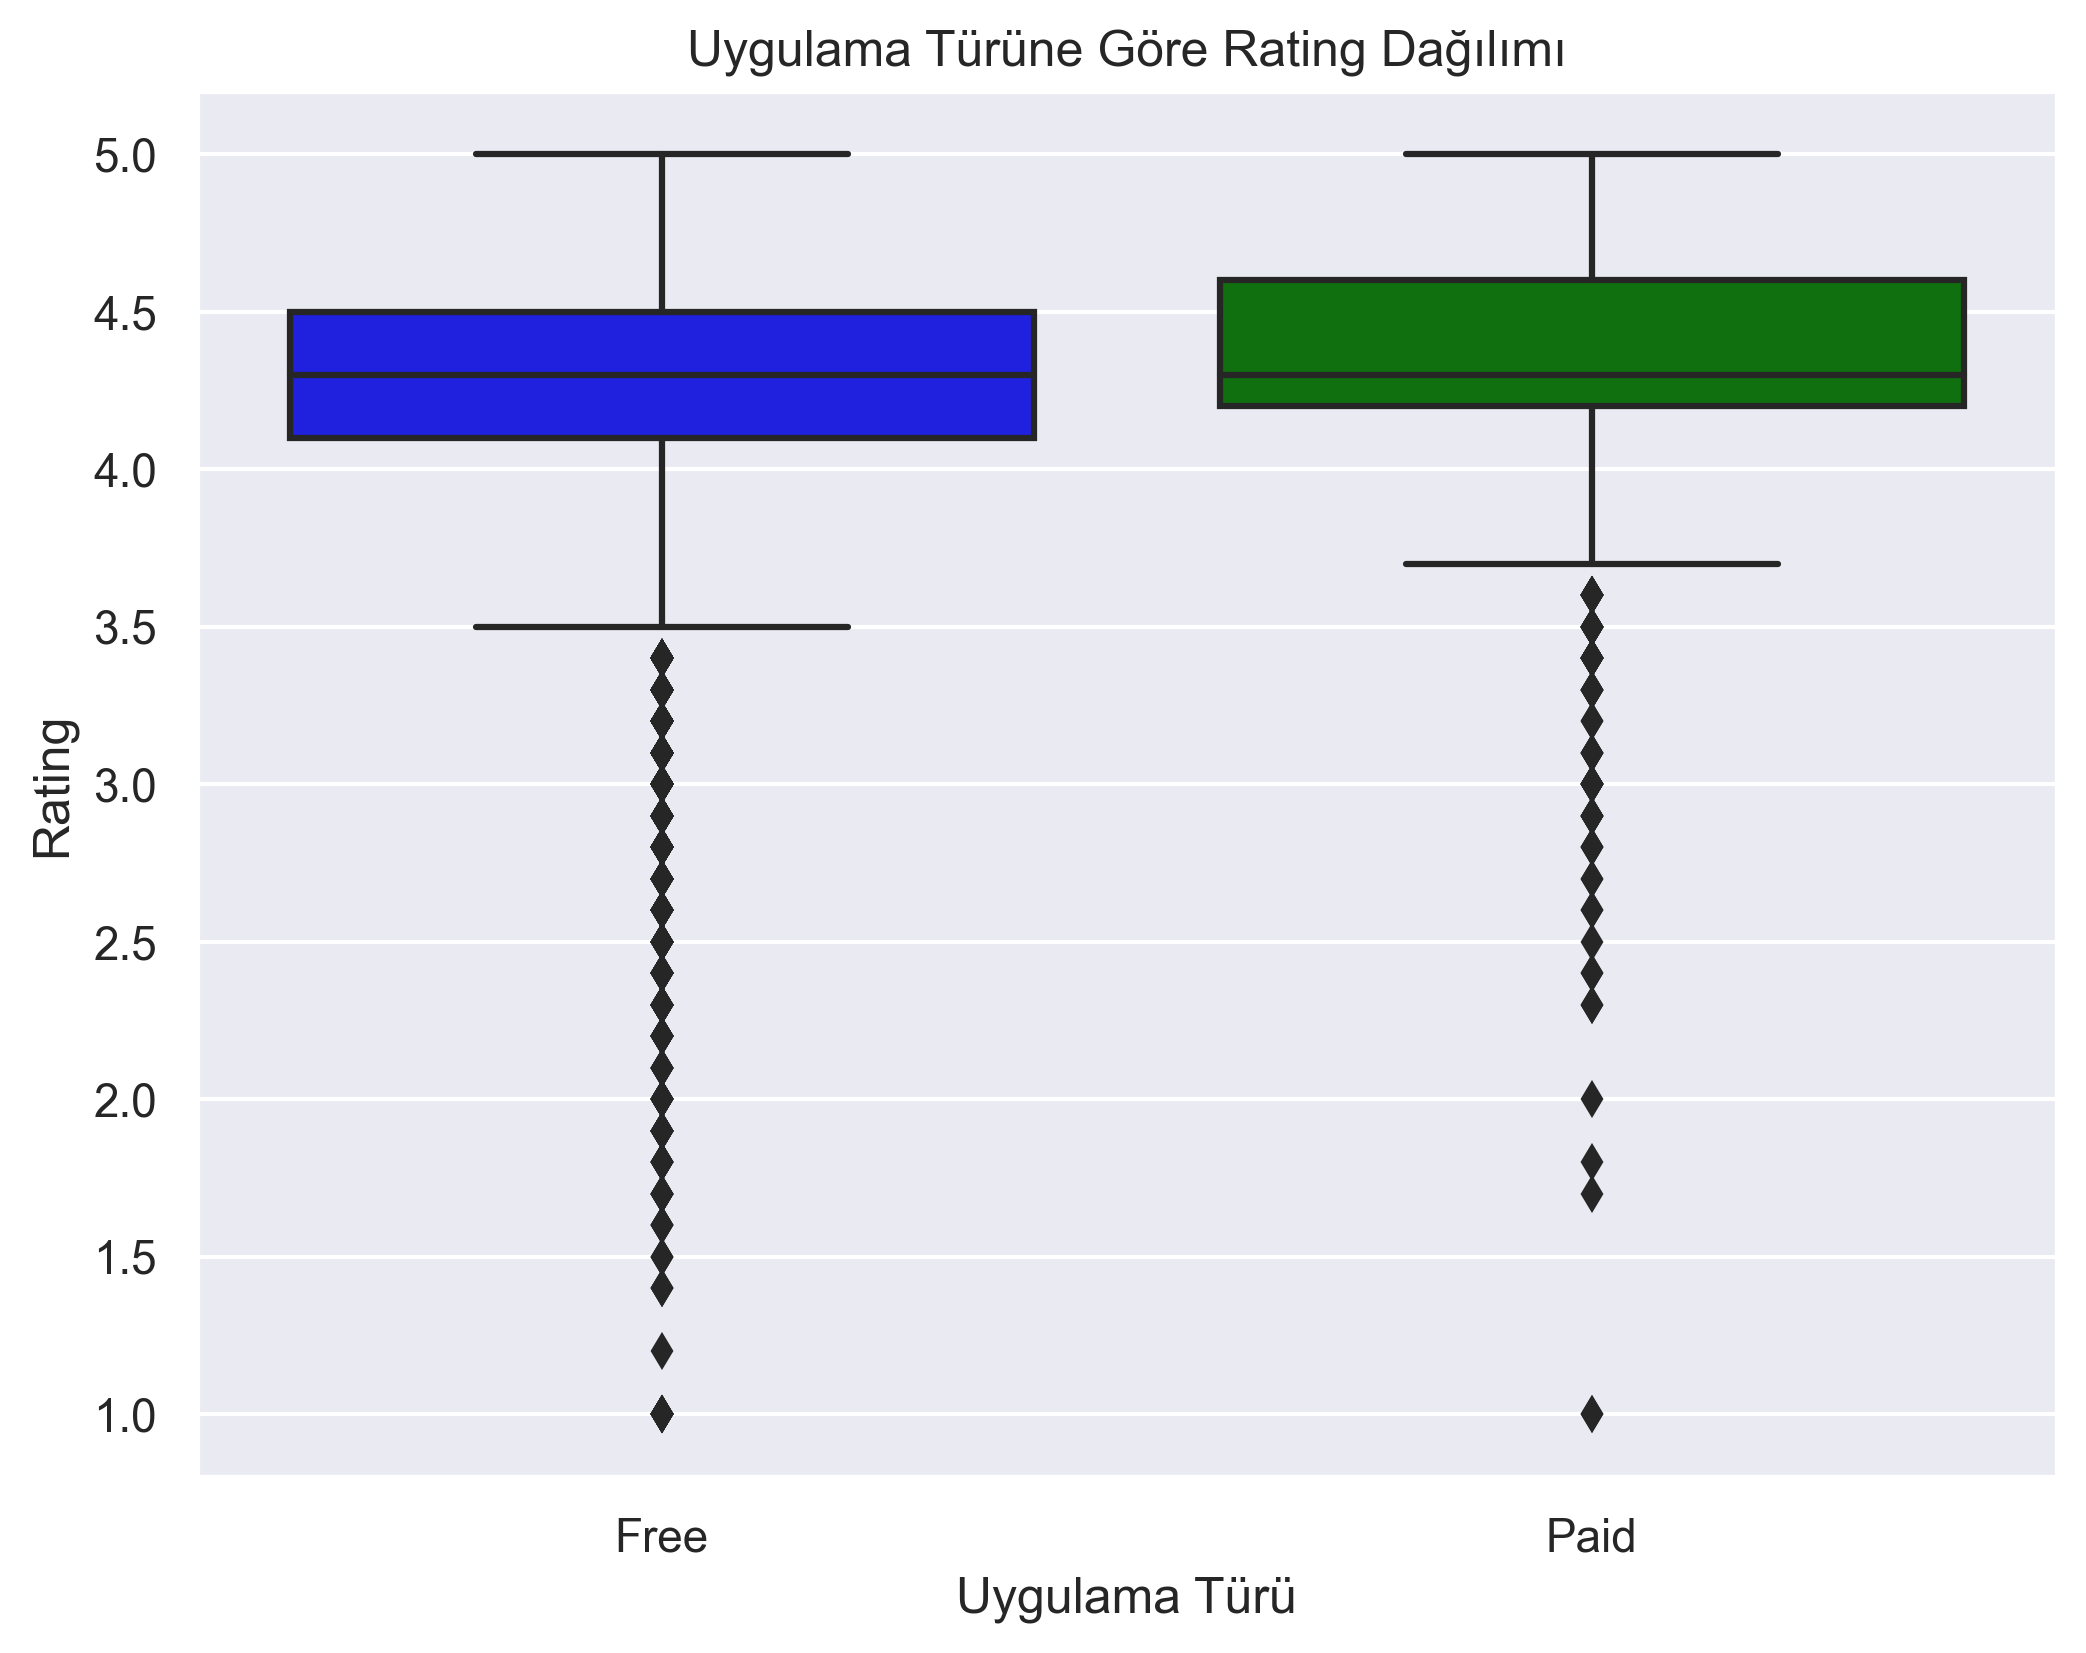

In [58]:
# Grafik boyutunu ayarla
plt.figure(figsize=(8, 6))

# Seaborn kütüphanesi ile box plot çiz ve renkleri ayarla
sns.boxplot(x='Type', y='Rating', data=df, palette={"Free": "blue", "Paid": "green"})

# Eksen etiketleri ve başlık
plt.xlabel('Uygulama Türü')
plt.ylabel('Rating')
plt.title('Uygulama Türüne Göre Rating Dağılımı')

# Göster
plt.show()

**Alt yatay çizgi (whisker) = Minimum (En Düşük Değer):** Veri setindeki en düşük değeri temsil eder. Ancak, bu çizgi aykırı değerleri (outliers) göz ardı eder.

**Üst yatay çizgi (whisker) = Maksimum (En Yüksek Değer):** Veri setindeki en yüksek değeri temsil eder. Ancak, bu çizgi de aykırı değerleri göz ardı eder.

**Kutunun alt kenarı = İlk Çeyrek (Q1):** Veri setinin ilk çeyreğini (ilk 25%) temsil eder.

**Kutunun üst kenarı = Üçüncü Çeyrek (Q3):** Veri setinin üçüncü çeyreğini (ilk 75%) temsil eder.

**Kutu içindeki yatay çizgi = Median (Q2):** Veri setinin medyanını (ortanca değerini) temsil eder.

- **IQR (Interquartile Range):** İlk ve üçüncü çeyrekler arasındaki fark, yani kutunun yüksekliği. IQR, veri dağılımının ne kadar yaygın olduğunu gösterir.

- **Aykırı Değerler (Outliers):** Üst ve alt yatay çizgilerin dışında kalan noktalar, aykırı değerleri temsil eder.

- **Kutu (Box):** İlk çeyrek (Q1) ve üçüncü çeyrek (Q3) arasındaki alanı temsil eder ve veri setinin merkezi dağılımını gösterir.

Bu grafik, ücretsiz ve ücretli uygulamaların rating dağılımlarını karşılaştırmanıza olanak tanır. Örneğin, ücretsiz uygulamaların rating'leri genellikle daha mı yüksek, yoksa ücretli uygulamalar mı daha yüksek puan alıyor, gibi sorulara cevap arayabilirsiniz. Ayrıca, aykırı değerlerin varlığı da gözlemlenebilir.

**NOT**

Eğer aklınıza whisker dışında olan değerlerin neden minimum veya maksimum olarak kabul edilmediği gibi bir soru gelirse bunun bilgisi için aşağıdaki not size cevap olacaktır.

- Box plot'ta gösterilen "minimum" ve "maksimum" değerler, aslında aykırı değerleri (outliers) göz ardı eden "whisker"lar olarak adlandırılır. Yani, bu çizgiler veri setinin çoğunu kapsayan, ancak aykırı değerleri hariç tutan değer aralığını gösterir.

- Bu "whisker"lar genellikle IQR (interquartile range, yani Q3 - Q1) kullanılarak hesaplanır. Örneğin, alt whisker genellikle "Q1 - 1.5 * IQR" formülü ile ve üst whisker "Q3 + 1.5 * IQR" formülü ile hesaplanır. Bu formüller, veri dağılımının genel yapısını yansıtmak için tasarlanmıştır ve aykırı değerleri dışarıda bırakmayı amaçlar.

- Bu nedenle, box plot'ta gösterilen "minimum" ve "maksimum" değerler, tüm veri setinin en düşük ve en yüksek değerleri değildir. Bunun yerine, bu değerler veri setinin çoğunu temsil eden ve aykırı değerleri hariç tutan bir aralığı gösterir.

- box plot veri setinin "tipik" bir aralığını göstermek için tasarlanmıştır, ancak aykırı değerleri de göz önünde bulundurur. Yani, box plot hem merkezi eğilimi (medyan, çeyrekler) hem de veri dağılımının yayılımını (IQR, aykırı değerler) bir arada gösterir.

## <font color='green'><b> Kategori sayısı ile Rating sütunu için Bar grafik çizimi</b><font color='black'> 

Veri kümesinde bulunan farklı "Rating" (Puan) kategorilerinin ne kadar sık olduğunu gösteriyoruz. 

**plt.figure(figsize=(15, 10)):** Matplotlib kütüphanesini kullanarak oluşturulacak grafik için boyutu ayarlar. Genişlik 15 birim, yükseklik 10 birim olarak belirlenmiştir.

**sns.countplot(x="Rating", data=df):** Seaborn kütüphanesinin countplot fonksiyonu ile "Rating" sütunundaki değerlerin sayısını gösteren bir dikey bar plot çizer. x parametresi ile hangi sütunun kullanılacağı belirlenir, data parametresi ile de veri çerçevesi belirlenir.

**plt.title("Puan Kategorileri ve Sayıları"):** Grafik başlığını ayarlar.

**plt.xlabel("Rating Kategorileri") ve plt.ylabel("Uygulama Sayısı"):** X ve Y eksenlerinin etiketlerini ayarlar.

**plt.show():** Grafiği ekrana çizer.

- Hangi puan kategorisi en çok veya en az gözleme sahiptir?

- Puan dağılımı nasıldır? (örneğin, çoğu uygulama yüksek puanlı mı, düşük puanlı mı?)

- Puan kategorileri arasında belirgin bir dengesizlik var mı?

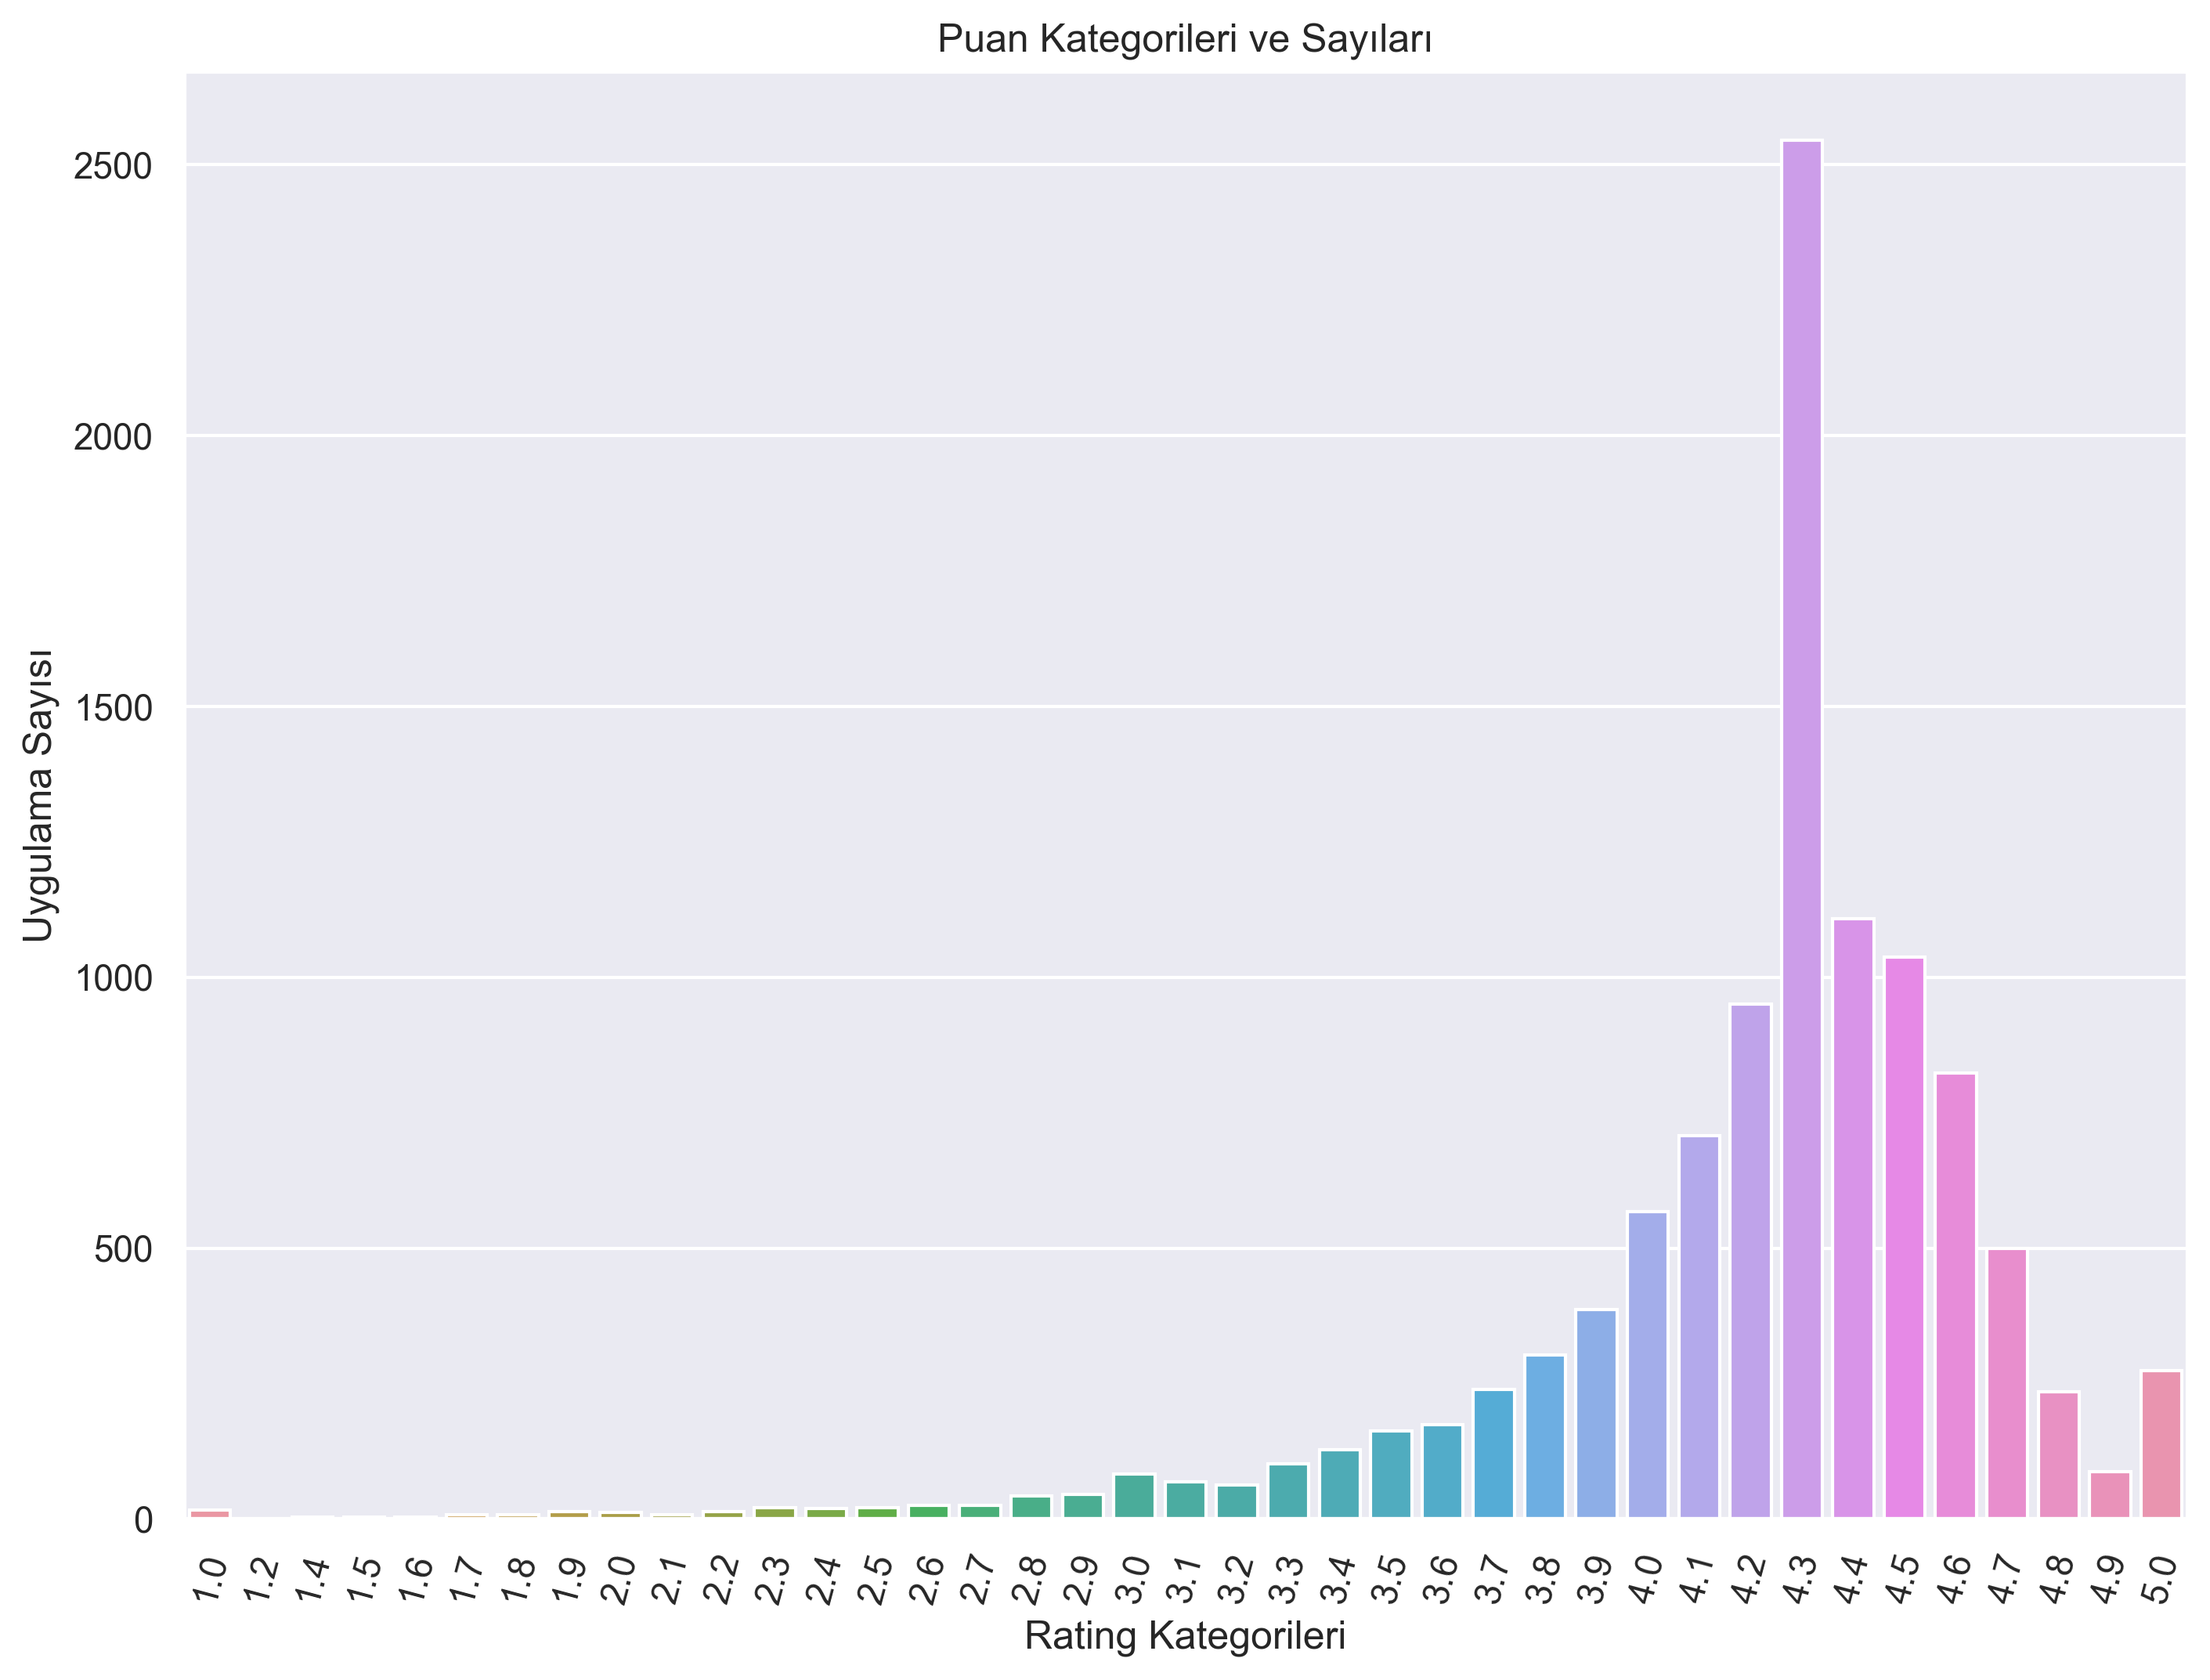

In [59]:
# Grafik boyutunu ayarla
plt.figure(figsize=(11,8))

# Seaborn ile dikey bar plot çiz
sns.countplot(x="Rating", data=df) #Sıralamak için , order=df['Rating'].value_counts().sort_index().index

# Grafik başlığı
plt.title("Puan Kategorileri ve Sayıları")

# Eksen etiketleri
plt.xlabel("Rating Kategorileri")
plt.ylabel("Uygulama Sayısı")

plt.xticks(rotation = 75) 

# Grafik gösterimi
plt.show()

Veri kümesindeki uygulamaların "Content Rating" (İçerik Derecelendirmesi) kategorilerine göre dağılımını gösteriyoruz. 

**plt.figure(figsize=(15, 10)):** Grafik boyutunu ayarlar.

**sns.countplot(y="Content_Rating", data=df, order = df['Content_Rating'].value_counts().index):** "Content_Rating" sütunundaki değerlerin sayısını gösteren bir yatay bar plot çizer. y parametresi ile hangi sütunun kullanılacağı belirlenir. order parametresi ile bar'lar en yüksek sayıdan en düşüğe doğru sıralanır.

**plt.title("İçerik Derecelendirmeleri ve Sayıları"):** Grafik başlığını ayarlar.

**plt.xlabel("Uygulama Sayısı") ve plt.ylabel("Content Rating"):** X ve Y eksenlerinin etiketlerini ayarlar.

**plt.show():** Grafiki ekrana çizer.

- Hangi içerik derecelendirmesi en yaygın veya en nadir?

- İçerik derecelendirmeleri arasında nasıl bir dağılım var?

- Belirli bir yaş grubu veya hedef kitle için ne kadar uygulama mevcut?

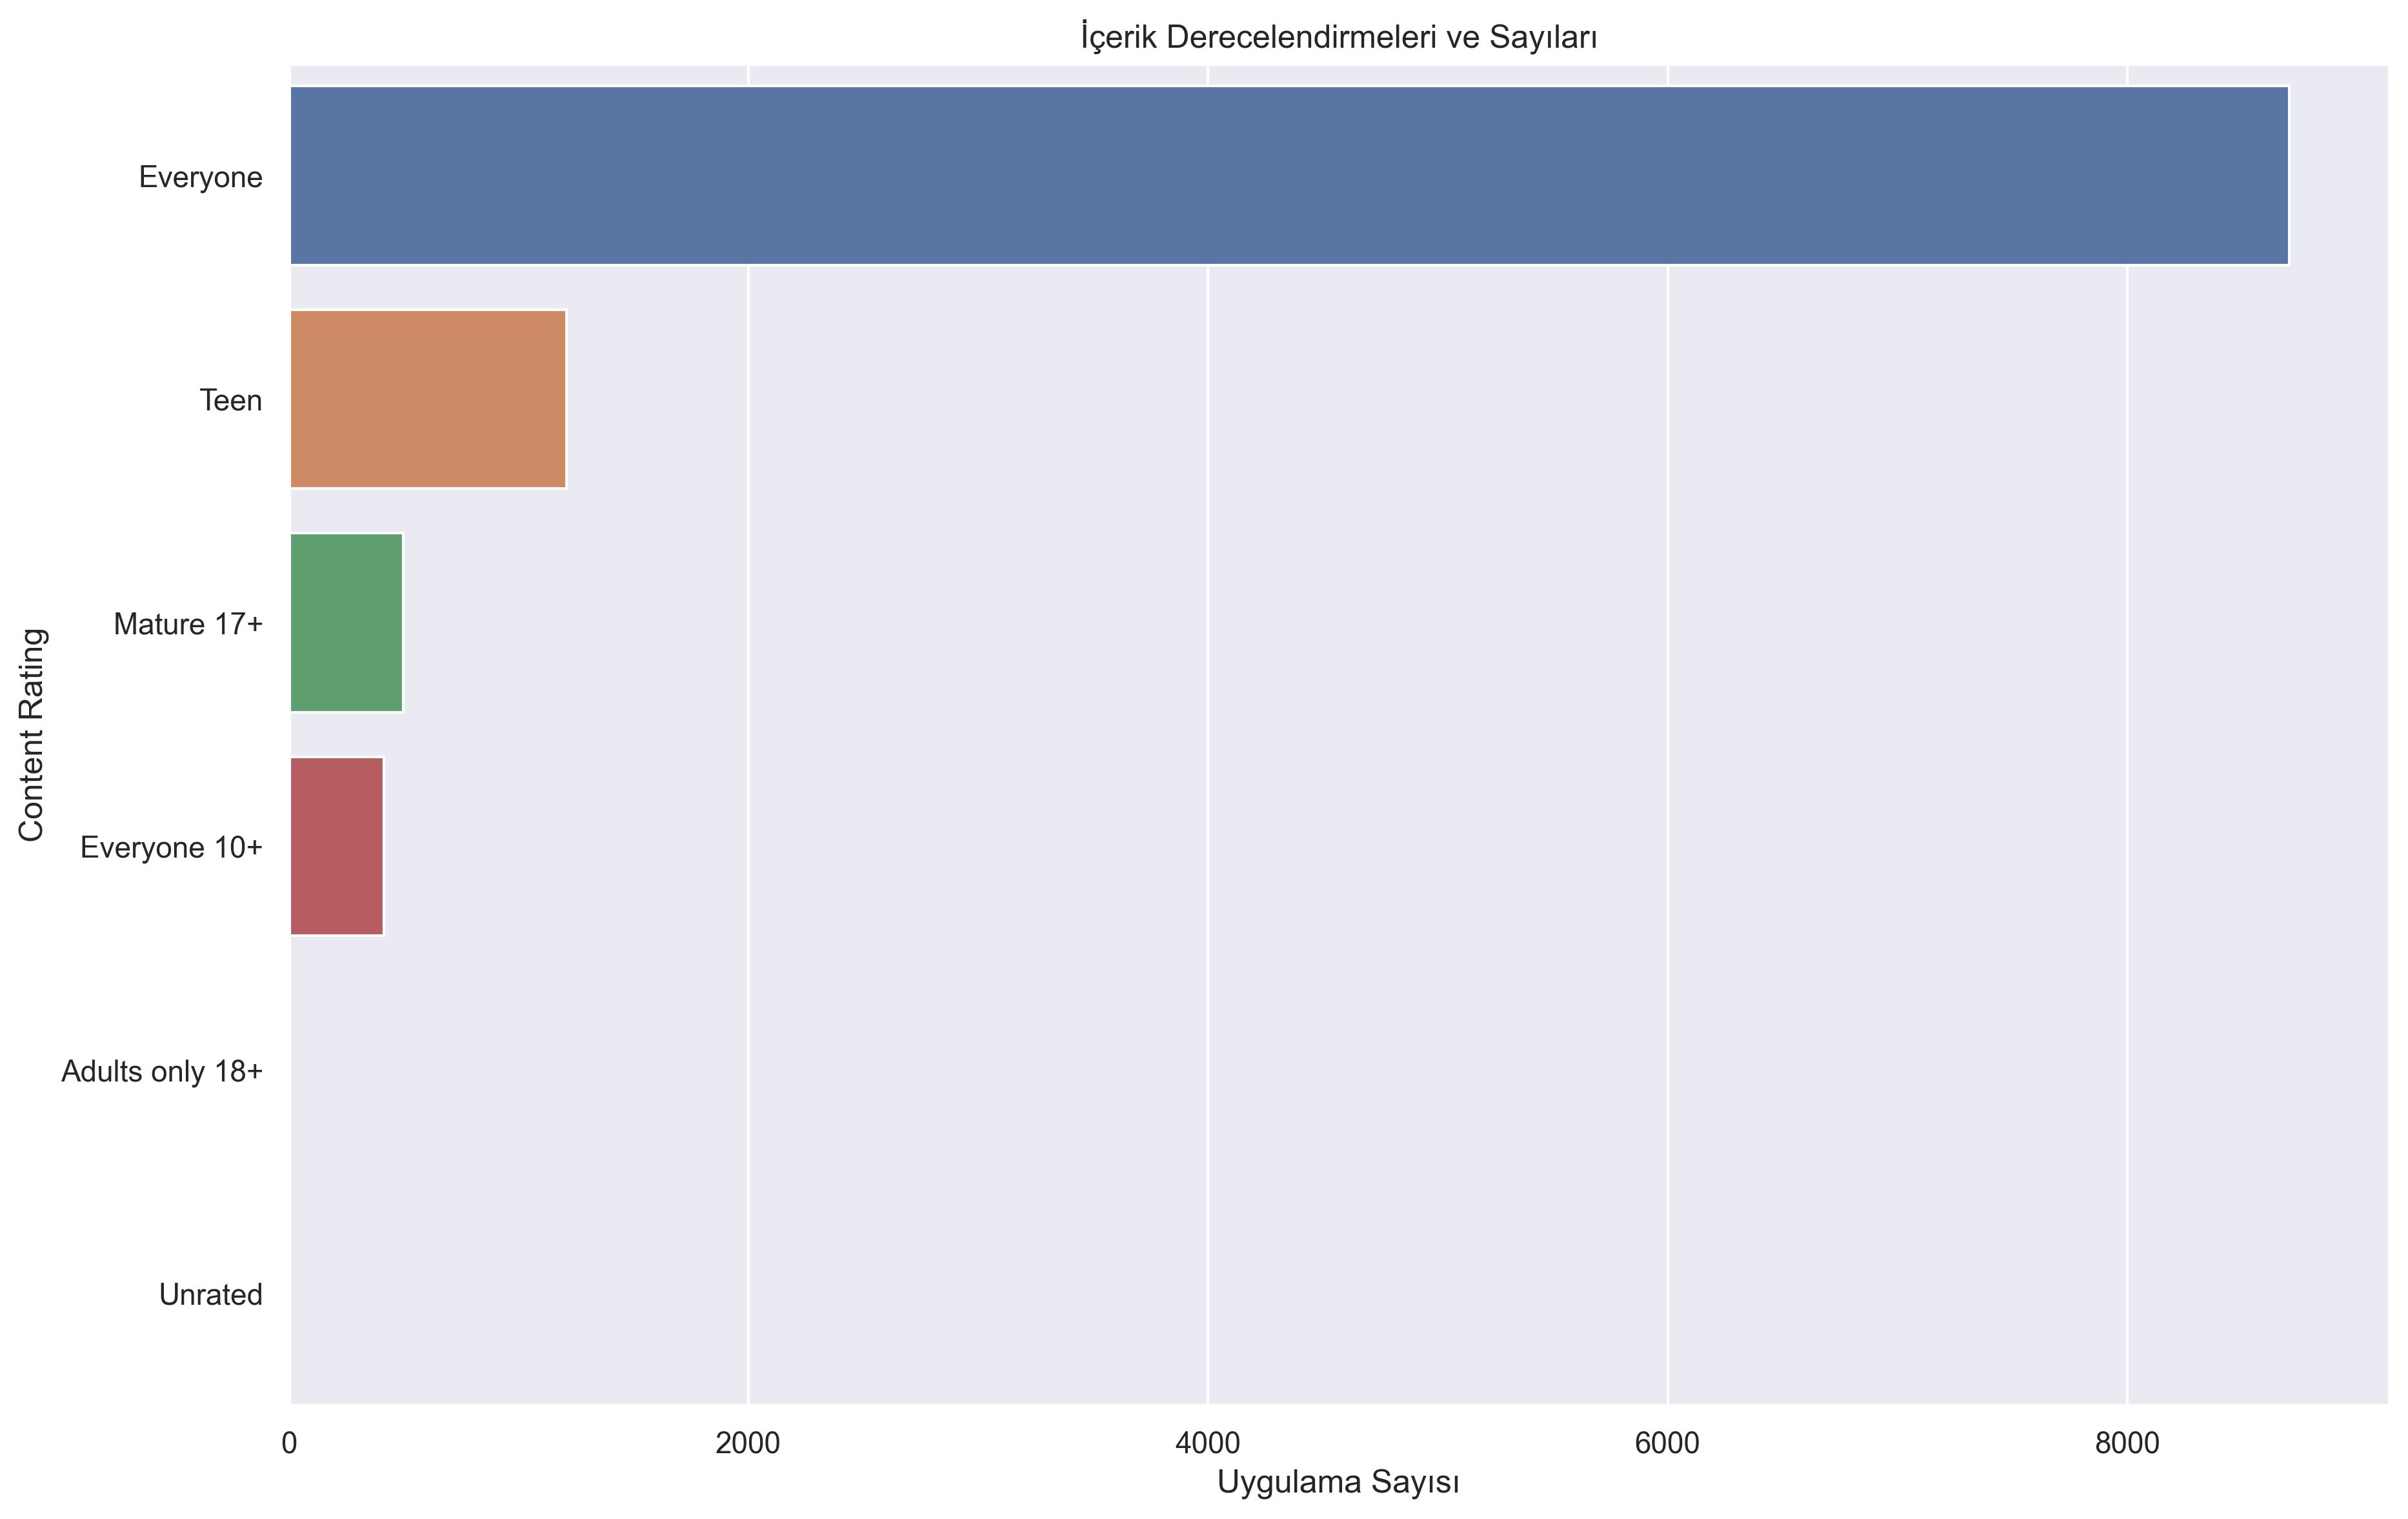

In [60]:
# Grafik boyutunu ayarla
plt.figure(figsize=(14, 9))

# Seaborn ile yatay bar plot çiz
sns.countplot(y="Content_Rating", data=df, order = df['Content_Rating'].value_counts().index)

# Grafik başlığı
plt.title("İçerik Derecelendirmeleri ve Sayıları")

# Eksen etiketleri
plt.xlabel("Uygulama Sayısı")
plt.ylabel("Content Rating")

# Grafik gösterimi
plt.show()

## <font color='green'> <b>Content rating ve Rating için Box Plot grafiği</b><font color='black'>

Farklı "Content Rating" (İçerik Derecelendirmesi) kategorilerine sahip Android uygulamalarının kullanıcı puanları ("Rating") dağılımını gösteriyoruz.

**plt.figure(figsize=(15, 10)):** Grafik boyutunu ayarlar. Genişlik 15 birim, yükseklik 10 birim olarak belirlenmiştir. (Bu satır kodda eksik, eğer eklemek isterseniz.)

**sns.boxplot(x = "Content_Rating", y = "Rating", data = df):** Seaborn kütüphanesinin boxplot fonksiyonu ile "Content_Rating" sütunundaki kategorilere göre "Rating" sütununun dağılımını gösteren bir box plot çizer. x ve y parametreleri ile hangi sütunların kullanılacağı belirlenir, data parametresi ile de veri çerçevesi belirlenir.

**plt.title("The content rating & rating", size=20):** Grafik başlığını ve başlık boyutunu ayarlar.

- Her bir içerik derecelendirmesi kategorisinin puan dağılımı nasıldır?

- Hangi içerik derecelendirmesi kategorisinin ortalama puanı en yüksek veya en düşüktür?

- İçerik derecelendirmesi kategorileri arasında puan dağılımı açısından belirgin farklar var mı?

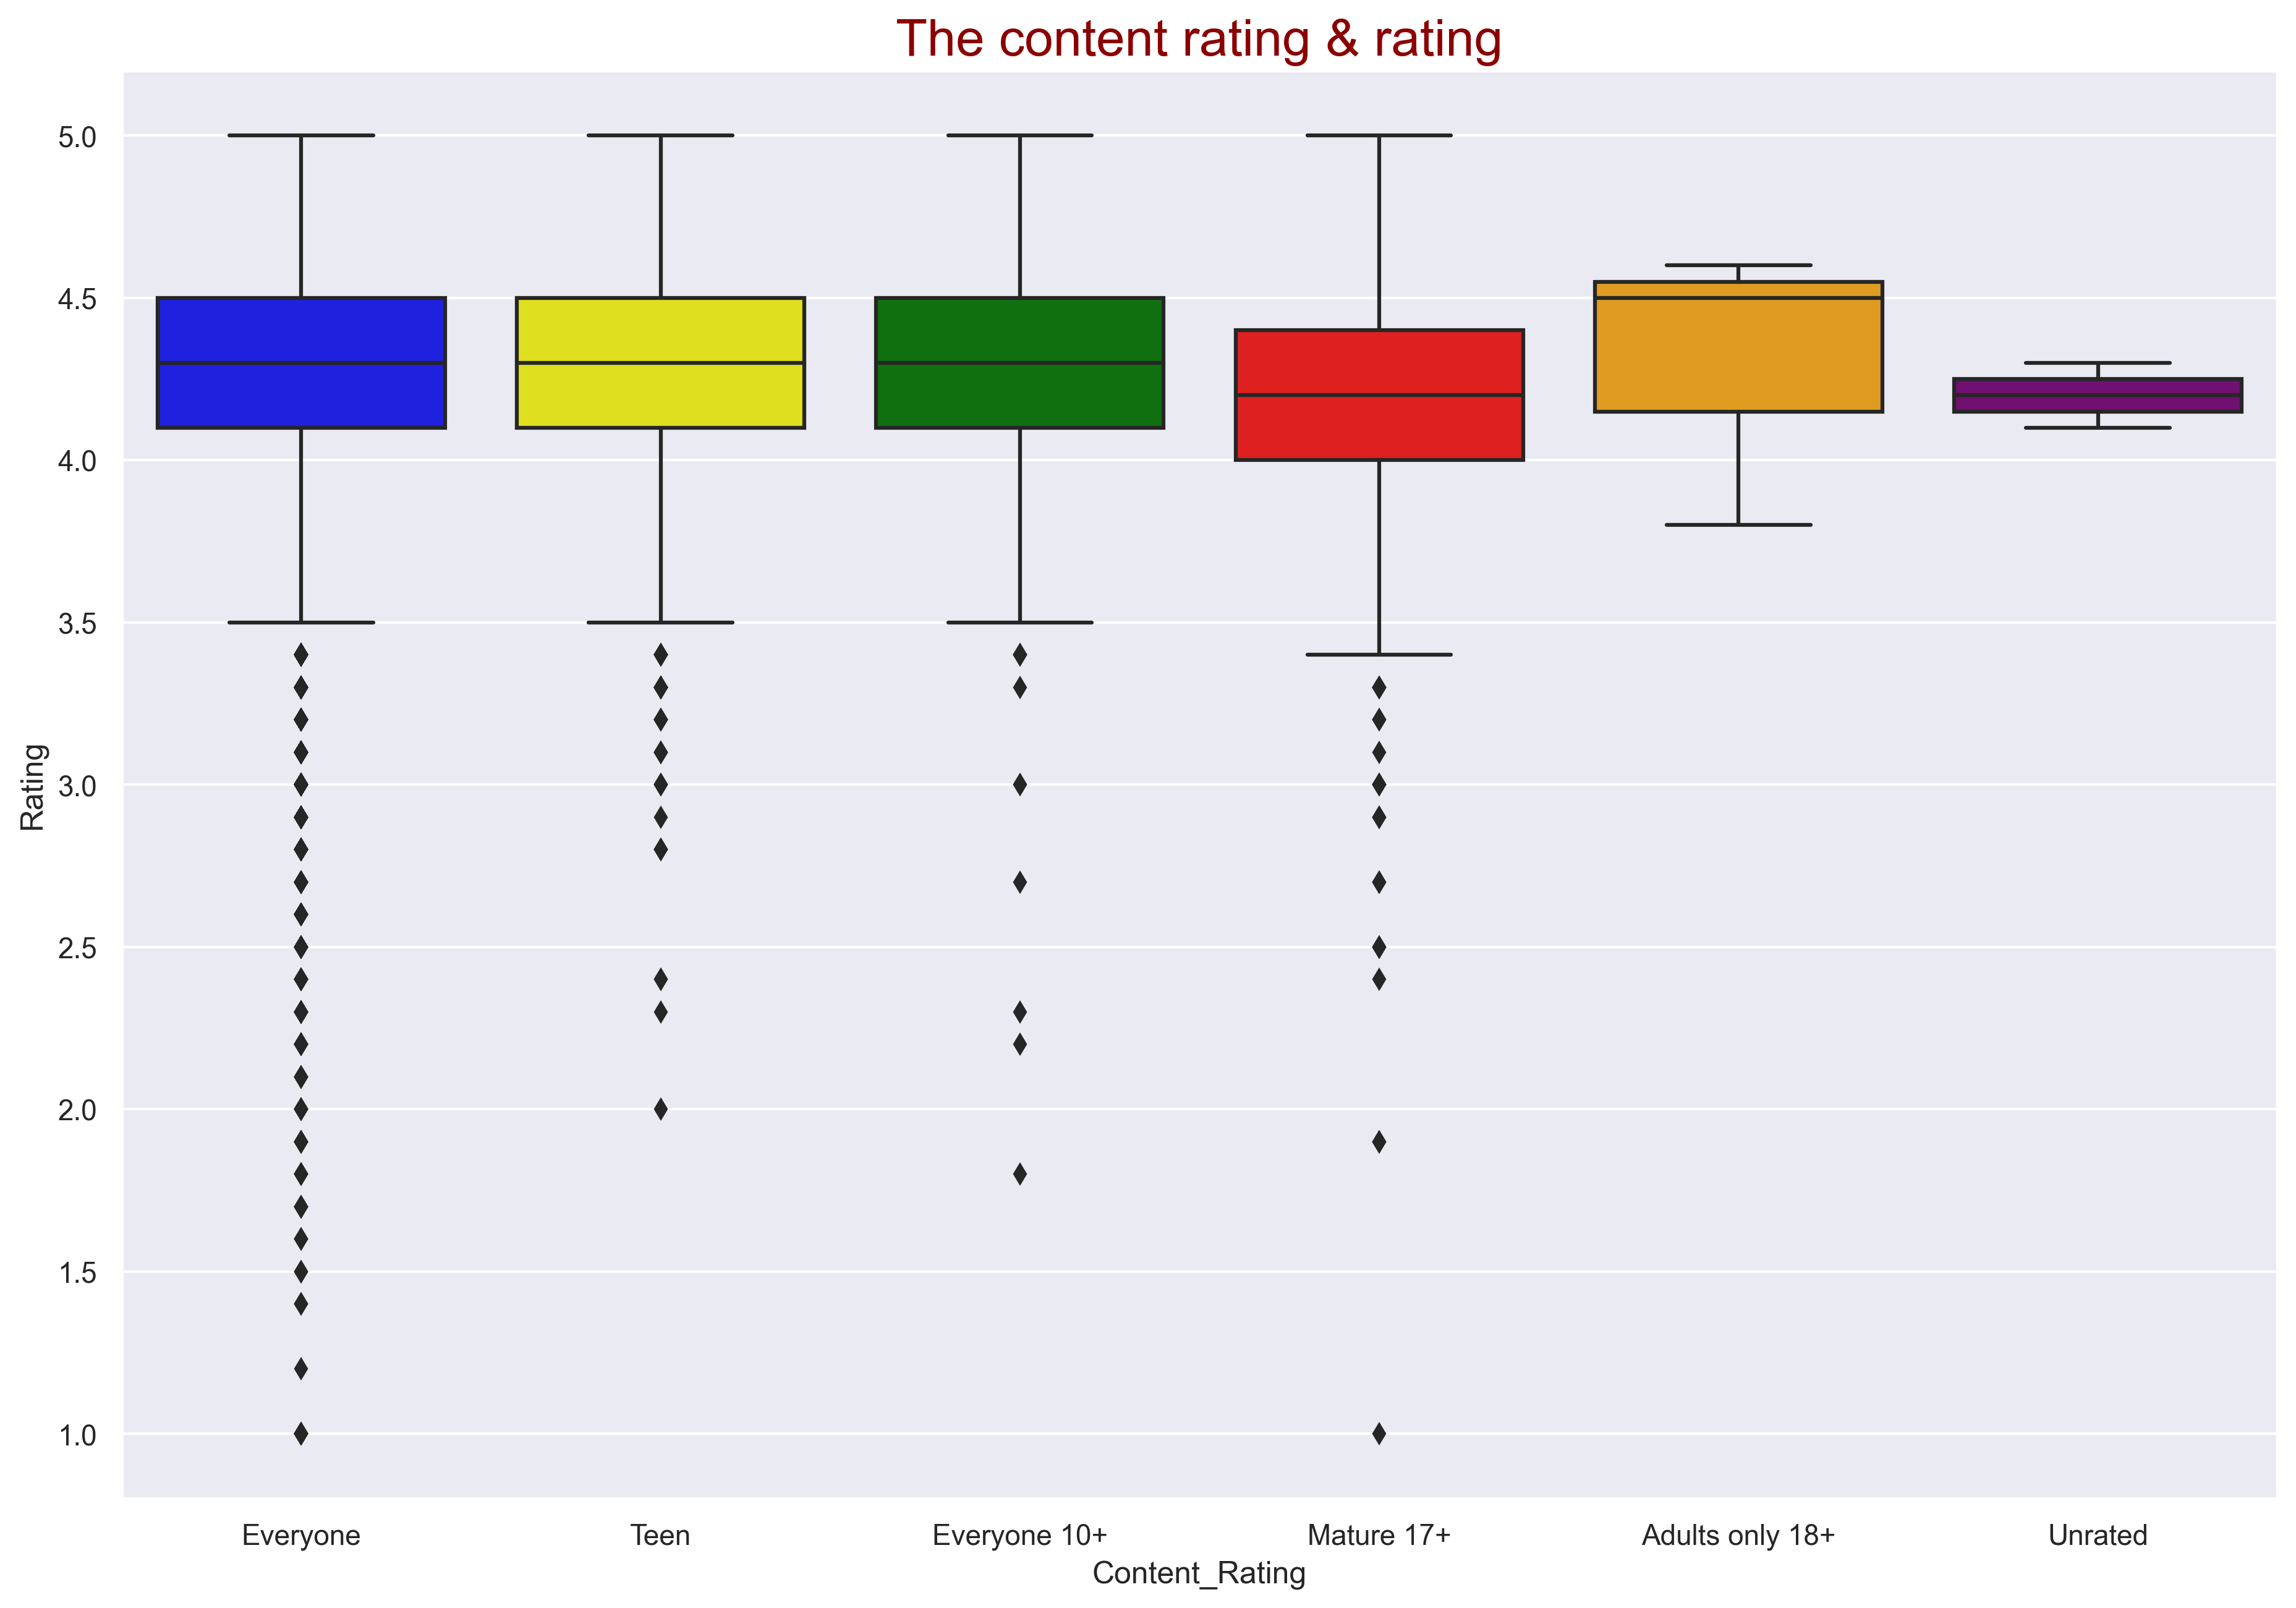

In [61]:
# Grafik boyutunu ayarla
plt.figure(figsize=(15, 10))

# Seaborn ile box plot çiz
# 'x' ve 'y' parametreleri ile hangi sütunların kullanılacağı belirlenir
# 'data' parametresi ile de veri çerçevesi belirlenir
# 'palette' parametresi ile her bir "Content_Rating" kategorisi için renkler belirlenir
sns.boxplot(x="Content_Rating", y="Rating", data=df, palette={"Everyone": "blue", 
                                                              "Teen": "yellow", 
                                                              "Everyone 10+": "green",
                                                              "Mature 17+": "red",
                                                              "Adults only 18+": "orange",
                                                              "Unrated": "purple"})

# Grafik başlığı ve başlık özellikleri
# 'fontdict' parametresi ile başlık için bir sözlük belirlenir
# 'fontsize' anahtarı ile başlık boyutunu 20 olarak, 'color' anahtarı ile de başlık rengini 'darkred' olarak ayarlar
plt.title("The content rating & rating", fontdict={'fontsize': 20, 'color': 'darkred'})

# Grafik gösterimi
plt.show()

Gördüğünüz gibi, Rating Everyone, Teen ve Everyone 10+ için neredeyse aynı. 

Everyone'ın diğer kategorilere göre daha fazla aykırı (outlier) değeri var.

Mature 17+ en düşük ortalamaya sahipken Adults only 18+ kategorisinin reyting ortalaması diğerlerinden daha yüksektir.

## <font color='green'> <b>Kategori sayısı ile kategori sütunu için countplot</b><font color='black'>

**Kod Açıklaması**

**plt.figure(figsize=(15, 10)):** Matplotlib kütüphanesini kullanarak oluşturulacak grafik için boyutu ayarlar. Genişlik 15 birim, yükseklik 10 birim olarak belirlenmiştir.

**sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index):** Seaborn kütüphanesinin countplot fonksiyonu ile "Category" sütunundaki değerlerin sayısını gösteren bir yatay bar plot çizer. y parametresi ile hangi sütunun kullanılacağı belirlenir, data parametresi ile de veri çerçevesi belirlenir. order parametresi ile bar'lar en yüksek sayıdan en düşüğe doğru sıralanır.

**plt.title("Kategoriye Göre Uygulama Sayıları", fontdict={'fontsize': 20, 'color': 'darkred'}):** Grafik başlığını ve başlık boyutunu ayarlar. fontdict parametresi ile başlık için bir sözlük belirlenir. fontsize anahtarı ile başlık boyutunu 20 olarak, color anahtarı ile de başlık rengini 'darkred' olarak ayarlar.

**plt.xlabel("Uygulama Sayısı") ve plt.ylabel("Kategoriler"):** X ve Y eksenlerinin etiketlerini ayarlar.

**plt.show():** Grafiki ekrana çizer.

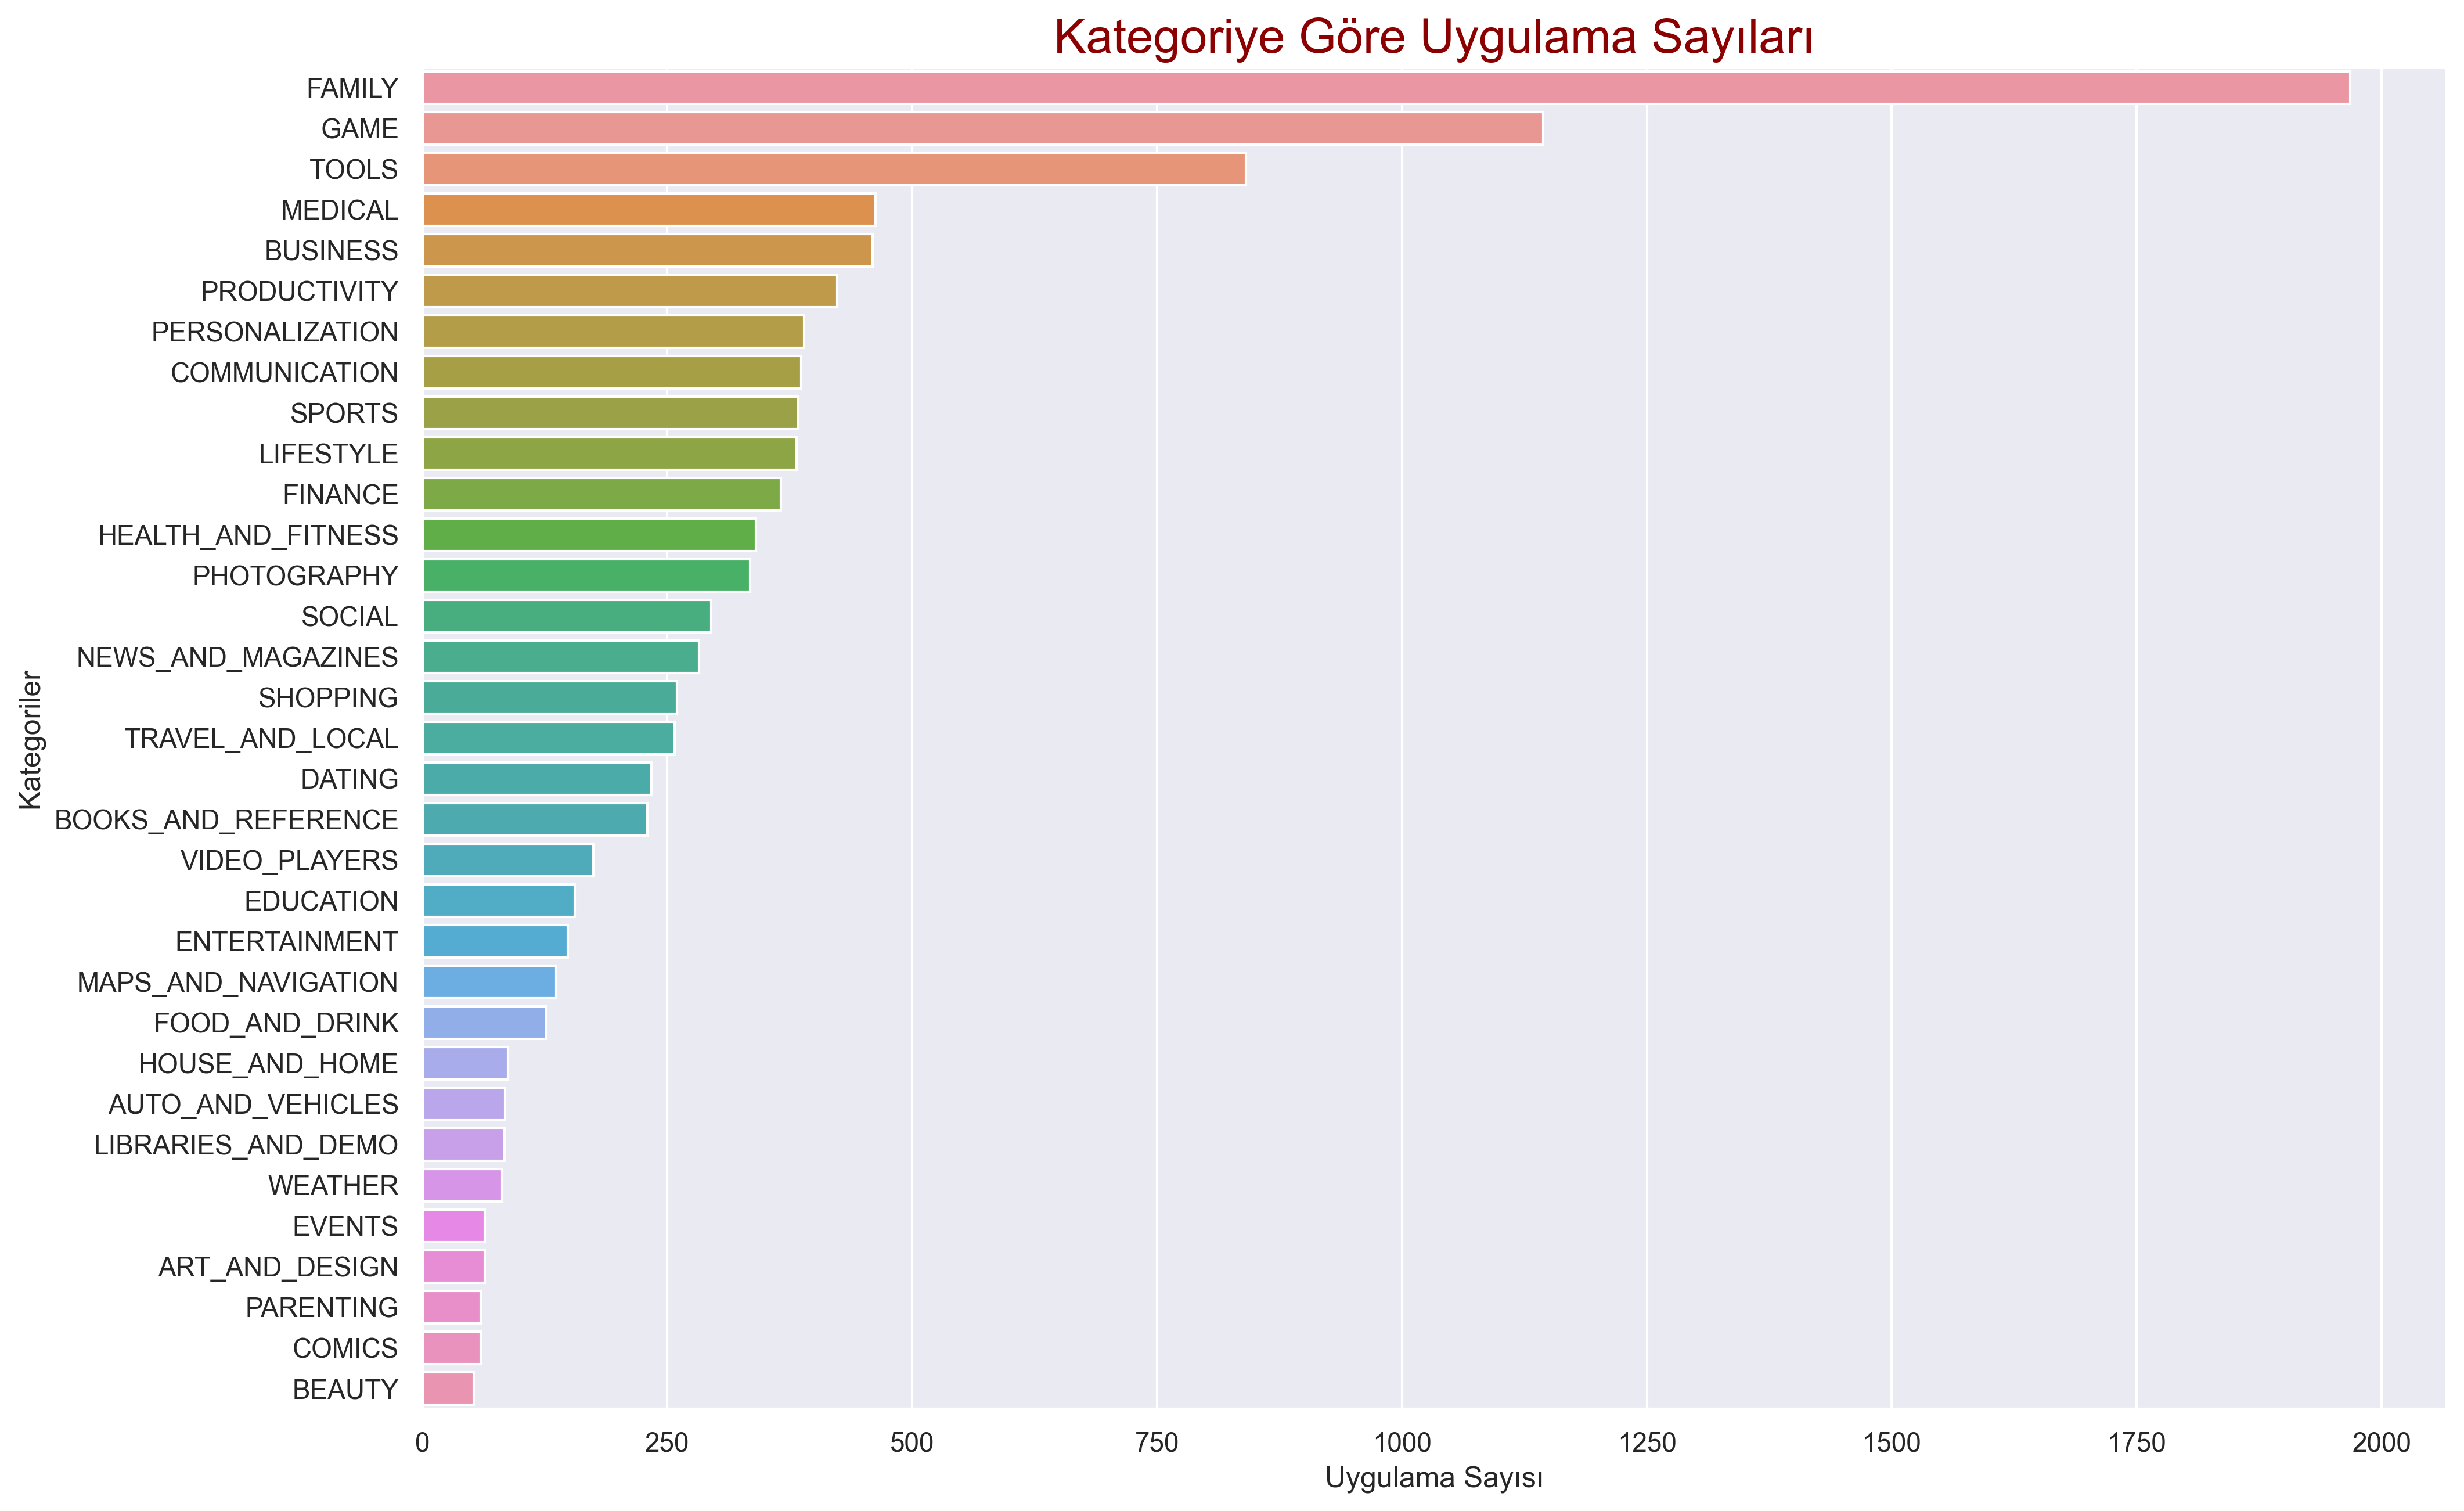

In [62]:
# Grafik boyutunu ayarla
plt.figure(figsize=(15, 10))

# Seaborn ile yatay bar plot çiz. y dersem y eksenini kullanacağından yatay bir bar plot çizecektir.
# 'y' parametresi ile hangi sütunun kullanılacağı belirlenir, 'data' parametresi ile de veri çerçevesi belirlenir
sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index)

# Grafik başlığı ve başlık özellikleri
plt.title("Kategoriye Göre Uygulama Sayıları", fontdict={'fontsize': 20, 'color': 'darkred'})

# Eksen etiketleri
plt.xlabel("Uygulama Sayısı")
plt.ylabel("Kategoriler")

# Grafik gösterimi
plt.show()


En çok uygulama Family (aile), sonra Game (oyun), sonra da Tools (araçlar) kategorisindedir.

## <font color='green'> <b>Scatter plot for the Reviews and Rating</b><font color='black'>

Android uygulamalarının kullanıcı puanlarının ("Rating") yorum sayılarına ("Reviews") göre nasıl dağıldığını gösteriyoruz.

**plt.figure(figsize=(15, 10)):** Matplotlib ile oluşturulacak grafik için boyutları ayarlar. Bu durumda, grafik boyutu 15x10 birim olacaktır.

**sns.scatterplot(x='Reviews', y='Rating', data=df):** Seaborn'un scatterplot fonksiyonu ile "Reviews" (Yorum Sayısı) ve "Rating" (Puan) sütunları arasında bir saçılım grafiği çizer.

**x='Reviews':** X ekseninde gösterilecek veri sütunu ("Reviews").
**y='Rating':** Y ekseninde gösterilecek veri sütunu ("Rating").
**data=df:** Kaynak veri çerçevesi.
**plt.title("Yorum Sayısı ve Puan İlişkisi", fontdict={'fontsize': 20, 'color': 'darkred'}):** Grafik için bir başlık ekler ve başlığın font boyutu ile rengini ayarlar.

**plt.xlabel("Yorum Sayısı"), plt.ylabel("Puan"):** X ve Y eksenleri için etiketler ekler.

**plt.show():** Oluşturulan grafiki ekranda gösterir.

- Daha fazla yorum alan uygulamaların puanları genellikle daha mı yüksektir, yoksa daha mı düşüktür?
- Yorum sayısı ve puan arasında belirgin bir ilişki var mı?
- Farklı "Content Rating" (İçerik Derecelendirmesi) kategorilerine ait uygulamaların puanları ve yorum sayıları arasında farklılıklar var mı?

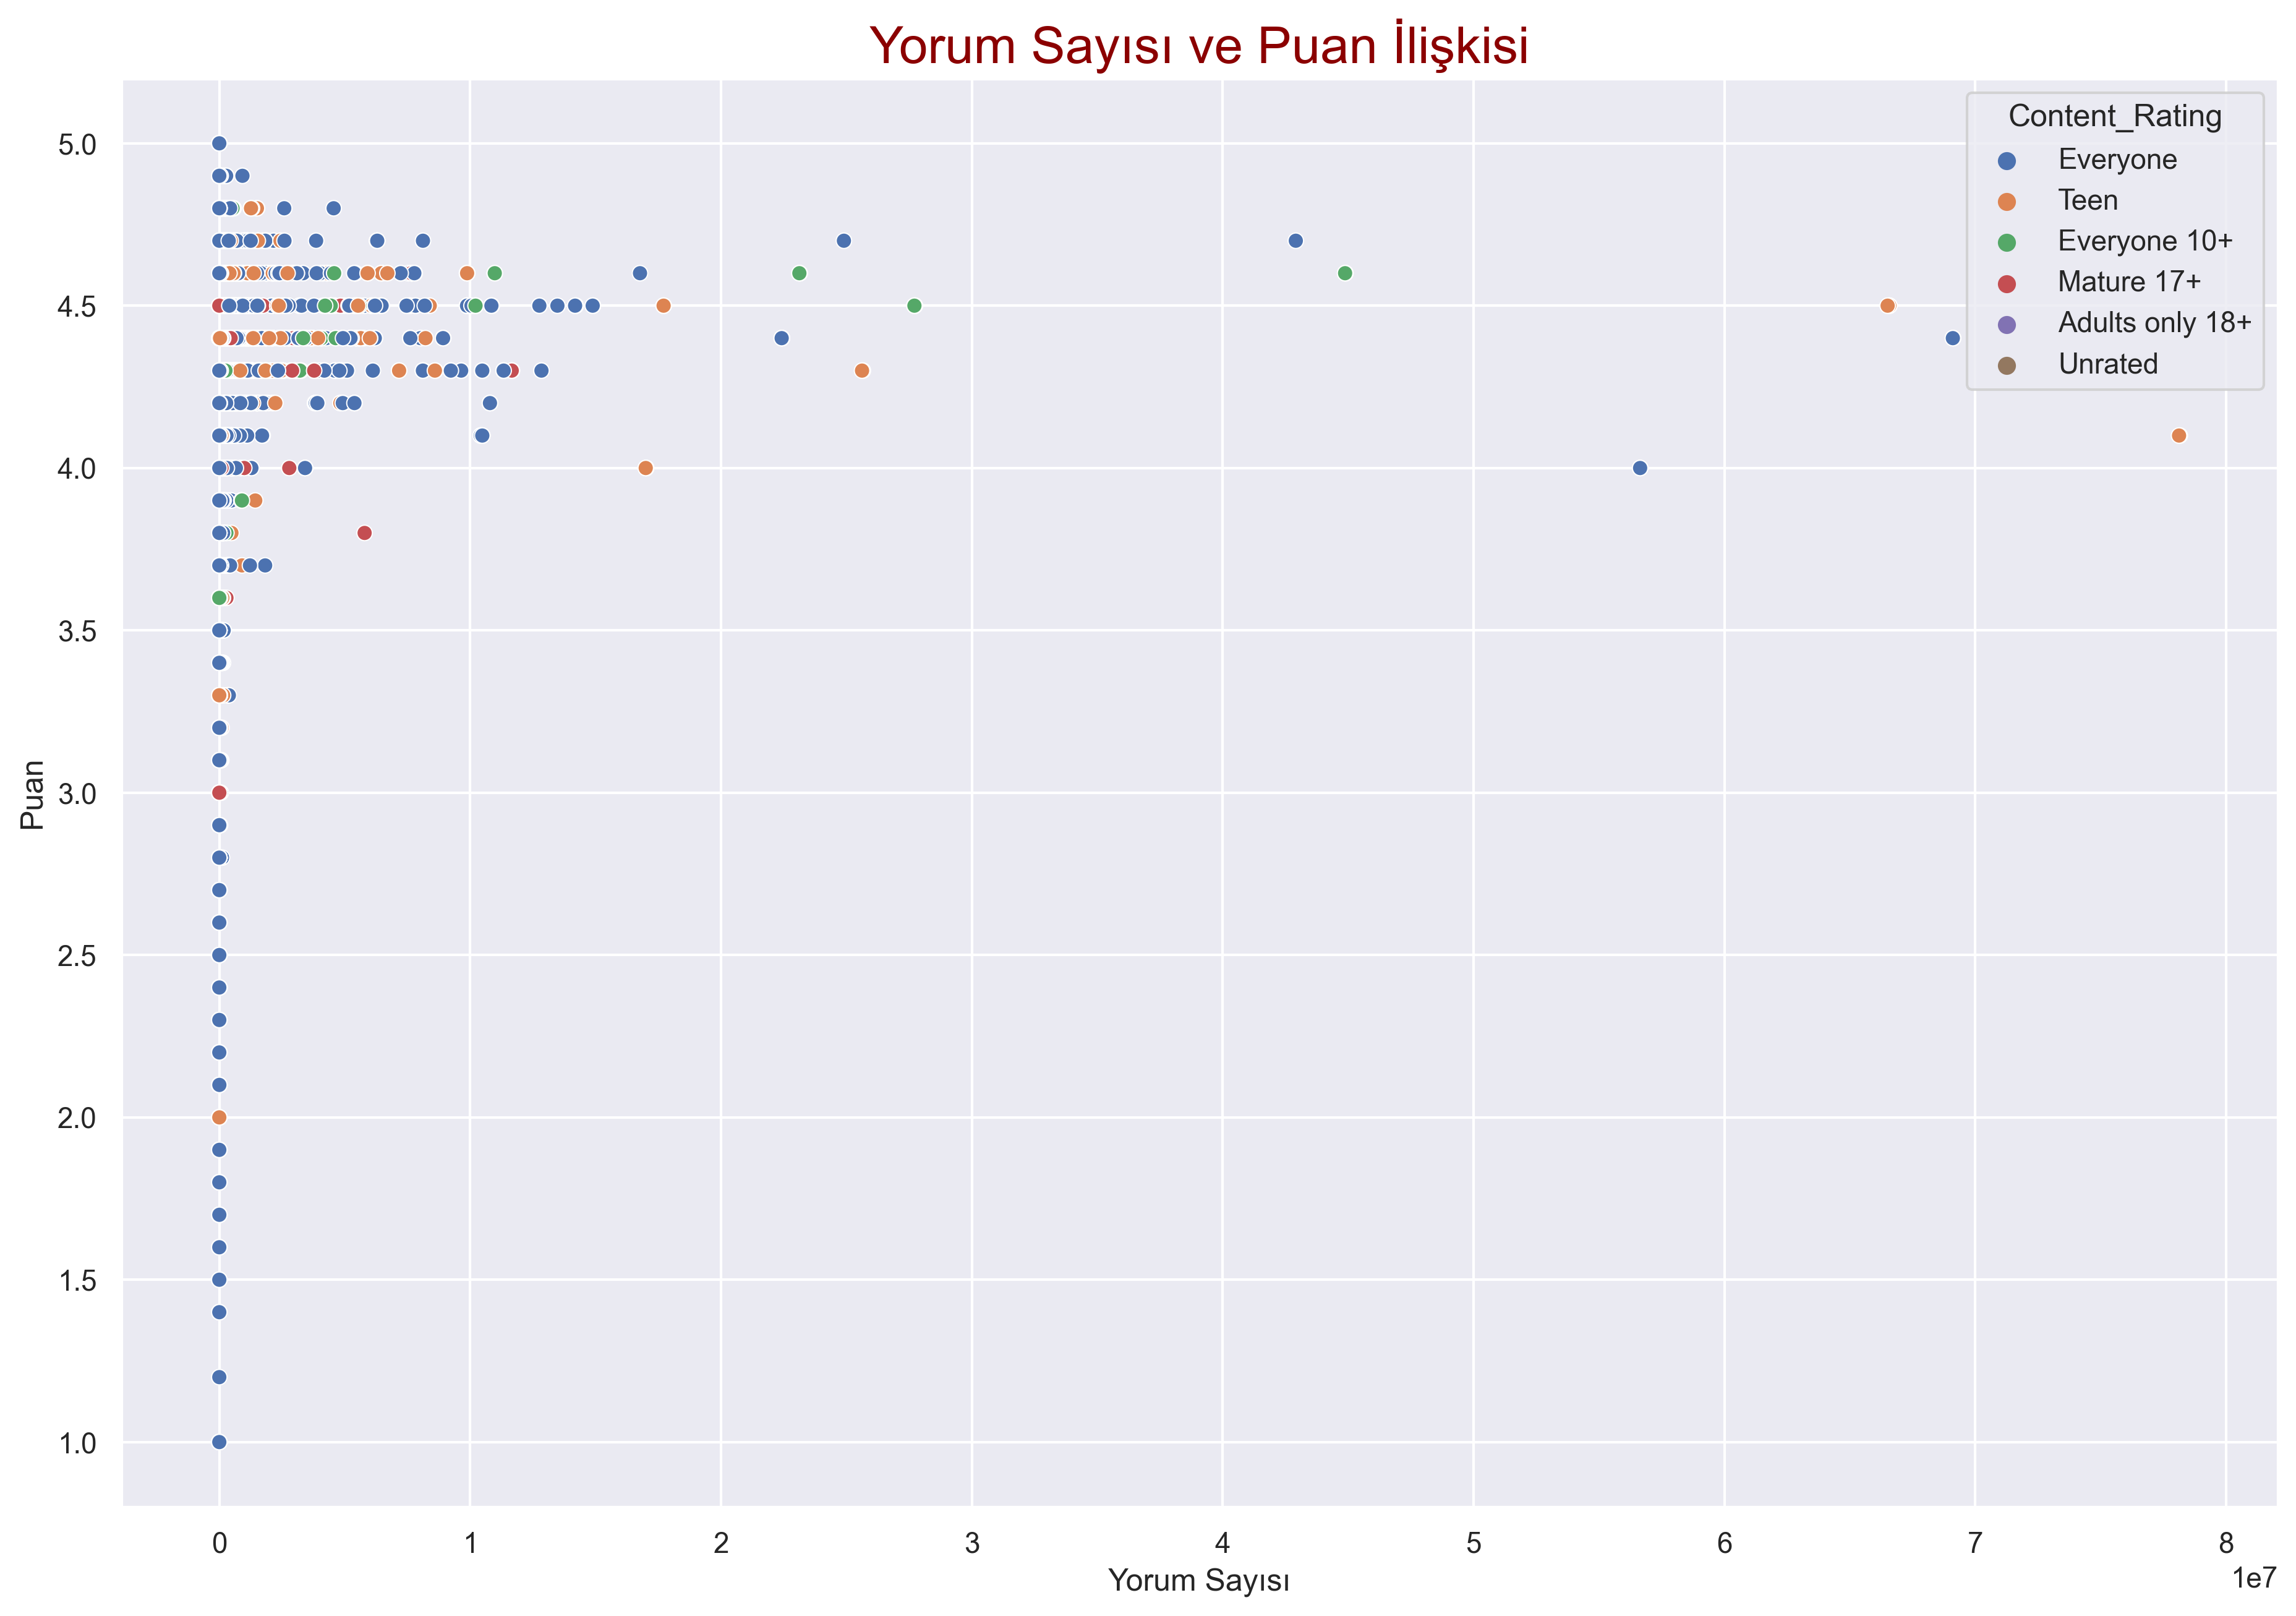

In [63]:
# Grafik boyutunu ayarla
plt.figure(figsize=(15, 10))

# Seaborn ile scatter plot çiz
sns.scatterplot(x='Reviews', y='Rating', data=df, hue='Content_Rating')

# Grafik başlığı ve başlık özellikleri
plt.title("Yorum Sayısı ve Puan İlişkisi", fontdict={'fontsize': 20, 'color': 'darkred'})

# Eksen etiketleri
plt.xlabel("Yorum Sayısı")
plt.ylabel("Puan")

# Grafik gösterimi
plt.show()

Belirtilen sayısal değişkenler (Rating', 'Reviews', 'Size', 'Installs', 'Price') arasındaki ilişkileri görselleştiriyoruz.

Ayrıca, hue='Category' parametresi ile bu ilişkilerin Category sütunundaki kategorilere (örneğin, "ART_AND_DESIGN", "BUSINESS" vb.) göre nasıl değiştiği gösterilir.

**sns.set(rc={"figure.figsize":(15, 10)}):** Seaborn'un grafik boyutunu ayarlar. Bu durumda, her grafik 15x10 birim boyutunda olacaktır.

**sns.pairplot(df[[Rating', 'Reviews', 'Converted_Size', 'Installs', 'Price', 'Category']].dropna(), hue='Category'):** Seaborn'un pairplot fonksiyonu ile belirtilen sütunlar için çiftler grafiği oluşturulur.

**df[[Rating', 'Reviews', 'Converted_Size', 'Installs', 'Price', 'Category']].dropna():** Data Frame den belirtilen sütunlar seçilir ve eksik değerler (NaN) kaldırılır.

**hue='Category':** Grafiklerin "Category" sütununa göre renklendirilmesini sağlar. Yani, her bir "Category" kategorisi için farklı bir renk kullanılır.

**plt.show():** Oluşturulan grafikleri gösterir.

- Daha fazla inceleme sayısı olan uygulamaların puanı daha yüksek mi?
- En çok indirilen uygulamalar genellikle hangi "Category" içindedir?
- Belirli bir kategoriye sahip uygulamalar diğerlerine göre daha yüksek puan alıyor mu?

OptionError: No such keys(s): 'mode.use_inf_as_null'

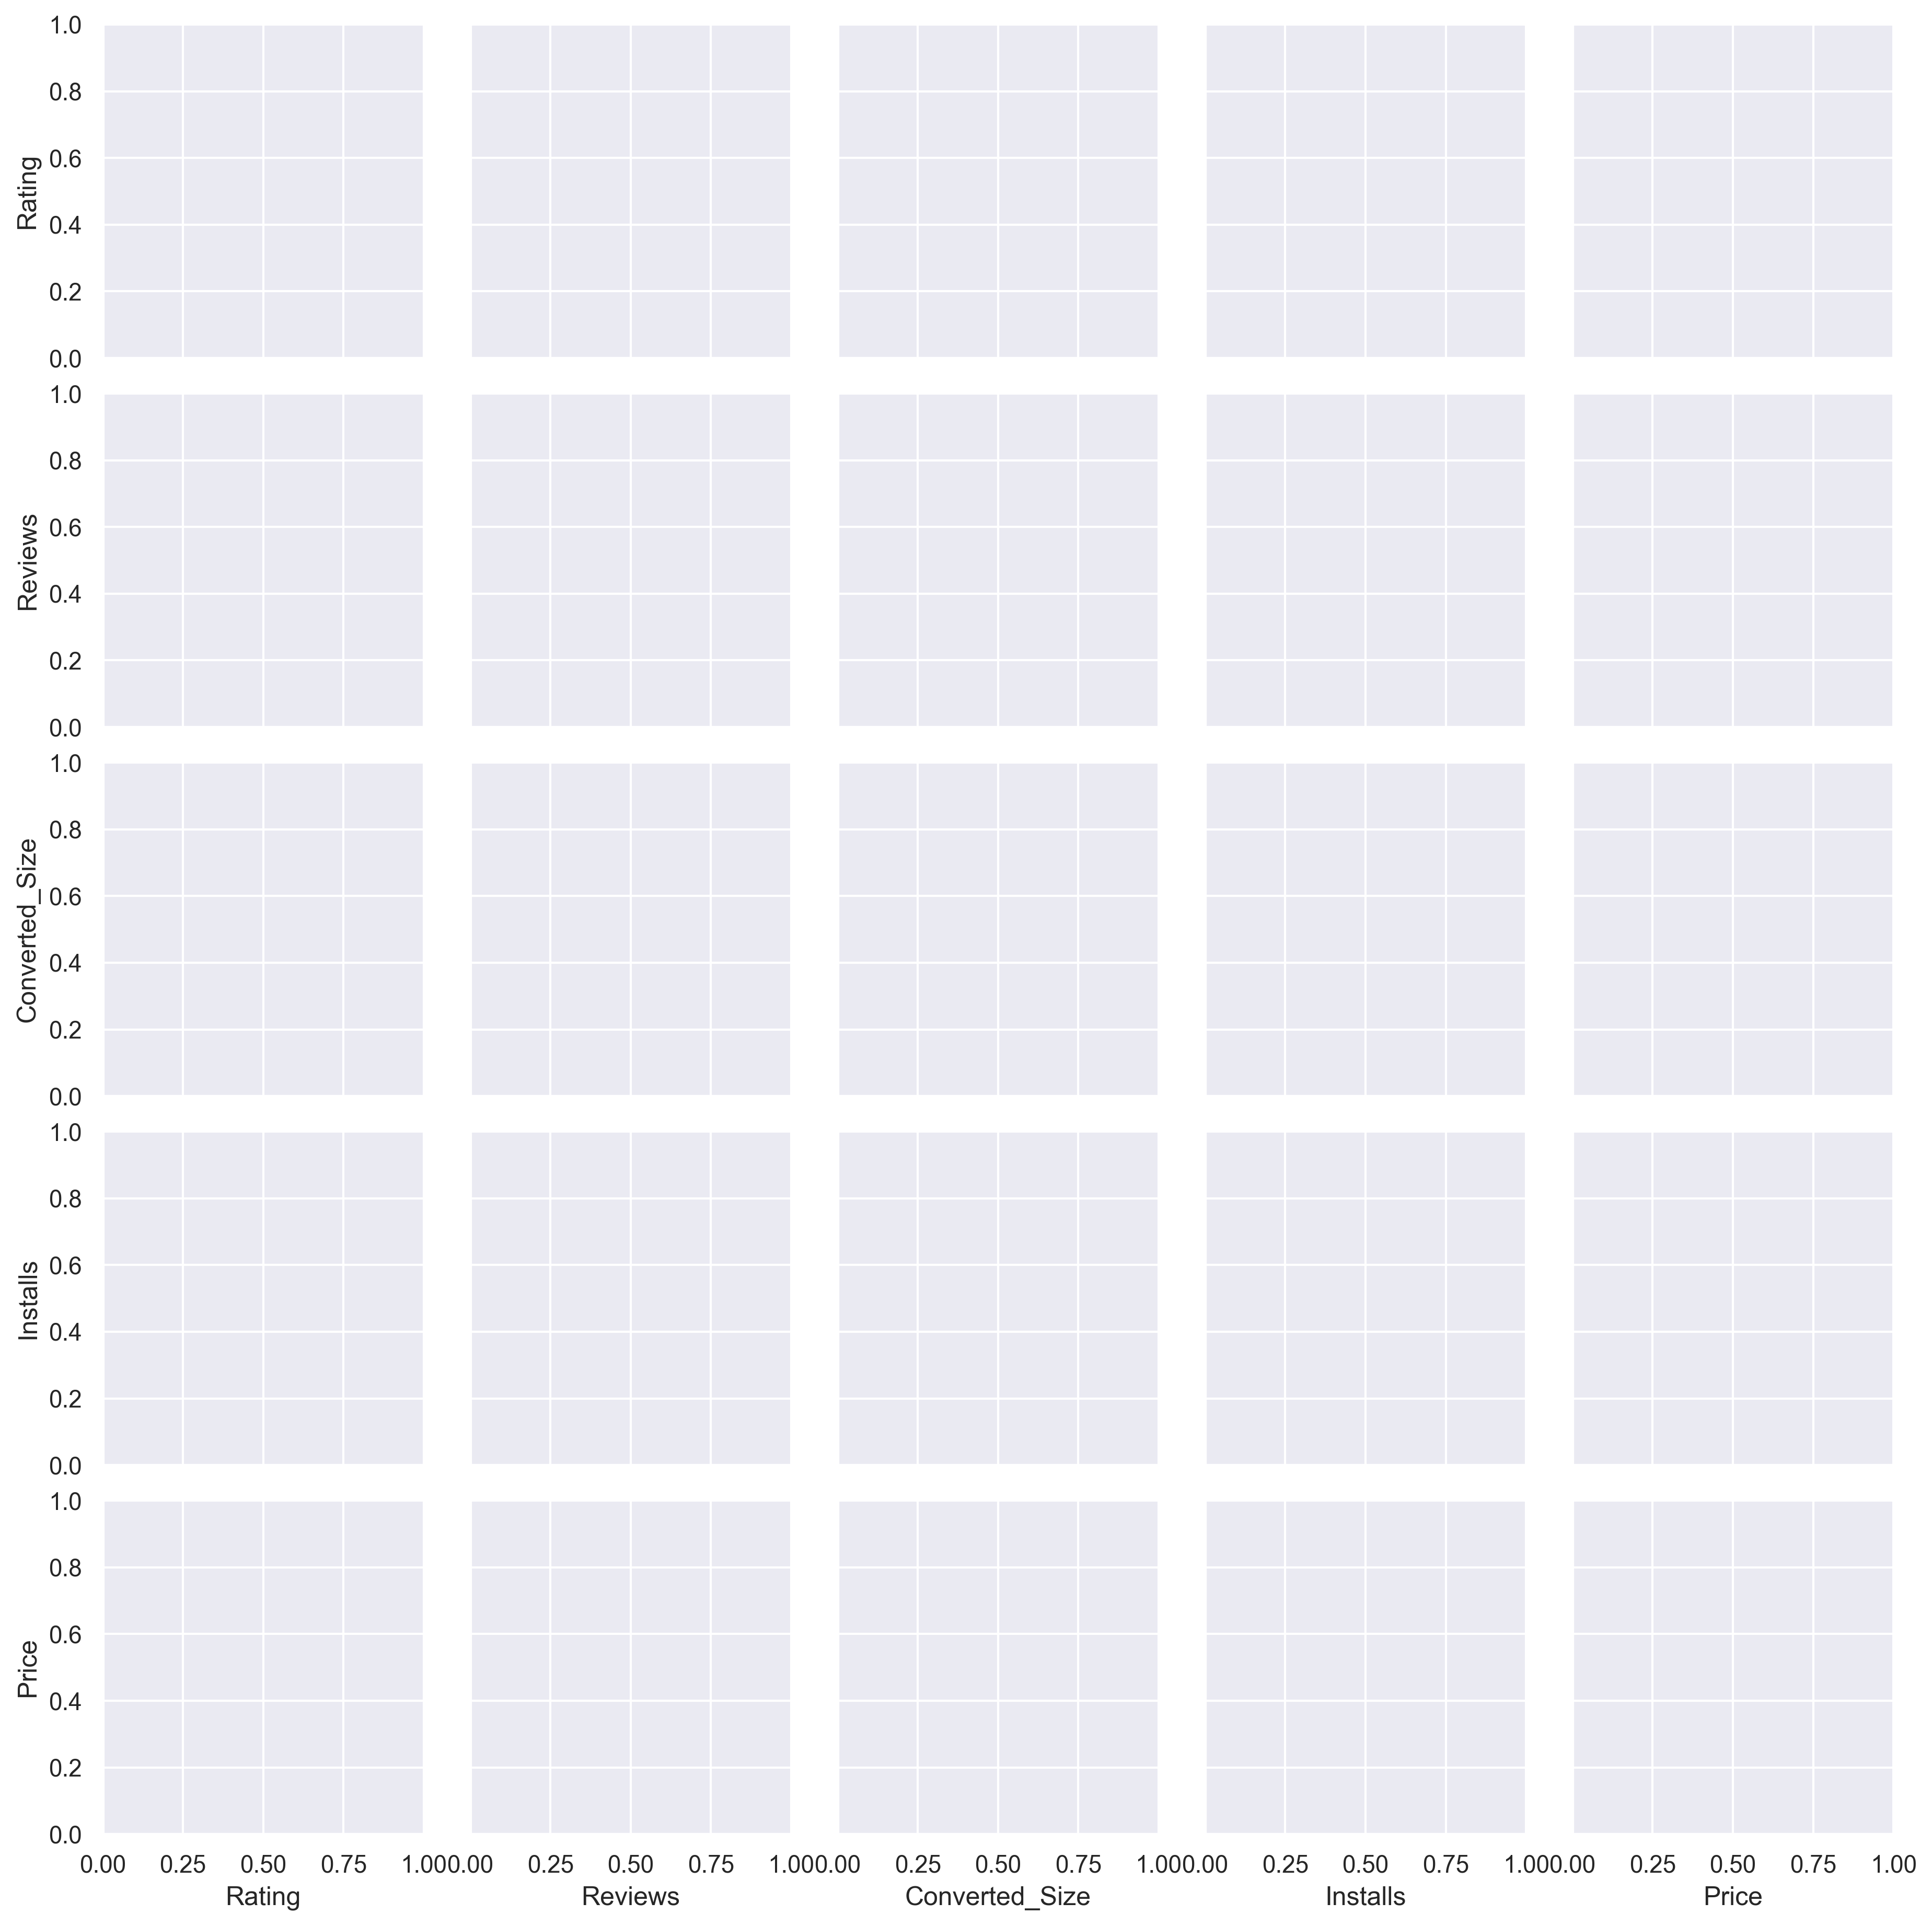

In [64]:
# Grafik boyutunu ayarla
sns.set(rc={"figure.figsize":(15, 10)})

# Seaborn ile pairplot çiz
# 'hue' parametresi ile grafiklerin hangi kategorik sütuna göre renklendirileceği belirlenir
sns.pairplot(df[['Rating', 'Reviews', 'Converted_Size', 'Installs', 'Price', 'Category']].dropna(), hue='Category')

# Grafik gösterimi
plt.show()

**Diagonal (Köşegen) Grafikler:** Köşegen üzerindeki grafikler, her bir değişkenin dağılımını gösterir. Bu dağılımlar, değişkenin nasıl bir yapıya sahip olduğu hakkında fikir verir.

**Diğer Grafikler:** Köşegen dışındaki grafikler, iki farklı değişken arasındaki ilişkiyi gösterir. Örneğin, Rating ve Reviews arasındaki grafik, yorum sayısı arttıkça puanın nasıl değiştiğini gösterir.

**Renkler: hue='Category'** parametresi sayesinde, farklı Category kategorileri farklı renklerle gösterilir. Bu, aynı grafik üzerinde farklı kategoriler arasındaki ilişkileri de gözlemlememizi sağlar.

**Sayısal Değişkenler:** Grafikte görselleştirilen sayısal değişkenler (Rating, Reviews, Installs, Size, Price), birbiriyle nasıl bir ilişki içerisinde olduklarına dair ipuçları verir.

Bu tür bir grafik, özellikle veri keşfi aşamasında, değişkenler arasındaki ilişkileri hızlı bir şekilde gözlemlemek için oldukça yararlıdır. Ancak, grafikte çok fazla veri noktası veya kategori varsa, görselleştirme karmaşık ve yorumlaması zor olabilir.

Google Play Store'da en çok harcama yapılan 5 kategoriyi ve bu kategorilere ne kadar toplam harcama yapıldığını gösteren bir bar grafiği çizdiriyoruz.

**total_spending_by_category = df.groupby('Category')['Price'].sum().sort_values(ascending=False): Kategorilere göre toplam harcamayı hesapla:** 'Category' sütununa göre gruplayarak, her kategoride ne kadar toplam harcama yapıldığını hesaplıyoruz.

**top5_categories = total_spending_by_category.nlargest(5): En çok harcama yapılan 5 kategoriyi seç:** Toplam harcamaları büyükten küçüğe sıralayarak en çok harcama yapılan 5 kategoriyi seçiyoruz.

**plt.figure(figsize=(15, 10)): Bar grafiği çiz:** Seçilen 5 kategoriyi ve bu kategorilere yapılan toplam harcamayı gösteren bir bar grafiği çiziyoruz. Grafiğin boyutunu (15, 10) olarak ayarlıyoruz.

**plt.xlabel('Kategori')
plt.ylabel('Toplam Harcama')
plt.title('En Çok Harcama Yapılan 5 Kategori')
Eksen etiketleri ve başlık:** X eksenine 'Kategori' ve Y eksenine 'Toplam Harcama' etiketlerini ekliyoruz. Grafiğin başlığı olarak 'En Çok Harcama Yapılan 5 Kategori'yi kullanıyoruz.

**plt.show(): Göster:** Grafiği ekranda gösteriyoruz.

- En yüksek toplam fiyata sahip kategoriler hangileridir? 

- Hangi kategorilerde daha yüksek fiyatlandırma stratejileri uygulanmış olabilir?

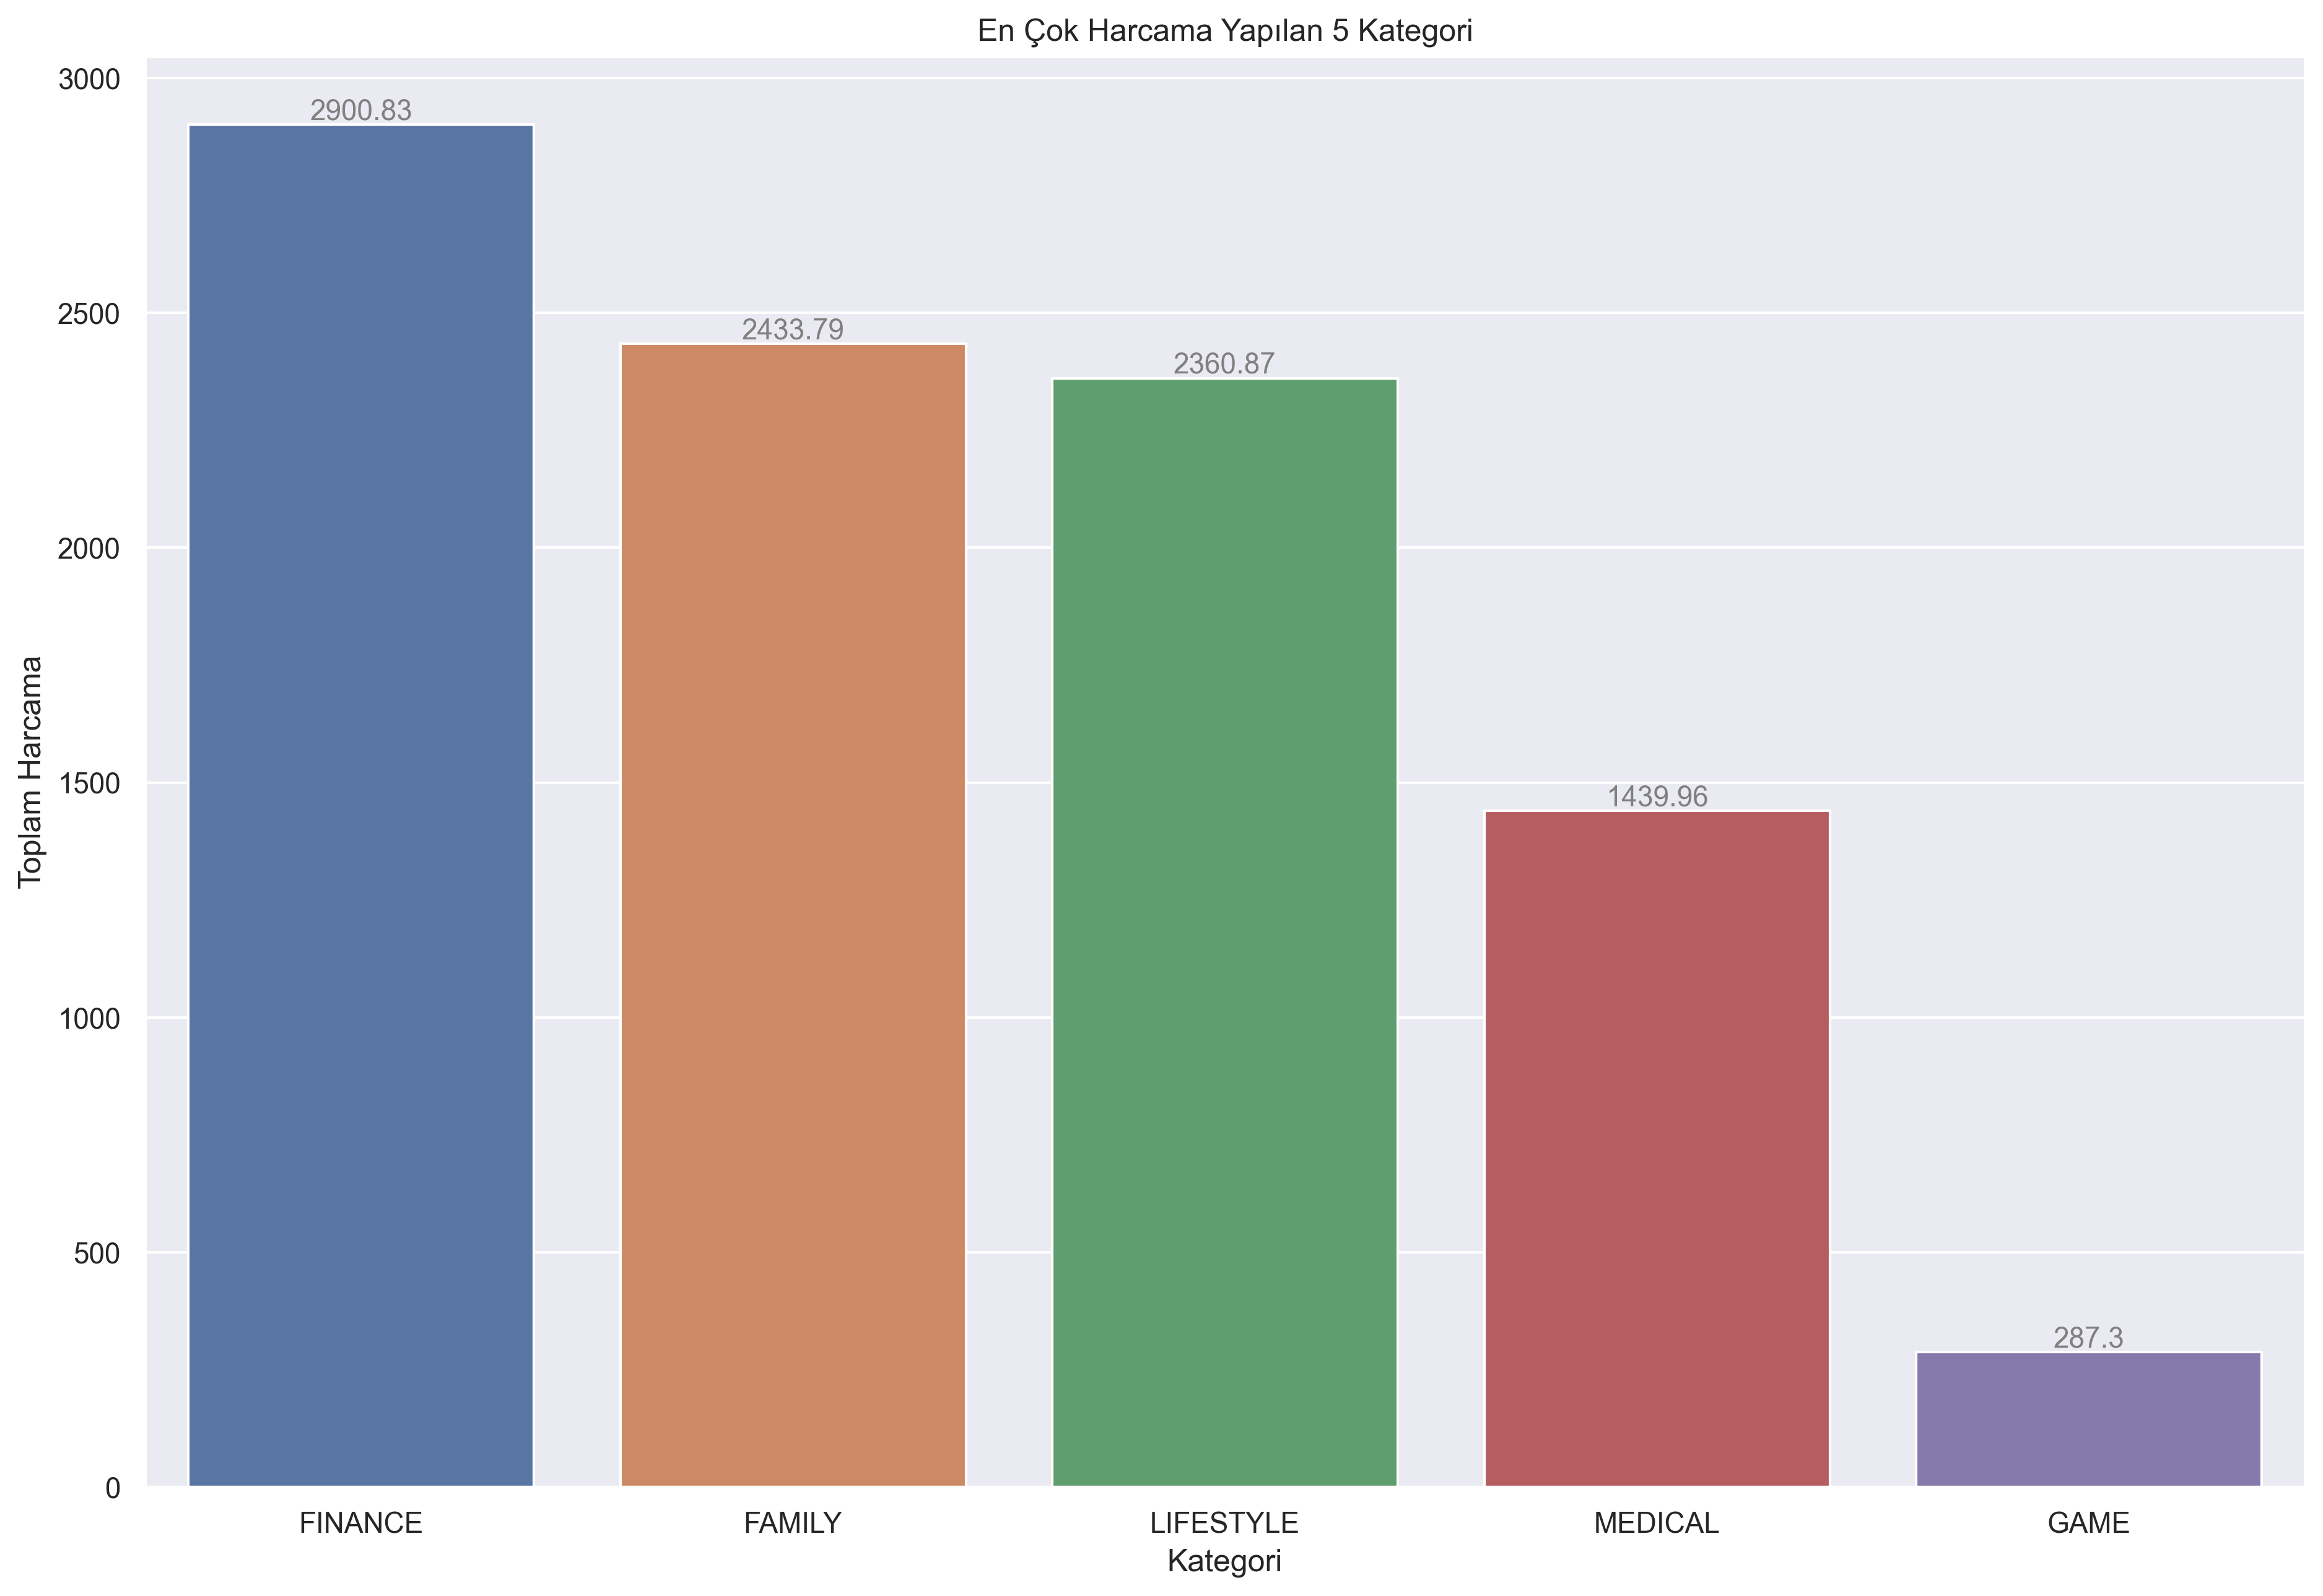

In [65]:
# Kategorilere göre toplam harcamayı hesapla
total_spending_by_category = df.groupby('Category')['Price'].sum().sort_values(ascending=False)

# En çok harcama yapılan 5 kategoriyi seç
top5_categories = total_spending_by_category.nlargest(5)

# Bar grafiği çiz
plt.figure(figsize=(15, 10))
bars = sns.barplot(x=top5_categories.index, y=top5_categories.values, order=top5_categories.index)

# Eksen etiketleri ve başlık
plt.xlabel('Kategori')
plt.ylabel('Toplam Harcama')
plt.title('En Çok Harcama Yapılan 5 Kategori')

for p in bars.patches:
    bars.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                  textcoords='offset points')

# Göster
plt.show()

## <font color='green'> <b>Numerik Columnlar için Heatmap Çizelim</b><font color='black'>

Data Frame deki sayısal sütunlar arasındaki korelasyonu görselleştiren bir ısı haritası oluşturuyoruz. Isı haritası, farklı sütunlar arasındaki ilişkinin ne kadar güçlü veya zayıf olduğunu anlamamıza yardımcı olur.

**plt.figure(figsize=(15, 10)):** Matplotlib kütüphanesini kullanarak oluşturulacak grafik için boyutları ayarlıyoruz. Bu durumda, grafik boyutu 15x10 birim olacak.

**sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .75}):** Seaborn kütüphanesinin heatmap fonksiyonu ile bir ısı haritası (heatmap) çiziyoruz.

**df.corr():** Veri çerçevesinin sayısal sütunları arasındaki korelasyon matrisini hesaplıyor.
**annot=True:** Her bir hücre için korelasyon katsayısını gösteriyor.
**linewidths=.5:** Hücreler arasındaki çizgilerin kalınlığını ayarlıyor.
**fmt=".2f":** Sayıların formatını belirtiyor; bu durumda iki ondalık basamağa kadar gösterilecek.
**cmap='coolwarm':** Renk paletini "coolwarm" olarak ayarlıyor.
**cbar_kws={"shrink": .75}:** Renk çubuğunun boyutunu %75 oranında küçültüyor.
**plt.title("Sayısal Sütunlar için Heatmap", fontdict={'fontsize': 20, 'color': 'darkred'}):** Grafik için bir başlık ekliyoruz ve başlığın font boyutunu ve rengini ayarlıyoruz.

**plt.show():** Grafiki ekranda gösteriyoruz.

In [66]:
# Grafik boyutunu ayarla
plt.figure(figsize=(15, 10))

# Seaborn ile heatmap çiz
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt=".2f", cmap='RdBu', cbar_kws={"shrink": .75})

# Grafik başlığı ve başlık özellikleri
plt.title("Sayısal Sütunlar için Heatmap", fontdict={'fontsize': 20, 'color': 'darkred'})

# Grafik gösterimi
plt.show()

ValueError: could not convert string to float: 'Photo Editor & Candy Camera & Grid & ScrapBook'

<Figure size 4500x3000 with 0 Axes>

Görüldüğü üzere Kullanıcılar tarafından uygulamanın aldığı toplam yorum sayısı (Reviews) ile Uygulamanın Google Play'den kaç kez indirildiği bilgisi (Installs) arasında 0,64 pozitif korelsayon var.

- Korelasyon, iki değişken arasındaki ilişkinin yönünü ve gücünü ölçer. Korelasyon katsayısı genellikle -1 ile 1 arasında bir değer alır.

- -1'e yakın bir korelasyon, iki değişken arasında güçlü bir negatif ilişki olduğunu gösterir.
- 1'e yakın bir korelasyon, iki değişken arasında güçlü bir pozitif ilişki olduğunu gösterir.
- 0'a yakın bir korelasyon, iki değişken arasında zayıf bir ilişki olduğunu gösterir.
- Bu durumda, "Reviews" (Yorum Sayısı) ve "Installs" (İndirilme Sayısı) arasında 0,64 değerinde orta seviyede bir pozitif korelasyon (ilişki) olduğu söyelenebilir. Yani, genellikle bir uygulamanın yorum sayısı arttıkça, indirilme sayısının da artması beklenir.
- Ancak, bu bir nedensellik ilişkisi değildir; yani yorum sayısının artması indirilme sayısını artırmaz, sadece iki değişken arasında bir ilişki olduğunu gösterir.

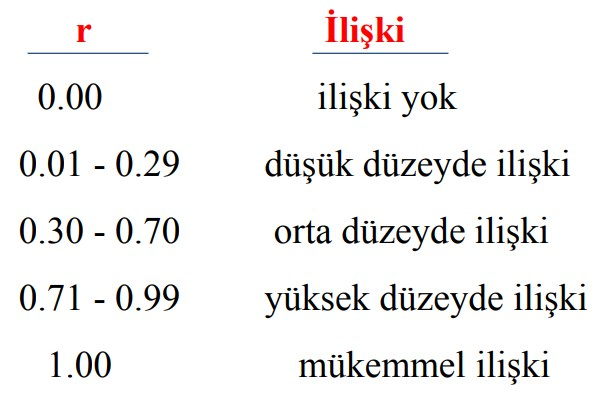

## <font color='green'> <b>Rating Column una göre KDE içeren bir Histogram grafiği çizelim </b><font color='black'>

Google Play Store'daki uygulamaların puan dağılımını göstereceğiz. Histogram ve yoğunluk tahmini (Kernel Density Estimation (KDE)) bir arada kullanılarak, uygulamaların puanlarının nasıl dağıldığı daha ayrıntılı bir şekilde göstereceğiz.

**Grafik Boyutunu Ayarla: plt.figure(figsize=(15, 10))** ile grafiğin boyutunu (15, 10) olarak ayarlıyoruz.

**Histogram ve KDE Çiz: sns.histplot()** fonksiyonu ile 'Rating' sütunundan eksik değerler (dropna()) çıkarıldıktan sonra bir histogram ve KDE grafiği çiziyoruz. bins=30 ile 30 kutu (bar) kullanıyoruz. kde=True ile yoğunluk tahmini grafiği de ekleniyor.

**Grafik Başlığı ve Başlık Özellikleri: plt.title()** ile grafiğe "Uygulama Puan Dağılımı" başlığını ekliyoruz ve font büyüklüğü ile rengini ayarlıyoruz.

**Eksen Etiketleri: plt.xlabel() ve plt.ylabel()** ile X ve Y eksenlerine "Puan" ve "Frekans" etiketleri ekleniyor.

**X Eksenindeki Etiketleri Özelleştir: plt.xticks(np.arange(0, 5.1, 0.1),  rotation=90)** ile X eksenindeki etiketler 0'dan 5'e kadar 0.1'lik adımlarla yerleştiriliyor ve bu yazıların karışık gözükmemesi için 90 derecelik açı ile daha anlaşılır yapıyoruz.

**Grafik Gösterimi: plt.show()** ile grafiği ekranda gösteriyoruz.

- Uygulamaların puanları genellikle hangi değerler etrafında toplanmıştır?
- Dağılım simetrik mi, yoksa bir tarafa mı çarpıktır?
- Puanlar genellikle bir aralıkta mı yoğunlaşmış, yoksa daha dağılmış mıdır?

**KDE Eğrisi:** Verinin nasıl bir dağılım gösterdiğini daha düzgün bir çizgi ile ifade eder. Bu, verinin genel "şeklini" anlamak için yararlıdır.

OptionError: No such keys(s): 'mode.use_inf_as_null'

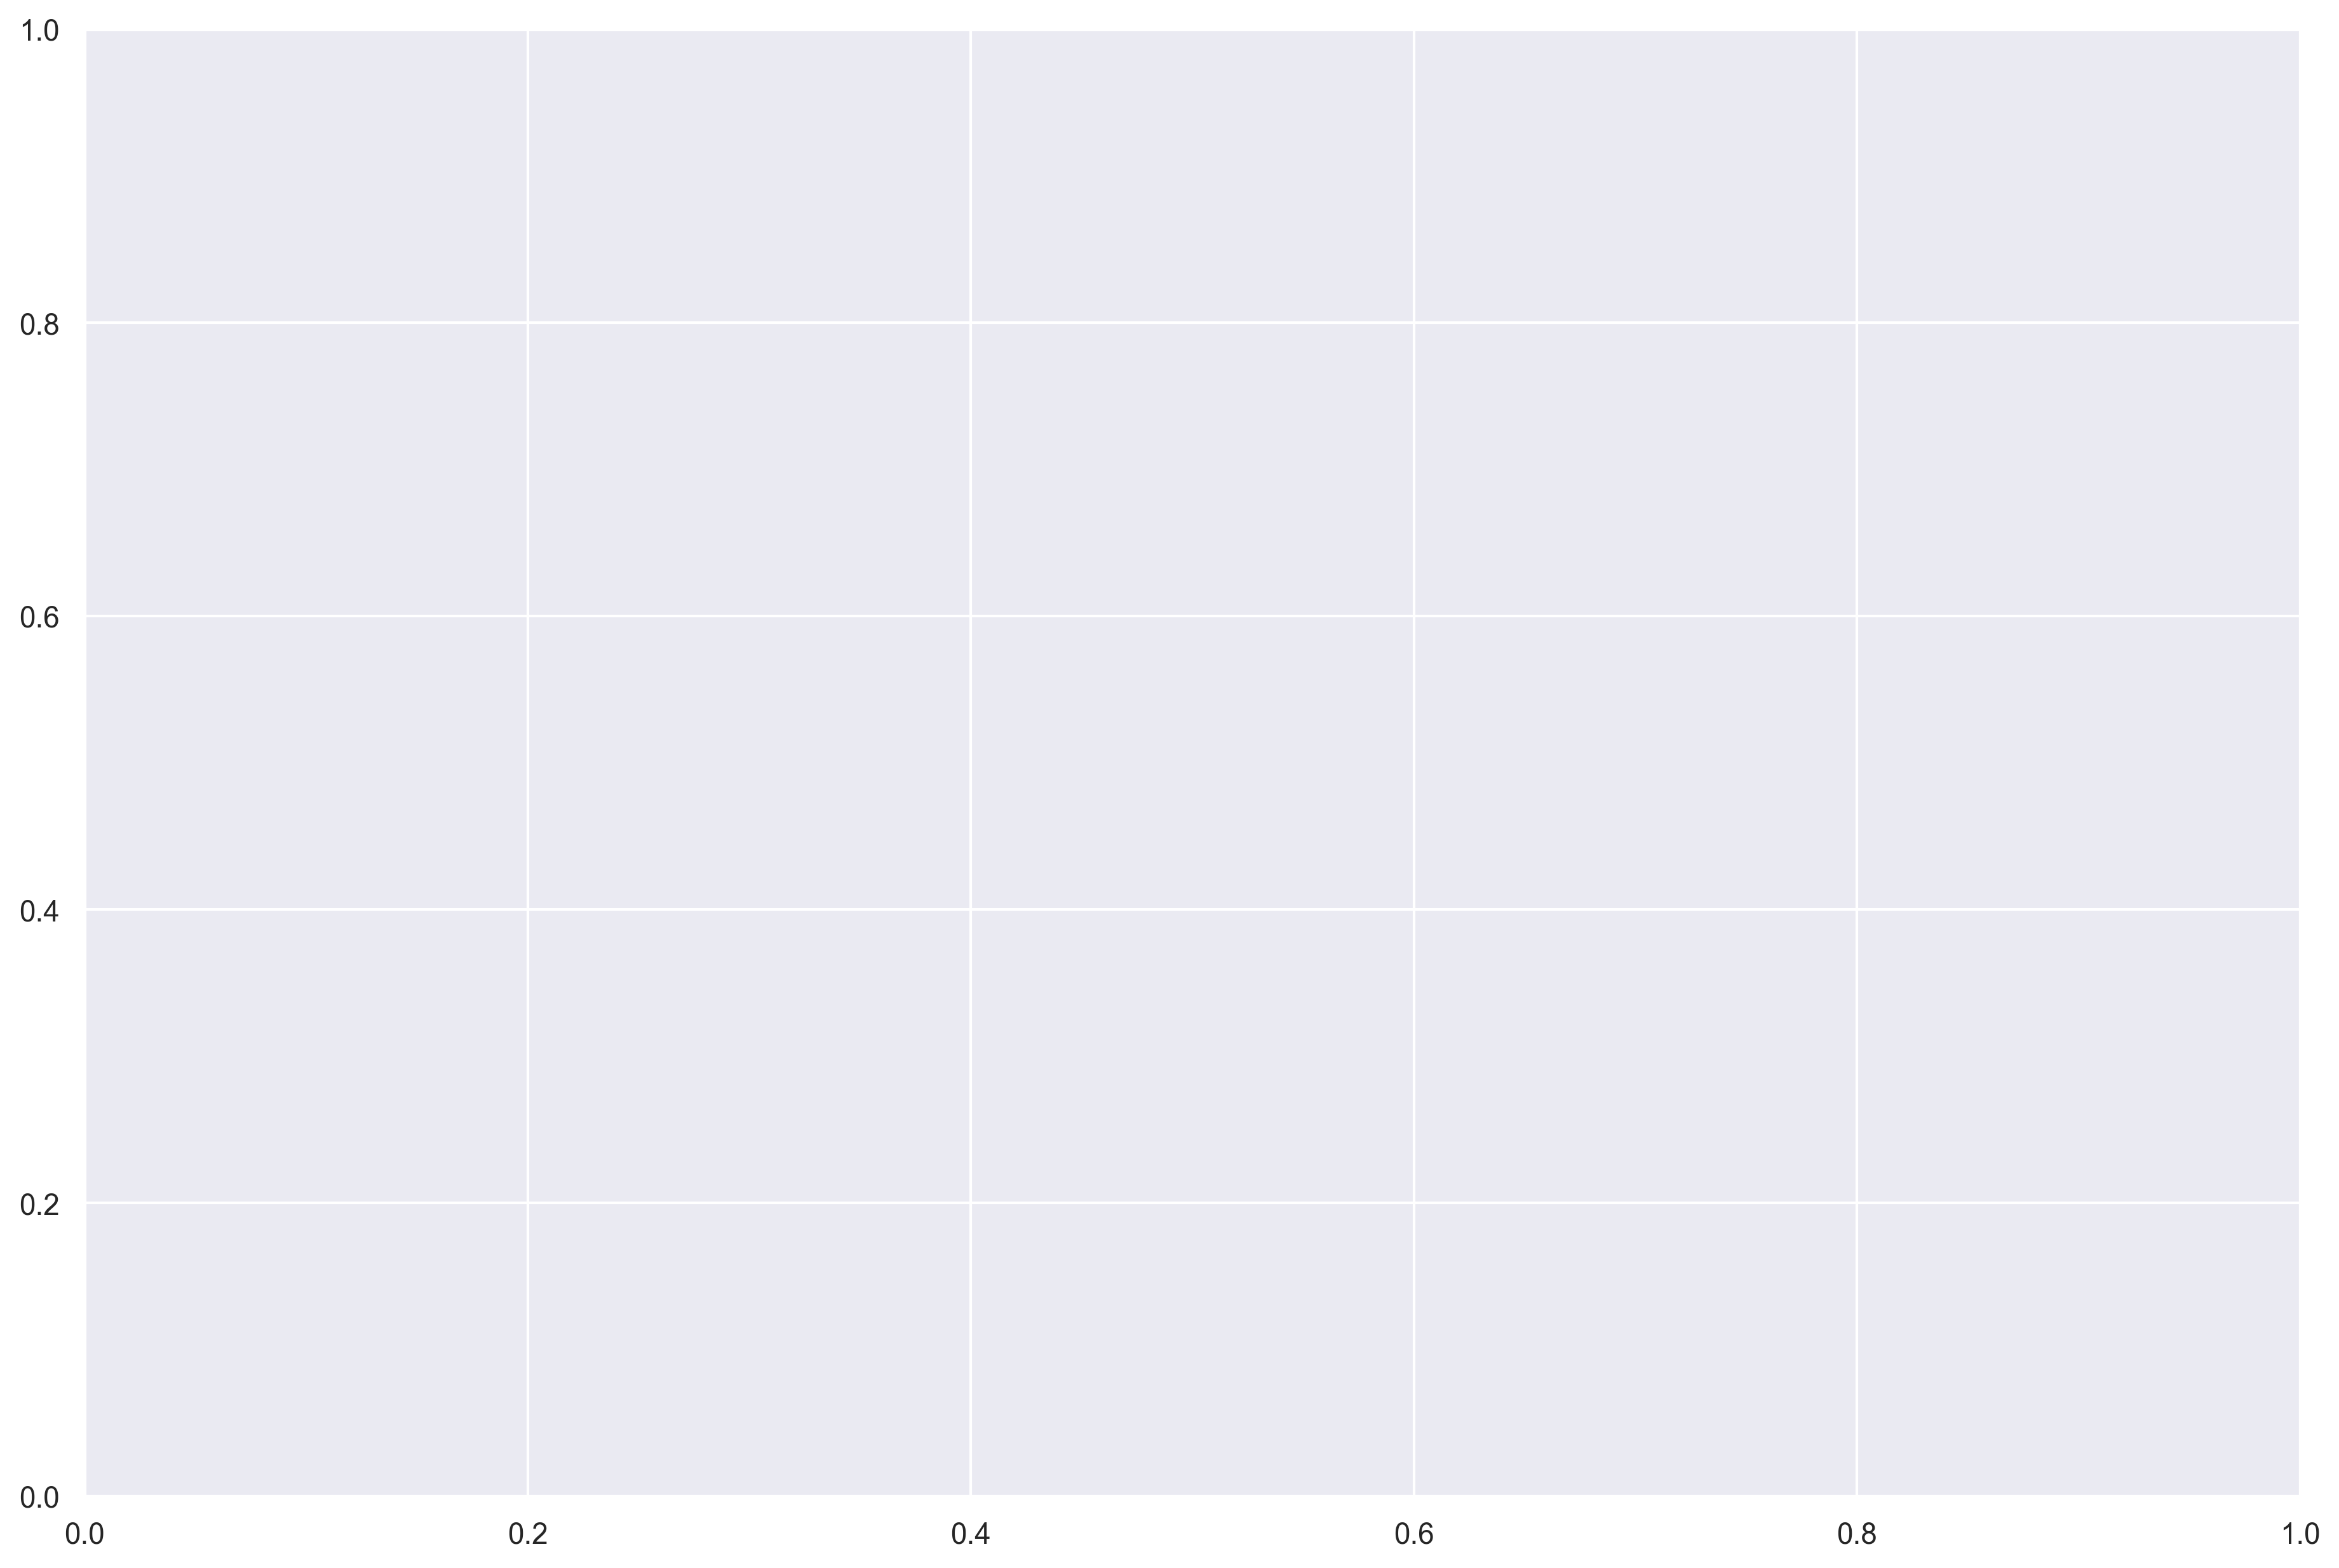

In [67]:
# Grafik boyutunu ayarla
plt.figure(figsize=(15, 10))

# Seaborn ile histogram ve KDE çiz
sns.histplot(df['Rating'], bins=30, kde=True, color='blue', edgecolor='black')

# Grafik başlığı ve başlık özellikleri
plt.title("Uygulama Puan Dağılımı", fontdict={'fontsize': 20, 'color': 'darkred'})

# Eksen etiketleri
plt.xlabel("Puan", color="darkred")
plt.ylabel("Frekans", color="darkred")

# X eksenindeki etiketleri özelleştir
plt.xticks(np.arange(0, 5.1, 0.1), rotation=90)
plt.tick_params(axis='both', colors='darkred')

# Grafik gösterimi
plt.show()

**Histogram:** Her bir bar (kutu), belirli bir puan aralığındaki uygulama sayısını (frekansı) gösterir.

**KDE:** Mavi çizgi, puan dağılımının yoğunluk tahminini gösterir. Bu, hangi puan aralığının daha sık olduğunu anlamamıza yardımcı olur.

**X Ekseni:** Uygulamaların aldığı puanlar (0 ile 5 arasında).

**Y Ekseni:** Her bir puan aralığındaki uygulama sayısı (frekans).

**Histogram:**
Histogram, bir veri setindeki değerlerin dağılımını görselleştirmek için kullanılır. Veri seti belirli aralıklara (genellikle eşit büyüklükte) bölünür ve her bir aralıkta kaç veri noktası olduğu sayılır. Bu sayede, veri setinin genel yapısını daha iyi anlayabiliriz.

Örneğin, 4.3 puanında bir artış görmek, bu puan aralığındaki uygulama sayısının diğer puan aralıklarına göre daha fazla olduğunu gösterir. Yani, kullanıcılar genellikle bu puanı daha sık vermişler.

**KDE (Kernel Density Estimation):**
KDE, bir veri setinin olasılık yoğunluk fonksiyonunu tahmin etmek için kullanılır. Basitçe söylemek gerekirse, KDE bize veri setindeki her bir noktanın etrafında bir "yoğunluk" oluşturur ve bu yoğunlukları toplar. Sonuç olarak, daha pürüzsüz bir dağılım grafiği elde edilir.

Histogramda 4.3 puanında bir artış görmek ve KDE grafiğinde de bu puan etrafında bir "tepe" oluşması, bu puanın veri setinde sıkça rastlanan bir değer olduğunu gösterir. Yani, bu puan aralığındaki uygulamaların sayısı diğer puanlara göre daha fazladır ve kullanıcılar bu puanı daha sık vermişlerdir.

Bu iki gözlem bir araya getirildiğinde, uygulamaların genellikle 4.3 puan gibi yüksek puanlar aldığını ve bu puanın kullanıcılar tarafından sıkça verildiğini söyleyebiliriz.

## <font color='green'> <b>App Sütunu ile WordCloud Örneği </b><font color='black'>

Google Play Store'da hangi kelimelerin veya terimlerin sıkça kullanıldığına dair bir fikir edinmek istiyoruz.

**text = ' '.join(df['App'])** ('df') "App" sütununda bulunan tüm uygulama isimlerini birleştiriyoruz. Her bir isim arasına bir boşluk koyarak tek bir büyük metin oluşturuyoruz.

**wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)** oluşturulan büyük metni kullanarak bir kelime bulutu (WordCloud) oluşturuyoruz. Kelime bulutunun boyutlarını (800x400) ve arka plan rengini (beyaz) belirtiyoruz. **generate() metodu,** metinden kelime bulutunu oluşturur.

**plt.figure(figsize=(10, 5))** görselleştirmenin boyutlarını belirtiyoruz. Genişlik 10 birim ve yükseklik 5 birim olacak şekilde ayarlanmıştır.

**plt.imshow(wordcloud, interpolation='bilinear')** kelime bulutunu görüntülemek için **imshow()** fonksiyonunu kullanıyoruz. "bilinear" interpolasyon, görüntünün daha yumuşak görünmesini sağlar.

**plt.axis('off')** grafikteki eksen bilgilerini gizliyoruz. Yani, x ve y eksenindeki etiketler ve rakamlar görüntülenmeyecektir.

**plt.title('Google Play Store Apps Word Cloud')** görselleştirmenin başlığını belirtiyoruz.

**plt.show()** görselleştirmeyi ekrana çizdiriyoruz.

Google Play Store'daki uygulama isimlerinin hangi kelimeleri veya terimleri sıkça kullandığını gösterir.

Sıkça geçen kelimeler daha büyük ve daha belirgin bir şekilde gösterilir.

Bu tür bir görselleştirme genellikle metinde hangi kelimelerin veya terimlerin en yaygın olduğunu hızlı ve etkili bir şekilde görmek için kullanılır. 

- Hangi kelimeler veya terimler uygulama isimlerinde sıkça kullanılıyor?
- Belirli bir kategori veya tür için karakteristik kelimeler veya terimler nelerdir? (Eğer veriyi kategorilere göre filtrelemişseniz)
- Pazarda belirli bir niş veya trend var mı?

Bu tür bir analiz, uygulama geliştiricileri için faydalı olabilir; örneğin, bir uygulama ismi seçerken veya pazardaki rekabeti değerlendirirken.

In [ ]:
#pip install wordcloud

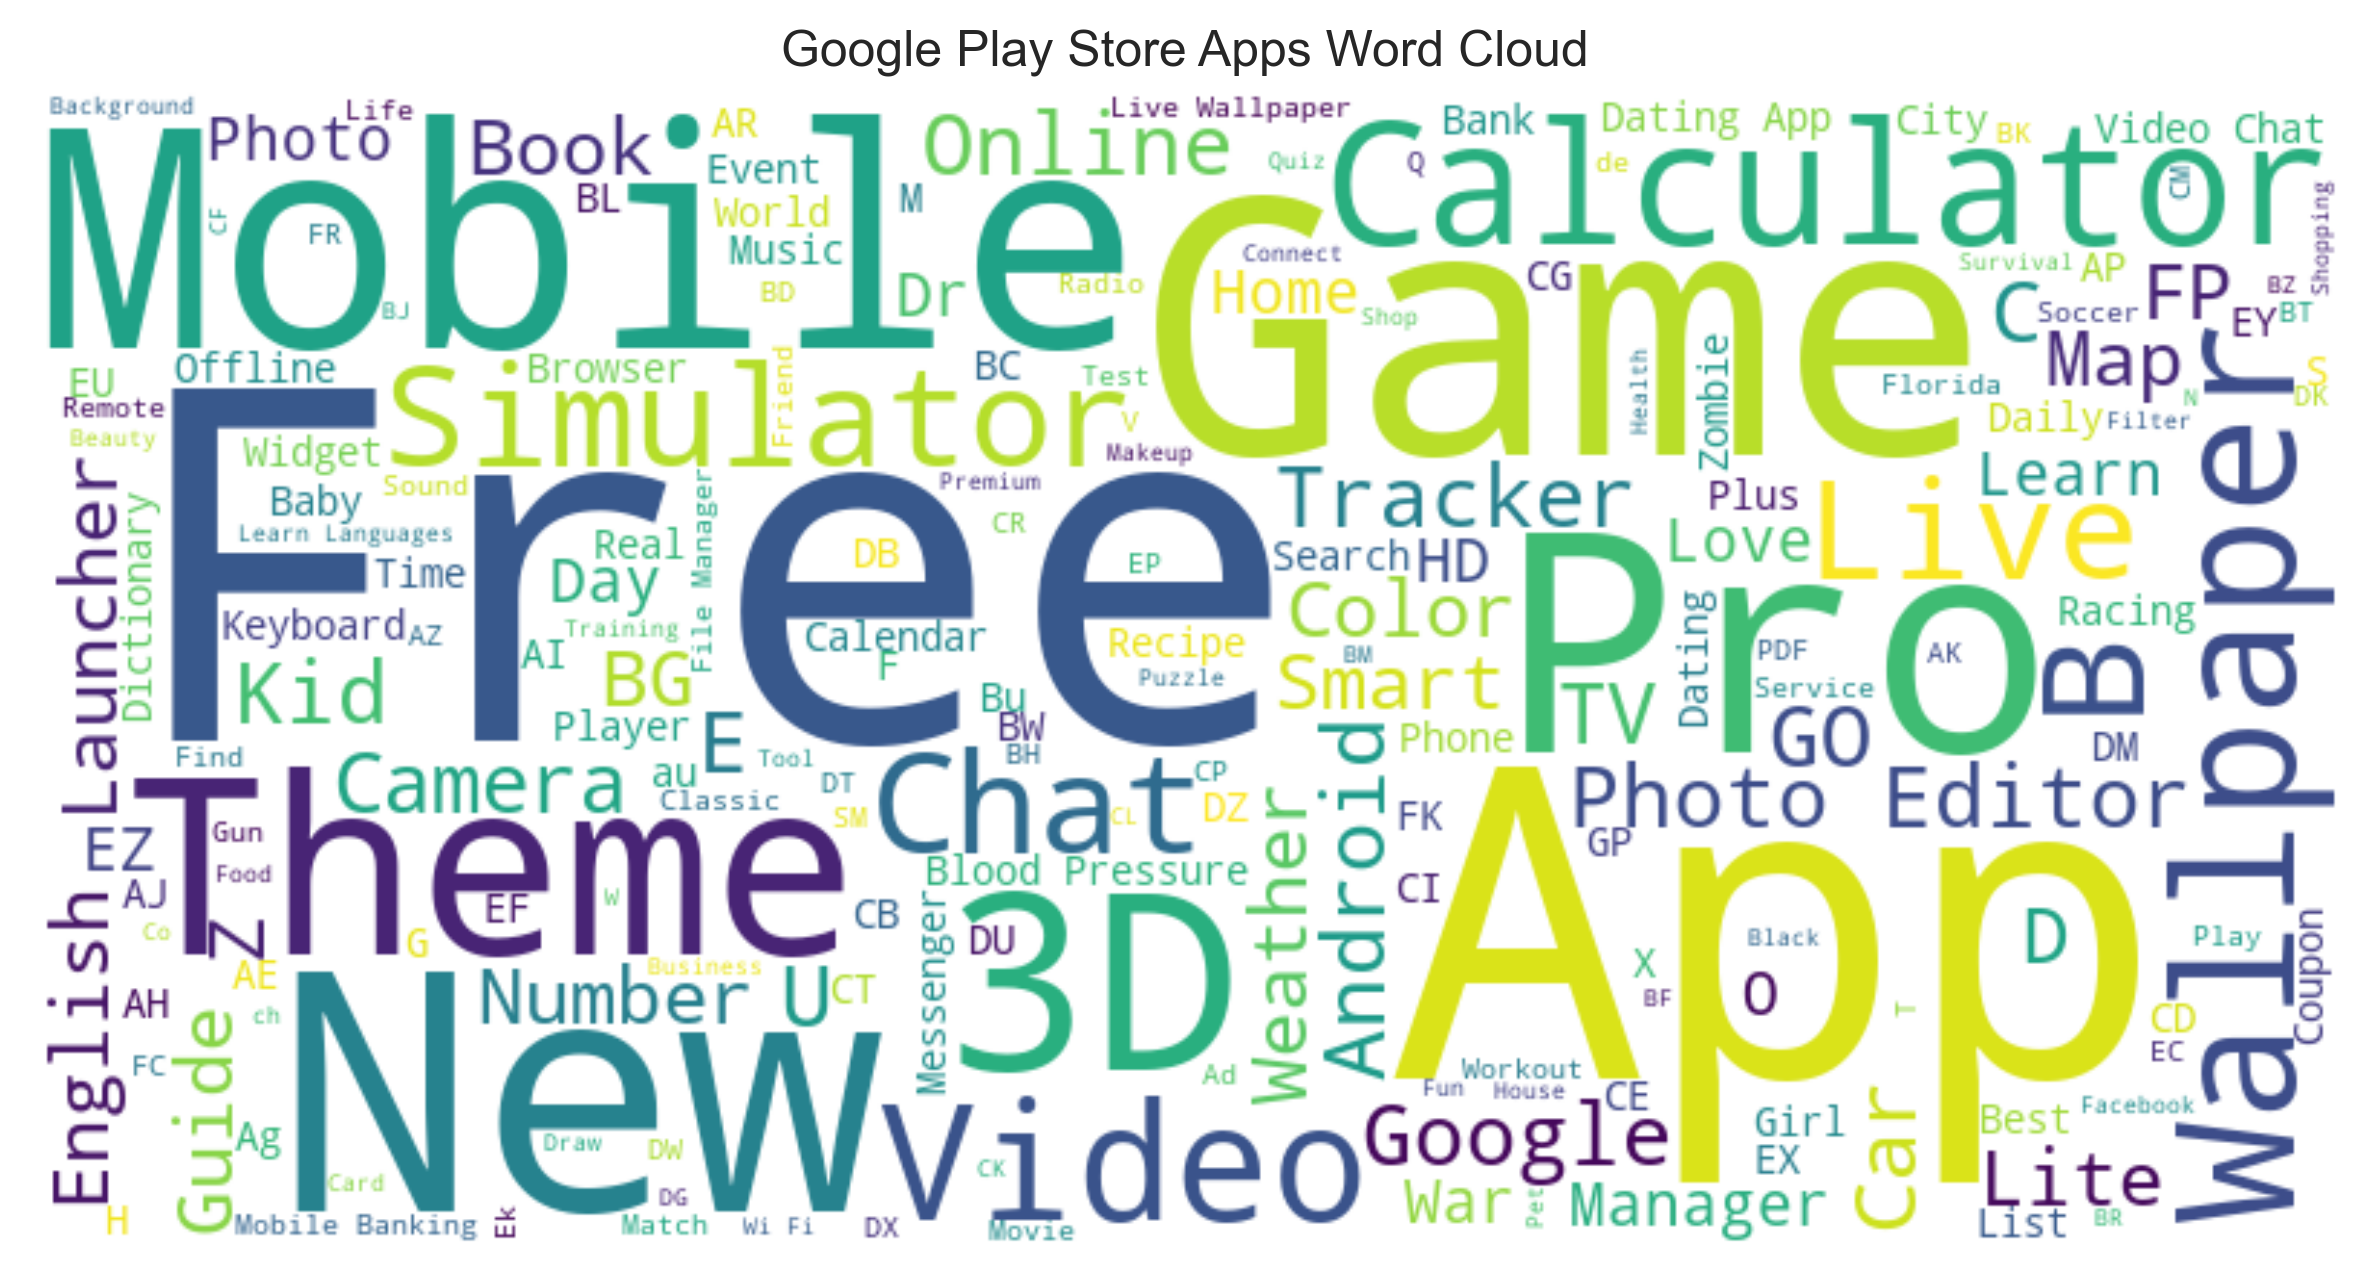

In [68]:
#pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 'App' sütunundaki tüm uygulama isimlerini bir araya getir
text = ' '.join(df['App'])

# WordCloud oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Grafik özelliklerini ayarla
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Google Play Store Apps Word Cloud')
plt.show()

**Matplotlib'in imshow() fonksiyonu** için interpolation parametresi birkaç farklı değer alabilir. Bu değerler, görüntünün nasıl gösterileceğini kontrol eder. İşte bazı örnekler:

**1. nearest:** En yakın komşu interpolasyonu. Hızlıdır fakat kalitesiz olabilir.
**2. bilinear:** Çift doğrusal interpolasyon. Kaliteli ve genellikle hızlıdır.
**3. bicubic:** Çift kübik interpolasyon. Daha yüksek kaliteli fakat daha yavaş olabilir.
**4. spline16:** 4x4 B-spline interpolasyonu.
**5. spline36:** 6x6 B-spline interpolasyonu.
**6. hanning, hamming, hermite, kaiser:** Farklı pencere fonksiyonları kullanarak interpolasyon yapar.
**7. lanczos:** Lanczos interpolasyonu, yüksek kalitede fakat yavaş olabilir.
**8. none:** Interpolasyon uygulanmaz.

Bunlar dışında birkaç seçenek daha vardır. Seçim, görüntü kalitesi ve hız arasındaki dengeye bağlı olarak yapılır. bilinear genellikle iyi bir denge sunar, ancak daha yüksek kalite gerekiyorsa bicubic veya lanczos gibi yöntemler kullanılabilir.

# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>BONUS</b></p>

## <font color='green'> <b>Interaktif scatter plot </b><font color='black'>

Rastgele bir veri seti oluşturup ve bu veri setini kullanarak bir "interaktif scatter plot" (etkileşimli saçılma grafiği) çizeceğiz. 

**1. np.random.seed(0):** Numpy'nin rastgele sayı üreteci için tohum değeri belirlenir. Aynı tohumu kullanmak, her çalıştırıldığında aynı rastgele sayıları üretir.

**2. n = 100:** 100 tane rastgele veri noktası oluşturulacağını belirtir.

**3. df = pd.DataFrame(...):** Pandas veri çerçevesi oluşturur. Veri çerçevesi 'X', 'Y' ve 'Category' olmak üzere üç sütun içerir:
    - 'X' ve 'Y' sütunları, 0 ile 1 arasında rastgele üretilmiş sayıları içerir.
    - 'Category' sütunu, 'A', 'B', ya da 'C' kategorilerinden rastgele seçilmiş bir değeri içerir.

**4. px.scatter(...):** Plotly Express (px) kütüphanesini kullanarak interaktif bir scatter plot oluşturur. 'X' ve 'Y' eksenleri veri çerçevesindeki 'X' ve 'Y' sütunlarına, renkler ise 'Category' sütununa göre atanır.

**5. fig.show():** Oluşturulan grafiği gösterir.

X ve Y koordinatlarına göre noktaları çizerken, bu noktaların hangi kategoriye ait olduğunu renklerle gösteriyoruz. 

Grafiğin interaktif olması, kullanıcıların grafiği yakından incelemelerine, belirli noktaları veya kategorileri seçmelerine ve daha fazla bilgi alabilmelerine olanak tanır.

In [69]:
# Rastgele bir veri seti oluştur
np.random.seed(0)
n = 100
df = pd.DataFrame({
    'X': np.random.rand(n),
    'Y': np.random.rand(n),
    'Category': np.random.choice(['A', 'B', 'C'], n)
})

# Interaktif scatter plot oluştur
fig = px.scatter(df, x='X', y='Y', color='Category', title='Interaktif Scatter Plot')

# Göster
fig.show()

## <font color='green'> <b>Folium ile harita görselleştirme </b><font color='black'>

Folium kütüphanesini kullanarak Türkiye'nin farklı bölgelerindeki verimli arazileri göstermek için bir harita ve bir "heatmap" (ısı haritası)oluşturuyoruz. 

**1. latitude = 38.9637, longitude = 35.2433:** Türkiye'nin genel koordinatları olarak bir enlem ve boylam değeri belirlenir.

**2. m = folium.Map(location=[latitude, longitude], zoom_start=5):** Folium kütüphanesi kullanılarak bir harita oluşturulur. Haritanın başlangıç noktası Türkiye'nin genel koordinatlarıdır ve başlangıç yakınlaştırma seviyesi 5 olarak ayarlanır.

**3. fertile_lands = [...]:** Örnek olarak kullanılan verimli arazilerin koordinatları bir liste içinde saklanır. Her bir alt liste, bir arazinin enlem ve boylam koordinatlarını içerir.

**4. plugins.HeatMap(fertile_lands).add_to(m):** Folium'un "plugins" modülü kullanılarak, verimli araziler için bir ısı haritası oluşturulur ve ana haritaya eklenir.

**5. m.save('fertile_lands_in_turkey.html'):** Oluşturulan harita, "fertile_lands_in_turkey.html" adlı bir HTML dosyası olarak kaydedilir.

**6. m:** Haritayı gösterir (eğer bu kod bir Jupyter Notebook'ta çalıştırılıyorsa).

Bu kodun amacı, Türkiye'deki verimli arazilerin yerlerini bir harita üzerinde görselleştirmektir. Isı haritası, bu arazilerin yoğunluğunu ve dağılımını görsel bir şekilde ifade eder.

In [70]:
# Türkiye'nin koordinatları
latitude = 38.9637
longitude = 35.2433

# Harita oluştur
m = folium.Map(location=[latitude, longitude], zoom_start=5)

# Örnek verimli arazi koordinatları (Bu kısmı gerçek verilerle doldurabilirsiniz)
fertile_lands = [
    [37.0000, 35.3213],  # Adana
    [37.7662, 30.5256],  # Antalya
    [38.4237, 27.1428],  # İzmir
    [40.1672, 29.0671],  # Bursa
    [41.0082, 28.9784],  # İstanbul
]

# Heatmap oluştur
plugins.HeatMap(fertile_lands).add_to(m)

# Haritayı kaydet
m.save('fertile_lands_in_turkey.html')
m

## <font color='green'> <b>Plotly bubble chart </b><font color='black'>

Bu kod, farklı şehirlerde düzenlenen etkinliklerin (müzik festivali, spor etkinlikleri, sanat sergileri) katılımcı sayılarını görselleştirmek için bir "bubble chart" (balon grafiği) oluşturur. 

Kullanılan veri seti ve grafik, Plotly kütüphanesinin scatter fonksiyonu ile oluşturulmuştur.

**1. data = {...}, df = pd.DataFrame(data):** Örnek bir veri seti oluşturulur. Şehirler ve farklı etkinlik türlerine ait katılım sayıları bu veri setinde saklanır.

**2. df_melted = df.melt(...):** Veri seti yeniden şekillendirilir (melt edilir) böylece her satır, bir şehir ve bir etkinlik türü için katılım sayısını temsil eder.

**3. px.scatter(...):** Plotly'nin scatter fonksiyonu kullanılarak bir balon grafiği oluşturulur. 
    - x='City', y='Event_Type': X ekseninde şehirler, Y ekseninde etkinlik türleri gösterilir.
    - size='Attendance', color='Event_Type': Balonların boyutu katılım sayısına, rengi ise etkinlik türüne göre ayarlanır.
    - title ve labels: Grafik başlığı ve eksen etiketleri belirlenir.

**4. fig.show():** Grafik gösterilir.

Bu grafik, farklı şehirlerde ve farklı türlerdeki etkinliklerin popülaritesini görsel bir şekilde anlamamıza yardımcı olur. Balonların büyüklüğü, bir etkinliğin ne kadar popüler olduğunu gösterirken, renkler farklı etkinlik türlerini ayırt etmemize yardımcı olur.

In [71]:
# Örnek veri seti oluştur
data = {
    'City': ['Istanbul', 'Ankara', 'Izmir', 'Bursa', 'Antalya'],
    'Music_Festival': [5000, 3000, 4000, 2000, 1000],
    'Sport_Event': [7000, 5000, 3000, 4000, 2000],
    'Art_Exhibition': [2000, 1000, 1500, 800, 700]
}

df = pd.DataFrame(data)

# Veri setini yeniden şekillendir (melt)
df_melted = df.melt(id_vars='City', var_name='Event_Type', value_name='Attendance')

# Plotly bubble chart oluştur
fig = px.scatter(df_melted, x='City', y='Event_Type', size='Attendance', color='Event_Type',
                 title='Şehirlere ve Etkinlik Türlerine Göre Katılım',
                 labels={'Attendance': 'Katılım Sayısı', 'City': 'Şehir', 'Event_Type': 'Etkinlik Türü'})

# Grafik göster
fig.show()

# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Faydalı Olması Temennisiyle Teşekkürler</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |